In [1]:
# import gym
# import gym_oscillator
# import oscillator_cpp
# from stable_baselines.common import set_global_seeds

# from stable_baselines.common.policies import MlpPolicy,MlpLnLstmPolicy,FeedForwardPolicy
# from stable_baselines.common.vec_env import DummyVecEnv,SubprocVecEnv,VecNormalize, VecEnv
# from stable_baselines import PPO2
# from stable_baselines.common.vec_env import VecEnv

# import numpy as np
# from matplotlib import pyplot as plt


import gym
import gym_oscillator
import oscillator_cpp
from stable_baselines3.common.utils import set_random_seed

from stable_baselines3.common.policies import ActorCriticPolicy
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv, VecNormalize
from stable_baselines3 import PPO

import numpy as np
from matplotlib import pyplot as plt



In [2]:
def make_env(env_id, rank, seed=0,):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param num_env: (int) the number of environment you wish to have in subprocesses
    :param seed: (int) the inital seed for RNG
    :param rank: (int) index of the subprocess
    :param s_i: (bool) reward form, only one can be true
    """
    def _init():
        # Import gym_oscillator in each subprocess to ensure registration
        import gym
        import gym_oscillator
        
        env = gym.make(env_id)
        print(f"Environment {env_id} created successfully in subprocess {rank}")
        print(env.reset().shape)
        return env
    set_random_seed(seed)
    return _init

### To train with stablebaselines

In [3]:
# Check if the environment is registered
try:
    gym.envs.registry['oscillator-v0']
    print("oscillator-v0 environment is registered")
except KeyError:
    print("oscillator-v0 environment is NOT registered")
    # Try to register it manually if needed

# Test with single environment first
env_id = 'oscillator-v0'
print(f"Creating single environment: {env_id}")

# Test single environment creation
test_env = gym.make(env_id)
print(f"Single environment created successfully!")
print(f"Observation space: {test_env.observation_space}")
print(f"Action space: {test_env.action_space}")
test_reset = test_env.reset()
print(f"Reset output shape: {test_reset.shape if hasattr(test_reset, 'shape') else type(test_reset)}")
test_env.close()

# Now try with DummyVecEnv (single process) first
print("\nTesting with DummyVecEnv (single process)...")
env = DummyVecEnv([lambda: gym.make(env_id)])
print("DummyVecEnv created successfully!")

# Create model with single environment
time_steps = int(10e6)
model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="MLP/")
print("Model created successfully!")

# If single process works, we can try multiprocessing later
# Commented out multiprocessing for now:
# num_cpu = 8
# env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])

oscillator-v0 environment is registered
Creating single environment: oscillator-v0
Single environment created successfully!
Observation space: Box(-1.5, 1.5, (250,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)
Reset output shape: (250,)

Testing with DummyVecEnv (single process)...
DummyVecEnv created successfully!
Using cuda device


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Model created successfully!


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/on_policy_algorithm.py:150: UserWarning: You are trying to run PPO on the GPU, but it is primarily intended to run on the CPU when not using a CNN policy (you are using ActorCriticPolicy which should be a MlpPolicy). See https://github.com/DLR-RM/stable-baselines3/issues/1245 for more info. You can pass `device='cpu'` or `export CUDA_VISIBLE_DEVICES=` to force using the CPU.Note: The model will train, but the GPU utilization will be poor and the training might take longer than on CPU.
  warnings.warn(


### Save

In [4]:
# model.save('trained_models/model5layers.tf')

### Load model

In [5]:
env_id = 'oscillator-v0'
env = gym.make(env_id)
#Number of cpus
num_cpu = 1

env = SubprocVecEnv([make_env(env_id, i) for i in range(num_cpu)])
model = PPO2(MlpPolicy, env, verbose=1,tensorboard_log="MLP/")
model = model.load('trained_models/Ps6_final_3')

Environment oscillator-v0 created successfully in subprocess 0
(250,)


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Environment oscillator-v0 created successfully in subprocess 0
(250,)


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

NameError: name 'PPO2' is not defined

In [26]:
env = gym.make(env_id)
#Store rewards
rews_ = []
#Store observations
obs_ = []
obs = env.reset()
#Store actions
acs_ = []
#Store X,Y according to 
states_x = []
states_y = []

#Initial, non-suppresssion 
for i in range(25000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)

#Suppression stage
for i in range(25000):
    action, _states = model.predict(obs)
   
    obs, rewards, dones, info = env.step(action)
   
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(action)
    rews_.append(rewards)

#Final relaxation
for i in range(5000):
    obs, rewards, dones, info = env.step([0])
    states_x.append(env.x_val)
    states_y.append(env.y_val)
    obs_.append(obs[0])
    acs_.append(0)
    rews_.append(rewards)


### Graph plot

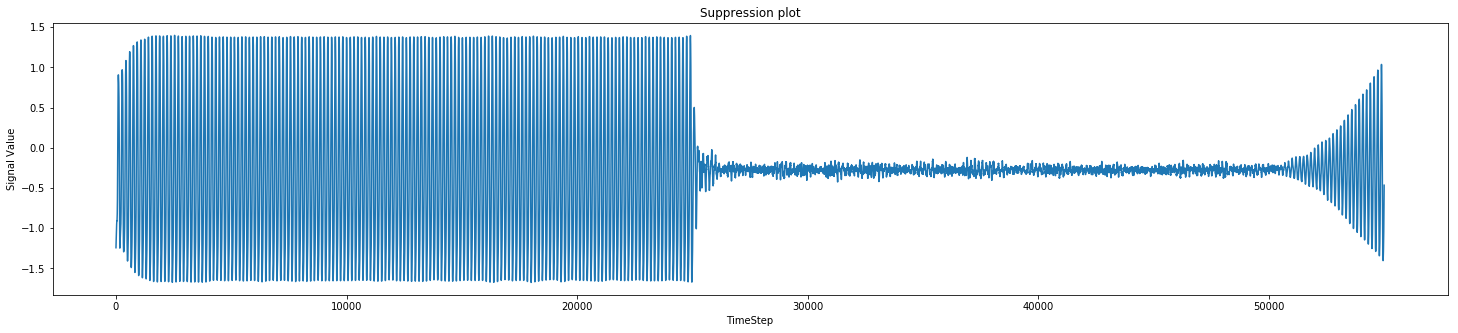

In [9]:
plt.figure(figsize=(25,5))
plt.title('Suppression plot')
plt.xlabel('TimeStep')
plt.ylabel('Signal Value')
plt.plot(states_x)

### Model score:

In [12]:
print(np.std(states_x[5000:25000])/np.std(states_x[30000:45000]))
s = (np.std(states_x[5000:25000])/np.std(states_x[30000:45000]))
print(np.sqrt(s))

27.266212742105157
5.22170592259897


In [11]:
print(np.mean(states_x[5000:150000]))

-0.2683076704695317


In [31]:
np.sqrt(1.10554209724429/0.0367348421348131)

5.48590841941973

## Env Analysis

/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:187: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/gym/utils/passive_env_checker.py:195: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'numpy.ndarray'>`
  logger.warn(
/mnt/c/Users/LabUser/

Environment Analysis:
Observation space: Box(-1.5, 1.5, (250,), float32)
Action space: Box(-1.0, 1.0, (1,), float32)
Initial observation shape: (250,)

Data collection complete!
Observations shape: (1000, 250)
Actions shape: (1000, 1)


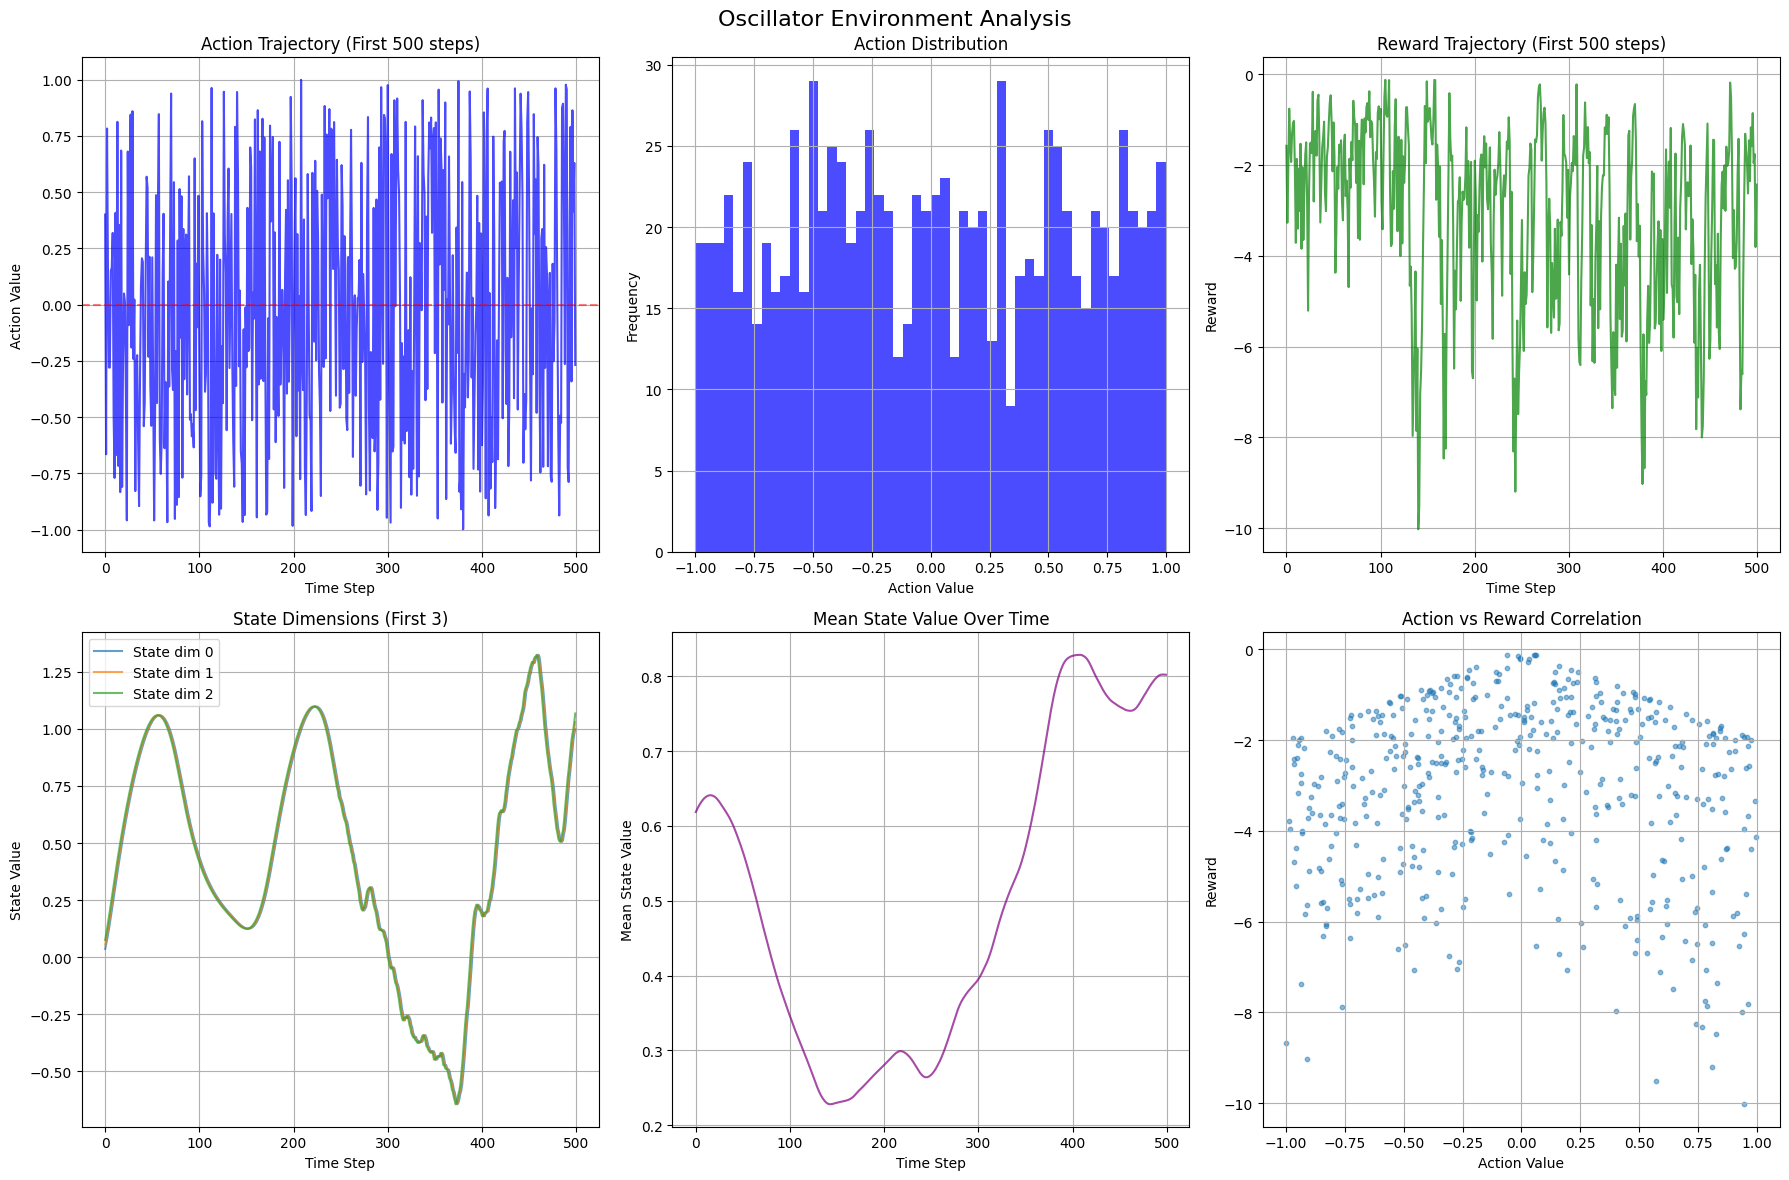


ENVIRONMENT STATISTICS
Action Statistics:
  Mean: 0.0045
  Std:  0.5790
  Min:  -0.9986
  Max:  0.9992

Reward Statistics:
  Mean: -3.0189
  Std:  1.8496
  Min:  -10.0214
  Max:  -0.0398

State Statistics:
  State shape: (1000, 250)
  State mean: 0.6964
  State std:  0.5026
  State range: [-0.6440, 1.6615]

State Dimension Analysis:
  Dim  0: mean= 0.6351, std= 0.4798, range=[-0.6440,  1.4923]
  Dim  1: mean= 0.6363, std= 0.4799, range=[-0.6440,  1.4923]
  Dim  2: mean= 0.6376, std= 0.4800, range=[-0.6440,  1.4923]
  Dim  3: mean= 0.6388, std= 0.4801, range=[-0.6440,  1.4923]
  Dim  4: mean= 0.6400, std= 0.4803, range=[-0.6440,  1.4923]
  Dim  5: mean= 0.6412, std= 0.4805, range=[-0.6440,  1.4923]
  Dim  6: mean= 0.6424, std= 0.4808, range=[-0.6440,  1.4923]
  Dim  7: mean= 0.6436, std= 0.4810, range=[-0.6440,  1.4923]
  Dim  8: mean= 0.6447, std= 0.4813, range=[-0.6440,  1.4923]
  Dim  9: mean= 0.6458, std= 0.4816, range=[-0.6440,  1.4923]

Environment Behavior Analysis:
  Episodes c

In [4]:
# Fix NumPy compatibility issue
import numpy as np
import warnings

# Patch numpy.bool8 if it doesn't exist (compatibility fix)
if not hasattr(np, 'bool8'):
    np.bool8 = np.bool_

# Environment Analysis: Plot Actions and States (Fixed Version)
import matplotlib.pyplot as plt
import gym
import gym_oscillator

# Create a single environment for analysis
env = gym.make('oscillator-v0')

# Handle both old and new gym API
try:
    obs = env.reset()
    if isinstance(obs, tuple):
        obs = obs[0]  # New gym API returns (obs, info)
except:
    obs = env.reset()

# Collect data from environment
num_steps = 1000
observations = []
actions = []
rewards = []
dones = []

print(f"Environment Analysis:")
print(f"Observation space: {env.observation_space}")
print(f"Action space: {env.action_space}")
print(f"Initial observation shape: {obs.shape}")

# Run random actions to collect data
print(f"\nCollecting {num_steps} steps of data...")
for step in range(num_steps):
    # Sample random action
    action = env.action_space.sample()
    
    # Take step - handle both old and new gym API
    try:
        step_result = env.step(action)
        if len(step_result) == 4:
            obs, reward, done, info = step_result
        else:  # New gym API returns 5 values
            obs, reward, terminated, truncated, info = step_result
            done = terminated or truncated
    except Exception as e:
        print(f"Step error: {e}")
        break
    
    # Store data
    observations.append(obs.copy())
    actions.append(action.copy())
    rewards.append(reward)
    dones.append(done)
    
    # Reset if done
    if done:
        reset_result = env.reset()
        if isinstance(reset_result, tuple):
            obs = reset_result[0]  # New gym API
        else:
            obs = reset_result  # Old gym API

# Convert to numpy arrays
observations = np.array(observations)
actions = np.array(actions)
rewards = np.array(rewards)

print(f"Data collection complete!")
print(f"Observations shape: {observations.shape}")
print(f"Actions shape: {actions.shape}")

# Create comprehensive plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Oscillator Environment Analysis', fontsize=16)

# Plot 1: Action trajectory
plot_steps = min(500, len(actions))
axes[0, 0].plot(actions[:plot_steps], 'b-', alpha=0.7)
axes[0, 0].set_title(f'Action Trajectory (First {plot_steps} steps)')
axes[0, 0].set_xlabel('Time Step')
axes[0, 0].set_ylabel('Action Value')
axes[0, 0].grid(True)
axes[0, 0].axhline(y=0, color='r', linestyle='--', alpha=0.5)

# Plot 2: Action distribution
axes[0, 1].hist(actions.flatten(), bins=50, alpha=0.7, color='blue')
axes[0, 1].set_title('Action Distribution')
axes[0, 1].set_xlabel('Action Value')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True)

# Plot 3: Reward trajectory
axes[0, 2].plot(rewards[:plot_steps], 'g-', alpha=0.7)
axes[0, 2].set_title(f'Reward Trajectory (First {plot_steps} steps)')
axes[0, 2].set_xlabel('Time Step')
axes[0, 2].set_ylabel('Reward')
axes[0, 2].grid(True)

# Plot 4: State space analysis (first few dimensions)
axes[1, 0].plot(observations[:plot_steps, 0], label='State dim 0', alpha=0.7)
if observations.shape[1] > 1:
    axes[1, 0].plot(observations[:plot_steps, 1], label='State dim 1', alpha=0.7)
if observations.shape[1] > 2:
    axes[1, 0].plot(observations[:plot_steps, 2], label='State dim 2', alpha=0.7)
axes[1, 0].set_title('State Dimensions (First 3)')
axes[1, 0].set_xlabel('Time Step')
axes[1, 0].set_ylabel('State Value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot 5: State mean across time
state_means = np.mean(observations, axis=1)
axes[1, 1].plot(state_means[:plot_steps], 'purple', alpha=0.7)
axes[1, 1].set_title('Mean State Value Over Time')
axes[1, 1].set_xlabel('Time Step')
axes[1, 1].set_ylabel('Mean State Value')
axes[1, 1].grid(True)

# Plot 6: Action vs Reward correlation
axes[1, 2].scatter(actions[:plot_steps], rewards[:plot_steps], alpha=0.5, s=10)
axes[1, 2].set_title('Action vs Reward Correlation')
axes[1, 2].set_xlabel('Action Value')
axes[1, 2].set_ylabel('Reward')
axes[1, 2].grid(True)

plt.tight_layout()
plt.show()

# Print statistical analysis
print("\n" + "="*50)
print("ENVIRONMENT STATISTICS")
print("="*50)
print(f"Action Statistics:")
print(f"  Mean: {np.mean(actions):.4f}")
print(f"  Std:  {np.std(actions):.4f}")
print(f"  Min:  {np.min(actions):.4f}")
print(f"  Max:  {np.max(actions):.4f}")

print(f"\nReward Statistics:")
print(f"  Mean: {np.mean(rewards):.4f}")
print(f"  Std:  {np.std(rewards):.4f}")
print(f"  Min:  {np.min(rewards):.4f}")
print(f"  Max:  {np.max(rewards):.4f}")

print(f"\nState Statistics:")
print(f"  State shape: {observations.shape}")
print(f"  State mean: {np.mean(observations):.4f}")
print(f"  State std:  {np.std(observations):.4f}")
print(f"  State range: [{np.min(observations):.4f}, {np.max(observations):.4f}]")

# Analyze state dimensions
print(f"\nState Dimension Analysis:")
for i in range(min(10, observations.shape[1])):  # First 10 dimensions
    dim_data = observations[:, i]
    print(f"  Dim {i:2d}: mean={np.mean(dim_data):7.4f}, std={np.std(dim_data):7.4f}, range=[{np.min(dim_data):7.4f}, {np.max(dim_data):7.4f}]")

# Check for any patterns or interesting behaviors
print(f"\nEnvironment Behavior Analysis:")
print(f"  Episodes completed: {np.sum(dones)}")
print(f"  Average episode length: {len(dones) / max(1, np.sum(dones)):.1f}")
if len(actions) > 0 and len(rewards) > 0:
    print(f"  Action-reward correlation: {np.corrcoef(actions.flatten(), rewards)[0,1]:.4f}")

env.close()

## Multi ENV RL-DBS

In [5]:
# Corrected Multi-environment setup with SubprocVecEnv
import gym
import gym_oscillator
import numpy as np
from stable_baselines3.common.vec_env import SubprocVecEnv
from stable_baselines3.common.utils import set_random_seed
from stable_baselines3 import PPO

def make_env(env_id, rank, seed=0):
    """
    Utility function for multiprocessed env.
    
    :param env_id: (str) the environment ID
    :param rank: (int) index of the subprocess
    :param seed: (int) the initial seed for RNG
    """
    def _init():
        # Import gym_oscillator in each subprocess to ensure registration
        import gym
        import gym_oscillator
        import numpy as np
        
        # Set numpy random seed for this process
        np.random.seed(seed + rank)
        
        env = gym.make(env_id)
        
        # Try to seed the environment if it supports it
        try:
            if hasattr(env, 'seed'):
                env.seed(seed + rank)
            elif hasattr(env.unwrapped, 'seed'):
                env.unwrapped.seed(seed + rank)
        except AttributeError:
            # If no seed method, just set numpy seed (already done above)
            pass
        
        return env
    
    set_random_seed(seed + rank)
    return _init

# Environment configuration
env_id = 'oscillator-v0'
num_cpu = 4  # Reduced from 8 to start smaller
seed = 42

# Create multi-environment
print(f"Creating {num_cpu} parallel environments...")
try:
    env = SubprocVecEnv([make_env(env_id, i, seed) for i in range(num_cpu)])
    print("Multi-environment created successfully!")
    
    # Create PPO model for multi-environment training
    model = PPO(
        "MlpPolicy", 
        env, 
        verbose=1,
        tensorboard_log="MLP/",
        device="cpu"  # Use CPU to avoid GPU warnings with multiprocessing
    )
    
    print("PPO model created with multi-environment setup!")
    print(f"Total environments: {env.num_envs}")
    
except Exception as e:
    print(f"Multi-environment failed: {e}")
    print("Falling back to single environment...")
    
    # Fallback to single environment
    env = DummyVecEnv([lambda: gym.make(env_id)])
    model = PPO("MlpPolicy", env, verbose=1, tensorboard_log="MLP/")
    print("Single environment setup completed!")

Creating 4 parallel environments...


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


Multi-environment created successfully!
Using cpu device
PPO model created with multi-environment setup!
Total environments: 4


/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/mnt/c/Users/LabUser/Desktop/games/RL-DBS/rl_dbs_env/lib/python3.12/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


## System ID using Neural ODE

In [6]:
# Neural ODE System Identification for RL-DBS
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

Using device: cuda


In [7]:
class RLDBSDataCollector:
    """Collect trajectory data from RL-DBS environment for system identification"""
    
    def __init__(self, env_id='oscillator-v0'):
        self.env = gym.make(env_id)
        self.data = {
            'states': [],
            'actions': [],
            'next_states': [],
            'x_vals': [],
            'y_vals': [],
            'timestamps': []
        }
    
    def collect_trajectory(self, num_steps=5000, action_type='random', noise_level=0.1):
        """
        Collect trajectory data from the environment
        
        Args:
            num_steps: Number of steps to collect
            action_type: 'random', 'sinusoidal', 'zero', 'mixed'
            noise_level: Noise level for actions
        """
        obs = self.env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
            
        states = []
        actions = []
        next_states = []
        x_vals = []
        y_vals = []
        
        for step in range(num_steps):
            # Generate action based on type
            if action_type == 'random':
                action = np.random.uniform(-1, 1, (1,)) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'sinusoidal':
                action = np.array([0.5 * np.sin(0.01 * step)]) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'zero':
                action = np.array([0.0]) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'mixed':
                if step < num_steps // 3:
                    action = np.array([0.0])  # No stimulation
                elif step < 2 * num_steps // 3:
                    action = np.array([0.8 * np.sin(0.02 * step)])  # Sinusoidal stimulation
                else:
                    action = np.random.uniform(-0.5, 0.5, (1,))  # Random stimulation
            
            # Clip action to valid range
            action = np.clip(action, -1, 1)
            
            # Store current state
            states.append(obs.copy())
            actions.append(action.copy())
            x_vals.append(self.env.x_val)
            y_vals.append(self.env.y_val)
            
            # Take step
            obs, reward, done, info = self.env.step(action)
            if isinstance(obs, tuple):
                obs = obs[0]
            
            # Store next state
            next_states.append(obs.copy())
            
            if done:
                obs = self.env.reset()
                if isinstance(obs, tuple):
                    obs = obs[0]
        
        # Convert to numpy arrays
        self.data['states'] = np.array(states)
        self.data['actions'] = np.array(actions)
        self.data['next_states'] = np.array(next_states)
        self.data['x_vals'] = np.array(x_vals)
        self.data['y_vals'] = np.array(y_vals)
        self.data['timestamps'] = np.arange(len(states))
        
        return self.data
    
    def visualize_data(self):
        """Visualize collected data"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Plot x and y mean field values
        axes[0, 0].plot(self.data['timestamps'], self.data['x_vals'], label='X (mean field)', alpha=0.8)
        axes[0, 0].plot(self.data['timestamps'], self.data['y_vals'], label='Y (mean field)', alpha=0.8)
        axes[0, 0].set_title('Mean Field Oscillator Dynamics')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Plot actions
        axes[0, 1].plot(self.data['timestamps'], self.data['actions'][:, 0], 'r-', alpha=0.7)
        axes[0, 1].set_title('DBS Stimulation Actions')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Action Value')
        axes[0, 1].grid(True)
        
        # Plot state evolution (first few dimensions)
        axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 0], label='State dim 0', alpha=0.7)
        if self.data['states'].shape[1] > 1:
            axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 10], label='State dim 10', alpha=0.7)
        if self.data['states'].shape[1] > 20:
            axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 20], label='State dim 20', alpha=0.7)
        axes[1, 0].set_title('State Evolution (Selected Dimensions)')
        axes[1, 0].set_xlabel('Time Step')
        axes[1, 0].set_ylabel('State Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Phase plot
        scatter = axes[1, 1].scatter(self.data['x_vals'], self.data['y_vals'], 
                  c=self.data['timestamps'], cmap='viridis', alpha=0.6, s=1)
        axes[1, 1].set_title('Phase Space (X-Y Mean Field)')
        axes[1, 1].set_xlabel('X Value')
        axes[1, 1].set_ylabel('Y Value')
        plt.colorbar(scatter, ax=axes[1, 1], label='Time Step')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()

In [8]:
class NeuralODEFunc(nn.Module):
    """Neural ODE function for learning the brain oscillator dynamics"""
    
    def __init__(self, input_dim=2, hidden_dim=64, action_dim=1):
        super(NeuralODEFunc, self).__init__()
        self.input_dim = input_dim  # [x, y] mean field values
        self.action_dim = action_dim
        
        # Main dynamics network
        self.net = nn.Sequential(
            nn.Linear(input_dim + action_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, input_dim)
        )
        
        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)
    
    def forward(self, t, state_action):
        """
        Forward pass of the Neural ODE
        
        Args:
            t: time (not used but required by odeint)
            state_action: concatenated [state, action] tensor
        
        Returns:
            derivative of state
        """
        batch_size = state_action.shape[0]
        state = state_action[:, :self.input_dim]
        action = state_action[:, self.input_dim:]
        
        # Compute derivative
        input_tensor = torch.cat([state, action], dim=1)
        derivative = self.net(input_tensor)
        
        # Return derivative with zero action derivative (action is external input)
        zero_action_derivative = torch.zeros(batch_size, self.action_dim, device=state_action.device)
        return torch.cat([derivative, zero_action_derivative], dim=1)

class BrainOscillatorNeuralODE(nn.Module):
    """Complete Neural ODE model for brain oscillator system identification"""
    
    def __init__(self, state_dim=2, hidden_dim=64, action_dim=1):
        super(BrainOscillatorNeuralODE, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.func = NeuralODEFunc(state_dim, hidden_dim, action_dim)
        
        # Observation model (if needed to map from mean field to full state)
        self.observation_net = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 250),  # Output dimension matches env observation
            nn.Tanh()
        )
    
    def forward(self, initial_state, actions, t_span):
        """
        Forward simulation of the Neural ODE model
        
        Args:
            initial_state: [batch_size, state_dim]
            actions: [batch_size, seq_len, action_dim]
            t_span: time points for integration
        
        Returns:
            predicted states over time
        """
        batch_size, seq_len, _ = actions.shape
        
        # Store all states
        all_states = []
        current_state = initial_state
        
        for i in range(seq_len):
            # Current action
            current_action = actions[:, i:i+1, :]  # [batch_size, 1, action_dim]
            current_action = current_action.squeeze(1)  # [batch_size, action_dim]
            
            # Integrate over one time step
            state_action = torch.cat([current_state, current_action], dim=1)
            
            # Use odeint to solve the ODE
            t = torch.tensor([0.0, 1.0], device=current_state.device)
            solution = odeint(self.func, state_action, t, method='rk4')
            
            # Extract state at t=1 (next time step)
            next_state_action = solution[1]  # [batch_size, state_dim + action_dim]
            current_state = next_state_action[:, :self.state_dim]
            
            all_states.append(current_state.unsqueeze(1))
        
        # Concatenate all states
        predicted_states = torch.cat(all_states, dim=1)  # [batch_size, seq_len, state_dim]
        
        return predicted_states
    
    def predict_observations(self, states):
        """Map states to observations using observation model"""
        batch_size, seq_len, state_dim = states.shape
        states_flat = states.reshape(-1, state_dim)
        obs_flat = self.observation_net(states_flat)
        return obs_flat.reshape(batch_size, seq_len, -1)

In [9]:
class NeuralODETrainer:
    """Trainer class for Neural ODE system identification"""
    
    def __init__(self, model, learning_rate=1e-3, weight_decay=1e-4):
        self.model = model.to(device)
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=10)
        
        self.train_losses = []
        self.val_losses = []
        
    def prepare_data(self, data, sequence_length=50, stride=10):
        """
        Prepare data for Neural ODE training
        
        Args:
            data: Dictionary with collected trajectory data
            sequence_length: Length of sequences for training
            stride: Stride between sequences
        
        Returns:
            DataLoader objects for training and validation
        """
        # Extract mean field values as true states
        x_vals = data['x_vals']
        y_vals = data['y_vals']
        actions = data['actions']
        
        # Create state representation
        states = np.column_stack([x_vals, y_vals])  # [N, 2]
        
        # Create sequences
        X_sequences = []  # Initial states
        A_sequences = []  # Action sequences
        Y_sequences = []  # Target state sequences
        
        for i in range(0, len(states) - sequence_length, stride):
            # Initial state
            initial_state = states[i]
            
            # Action sequence
            action_seq = actions[i:i+sequence_length]
            
            # Target state sequence
            target_seq = states[i+1:i+sequence_length+1]
            
            X_sequences.append(initial_state)
            A_sequences.append(action_seq)
            Y_sequences.append(target_seq)
        
        # Convert to numpy arrays
        X_sequences = np.array(X_sequences)  # [N_seq, state_dim]
        A_sequences = np.array(A_sequences)  # [N_seq, seq_len, action_dim]
        Y_sequences = np.array(Y_sequences)  # [N_seq, seq_len, state_dim]
        
        # Normalize data
        self.state_scaler = StandardScaler()
        self.action_scaler = StandardScaler()
        
        # Fit scalers
        X_flat = X_sequences.reshape(-1, X_sequences.shape[-1])
        A_flat = A_sequences.reshape(-1, A_sequences.shape[-1])
        Y_flat = Y_sequences.reshape(-1, Y_sequences.shape[-1])
        
        self.state_scaler.fit(np.vstack([X_flat, Y_flat]))
        self.action_scaler.fit(A_flat)
        
        # Transform data
        X_sequences_norm = self.state_scaler.transform(X_sequences)
        A_sequences_norm = self.action_scaler.transform(A_sequences.reshape(-1, A_sequences.shape[-1]))
        A_sequences_norm = A_sequences_norm.reshape(A_sequences.shape)
        Y_sequences_norm = self.state_scaler.transform(Y_sequences.reshape(-1, Y_sequences.shape[-1]))
        Y_sequences_norm = Y_sequences_norm.reshape(Y_sequences.shape)
        
        # Split train/validation
        train_X, val_X, train_A, val_A, train_Y, val_Y = train_test_split(
            X_sequences_norm, A_sequences_norm, Y_sequences_norm, test_size=0.2, random_state=42
        )
        
        # Convert to tensors
        train_X = torch.FloatTensor(train_X).to(device)
        train_A = torch.FloatTensor(train_A).to(device)
        train_Y = torch.FloatTensor(train_Y).to(device)
        
        val_X = torch.FloatTensor(val_X).to(device)
        val_A = torch.FloatTensor(val_A).to(device)
        val_Y = torch.FloatTensor(val_Y).to(device)
        
        # Create data loaders
        train_dataset = TensorDataset(train_X, train_A, train_Y)
        val_dataset = TensorDataset(val_X, val_A, val_Y)
        
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
        
        return train_loader, val_loader
    
    def train_epoch(self, train_loader):
        """Train for one epoch"""
        self.model.train()
        epoch_loss = 0.0
        
        for batch_idx, (initial_states, action_sequences, target_sequences) in enumerate(train_loader):
            self.optimizer.zero_grad()
            
            # Forward pass
            predicted_states = self.model(initial_states, action_sequences, None)
            
            # Compute loss
            loss = nn.MSELoss()(predicted_states, target_sequences)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            
            self.optimizer.step()
            
            epoch_loss += loss.item()
        
        return epoch_loss / len(train_loader)
    
    def validate(self, val_loader):
        """Validate the model"""
        self.model.eval()
        val_loss = 0.0
        
        with torch.no_grad():
            for initial_states, action_sequences, target_sequences in val_loader:
                predicted_states = self.model(initial_states, action_sequences, None)
                loss = nn.MSELoss()(predicted_states, target_sequences)
                val_loss += loss.item()
        
        return val_loss / len(val_loader)
    
    def train(self, train_loader, val_loader, epochs=100):
        """Full training loop"""
        print("Starting Neural ODE training...")
        
        best_val_loss = float('inf')
        patience_counter = 0
        patience = 20
        
        for epoch in range(epochs):
            # Train
            train_loss = self.train_epoch(train_loader)
            
            # Validate
            val_loss = self.validate(val_loader)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            
            # Store losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), 'best_neural_ode_model.pth')
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch:3d}: Train Loss = {train_loss:.6f}, Val Loss = {val_loss:.6f}")
        
        # Load best model
        self.model.load_state_dict(torch.load('best_neural_ode_model.pth'))
        print("Training completed!")
        
    def plot_training_history(self):
        """Plot training and validation losses"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_losses, label='Training Loss', alpha=0.7)
        plt.plot(self.val_losses, label='Validation Loss', alpha=0.7)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Neural ODE Training History')
        plt.legend()
        plt.grid(True)
        plt.yscale('log')
        plt.show()

In [10]:
class NeuralODEEvaluator:
    """Evaluation and visualization tools for trained Neural ODE model"""
    
    def __init__(self, model, trainer):
        self.model = model
        self.trainer = trainer
        self.env = gym.make('oscillator-v0')
    
    def simulate_trajectory(self, initial_state, actions, denormalize=True):
        """
        Simulate a trajectory using the trained Neural ODE model
        
        Args:
            initial_state: Initial state [x, y]
            actions: Action sequence
            denormalize: Whether to denormalize the output
        
        Returns:
            Predicted state trajectory
        """
        self.model.eval()
        
        with torch.no_grad():
            # Normalize inputs
            if denormalize:
                initial_state_norm = self.trainer.state_scaler.transform(initial_state.reshape(1, -1))
                actions_norm = self.trainer.action_scaler.transform(actions.reshape(-1, 1))
                actions_norm = actions_norm.reshape(1, -1, 1)
            else:
                initial_state_norm = initial_state.reshape(1, -1)
                actions_norm = actions.reshape(1, -1, 1)
            
            # Convert to tensors
            initial_tensor = torch.FloatTensor(initial_state_norm).to(device)
            actions_tensor = torch.FloatTensor(actions_norm).to(device)
            
            # Predict
            predicted_states = self.model(initial_tensor, actions_tensor, None)
            predicted_states = predicted_states.cpu().numpy().squeeze()
            
            # Denormalize if requested
            if denormalize:
                predicted_states = self.trainer.state_scaler.inverse_transform(
                    predicted_states.reshape(-1, predicted_states.shape[-1])
                ).reshape(predicted_states.shape)
        
        return predicted_states
    
    def compare_with_environment(self, num_steps=1000, action_type='sinusoidal'):
        """
        Compare Neural ODE predictions with actual environment dynamics
        """
        # Reset environment and get initial state
        obs = self.env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        
        initial_x = self.env.x_val
        initial_y = self.env.y_val
        initial_state = np.array([initial_x, initial_y])
        
        # Generate action sequence
        if action_type == 'sinusoidal':
            actions = np.array([0.5 * np.sin(0.02 * i) for i in range(num_steps)])
        elif action_type == 'random':
            actions = np.random.uniform(-0.5, 0.5, num_steps)
        elif action_type == 'zero':
            actions = np.zeros(num_steps)
        
        # Simulate with Neural ODE
        predicted_states = self.simulate_trajectory(initial_state, actions)
        
        # Simulate with actual environment
        actual_x_vals = [initial_x]
        actual_y_vals = [initial_y]
        
        for action in actions:
            obs, reward, done, info = self.env.step([action])
            if isinstance(obs, tuple):
                obs = obs[0]
            actual_x_vals.append(self.env.x_val)
            actual_y_vals.append(self.env.y_val)
            
            if done:
                break
        
        actual_states = np.column_stack([actual_x_vals[1:], actual_y_vals[1:]])
        
        # Plotting
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # X trajectory comparison
        axes[0, 0].plot(actual_states[:, 0], label='Environment', alpha=0.8)
        axes[0, 0].plot(predicted_states[:, 0], label='Neural ODE', alpha=0.8, linestyle='--')
        axes[0, 0].set_title('X Component Comparison')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('X Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Y trajectory comparison
        axes[0, 1].plot(actual_states[:, 1], label='Environment', alpha=0.8)
        axes[0, 1].plot(predicted_states[:, 1], label='Neural ODE', alpha=0.8, linestyle='--')
        axes[0, 1].set_title('Y Component Comparison')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Y Value')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # Phase space comparison
        axes[1, 0].plot(actual_states[:, 0], actual_states[:, 1], label='Environment', alpha=0.7)
        axes[1, 0].plot(predicted_states[:, 0], predicted_states[:, 1], label='Neural ODE', alpha=0.7, linestyle='--')
        axes[1, 0].set_title('Phase Space Comparison')
        axes[1, 0].set_xlabel('X Value')
        axes[1, 0].set_ylabel('Y Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Action sequence
        axes[1, 1].plot(actions, 'r-', alpha=0.7)
        axes[1, 1].set_title('Action Sequence (DBS Stimulation)')
        axes[1, 1].set_xlabel('Time Step')
        axes[1, 1].set_ylabel('Action Value')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Compute metrics
        mse_x = np.mean((actual_states[:, 0] - predicted_states[:, 0])**2)
        mse_y = np.mean((actual_states[:, 1] - predicted_states[:, 1])**2)
        
        print(f"Prediction Accuracy Metrics:")
        print(f"  MSE X: {mse_x:.6f}")
        print(f"  MSE Y: {mse_y:.6f}")
        print(f"  Total MSE: {mse_x + mse_y:.6f}")
        
        return predicted_states, actual_states
    
    def analyze_learned_dynamics(self):
        """Analyze the learned dynamics of the Neural ODE"""
        # Create a grid of states and actions
        x_range = np.linspace(-2, 2, 20)
        y_range = np.linspace(-2, 2, 20)
        actions_test = [-1.0, 0.0, 1.0]  # Different stimulation levels
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for idx, action in enumerate(actions_test):
            X, Y = np.meshgrid(x_range, y_range)
            U = np.zeros_like(X)
            V = np.zeros_like(Y)
            
            # Compute vector field
            for i in range(len(x_range)):
                for j in range(len(y_range)):
                    state = np.array([[X[j, i], Y[j, i]]])
                    action_arr = np.array([action])
                    
                    # Normalize
                    state_norm = self.trainer.state_scaler.transform(state)
                    action_norm = self.trainer.action_scaler.transform(action_arr.reshape(-1, 1))
                    
                    # Convert to tensor
                    state_tensor = torch.FloatTensor(state_norm).to(device)
                    action_tensor = torch.FloatTensor(action_norm).to(device)
                    state_action = torch.cat([state_tensor, action_tensor], dim=1)
                    
                    # Get derivative
                    with torch.no_grad():
                        derivative = self.model.func(0, state_action)
                        derivative = derivative[:, :2].cpu().numpy()  # Only state derivatives
                    
                    # Denormalize derivative (approximate)
                    derivative = derivative * self.trainer.state_scaler.scale_
                    
                    U[j, i] = derivative[0, 0]
                    V[j, i] = derivative[0, 1]
            
            # Plot vector field
            axes[idx].quiver(X, Y, U, V, alpha=0.6)
            axes[idx].set_title(f'Learned Dynamics (Action = {action})')
            axes[idx].set_xlabel('X')
            axes[idx].set_ylabel('Y')
            axes[idx].grid(True)
            axes[idx].set_aspect('equal')
        
        plt.tight_layout()
        plt.show()

In [11]:
def train_neural_ode_system_identification():
    """Complete pipeline for Neural ODE system identification"""
    
    print("Neural ODE System Identification for RL-DBS")
    print("=" * 60)
    
    # Step 1: Collect data from environment
    print("Step 1: Collecting trajectory data from RL-DBS environment...")
    collector = RLDBSDataCollector()
    
    # Collect diverse trajectories
    data_random = collector.collect_trajectory(num_steps=3000, action_type='random')
    data_sin = collector.collect_trajectory(num_steps=2000, action_type='sinusoidal')
    data_mixed = collector.collect_trajectory(num_steps=2000, action_type='mixed')
    
    # Combine datasets
    combined_data = {
        'states': np.vstack([data_random['states'], data_sin['states'], data_mixed['states']]),
        'actions': np.vstack([data_random['actions'], data_sin['actions'], data_mixed['actions']]),
        'next_states': np.vstack([data_random['next_states'], data_sin['next_states'], data_mixed['next_states']]),
        'x_vals': np.concatenate([data_random['x_vals'], data_sin['x_vals'], data_mixed['x_vals']]),
        'y_vals': np.concatenate([data_random['y_vals'], data_sin['y_vals'], data_mixed['y_vals']]),
        'timestamps': np.concatenate([data_random['timestamps'], 
                                    data_sin['timestamps'] + len(data_random['timestamps']),
                                    data_mixed['timestamps'] + len(data_random['timestamps']) + len(data_sin['timestamps'])])
    }
    
    print(f"   Collected {len(combined_data['x_vals'])} data points")
    
    # Visualize collected data
    collector.data = combined_data
    collector.visualize_data()
    
    # Step 2: Create and train Neural ODE model
    print("\nStep 2: Creating Neural ODE model...")
    model = BrainOscillatorNeuralODE(state_dim=2, hidden_dim=128, action_dim=1)
    trainer = NeuralODETrainer(model, learning_rate=1e-3)
    
    # Prepare data
    print("Step 3: Preparing training data...")
    train_loader, val_loader = trainer.prepare_data(combined_data, sequence_length=30, stride=5)
    
    # Train the model
    print("Step 4: Training Neural ODE model...")
    trainer.train(train_loader, val_loader, epochs=200)
    
    # Plot training history
    trainer.plot_training_history()
    
    # Step 5: Evaluate the trained model
    print("Step 5: Evaluating trained model...")
    evaluator = NeuralODEEvaluator(model, trainer)
    
    # Compare with environment
    print("Comparing Neural ODE predictions with environment dynamics...")
    evaluator.compare_with_environment(num_steps=500, action_type='sinusoidal')
    
    # Analyze learned dynamics
    print("Analyzing learned dynamics...")
    evaluator.analyze_learned_dynamics()
    
    # Step 6: Test on new trajectories
    print("\nStep 6: Testing on new trajectory...")
    test_collector = RLDBSDataCollector()
    test_data = test_collector.collect_trajectory(num_steps=1000, action_type='random', noise_level=0.05)
    
    # Use trained model to predict
    initial_state = np.array([test_data['x_vals'][0], test_data['y_vals'][0]])
    predicted_trajectory = evaluator.simulate_trajectory(initial_state, test_data['actions'][:, 0])
    actual_trajectory = np.column_stack([test_data['x_vals'][1:], test_data['y_vals'][1:]])

    # Ensure both trajectories have the same length
    min_length = min(len(actual_trajectory), len(predicted_trajectory))
    actual_trajectory = actual_trajectory[:min_length]
    predicted_trajectory = predicted_trajectory[:min_length]
    
    # Plot comparison
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(actual_trajectory[:, 0], label='Actual X', alpha=0.8)
    plt.plot(predicted_trajectory[:, 0], label='Predicted X', linestyle='--', alpha=0.8)
    plt.title('X Component - Test Trajectory')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(actual_trajectory[:, 1], label='Actual Y', alpha=0.8)
    plt.plot(predicted_trajectory[:, 1], label='Predicted Y', linestyle='--', alpha=0.8)
    plt.title('Y Component - Test Trajectory')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.plot(actual_trajectory[:, 0], actual_trajectory[:, 1], label='Actual', alpha=0.8)
    plt.plot(predicted_trajectory[:, 0], predicted_trajectory[:, 1], label='Predicted', linestyle='--', alpha=0.8)
    plt.title('Phase Space - Test Trajectory')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.plot(test_data['actions'][:1000, 0], 'r-', alpha=0.7)
    plt.title('Test Action Sequence')
    plt.xlabel('Time Step')
    plt.ylabel('Action')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Final evaluation metrics
    test_mse = np.mean((actual_trajectory - predicted_trajectory)**2)
    print(f"\n Final Test MSE: {test_mse:.6f}")
    
    print("\n Neural ODE System Identification Complete!")
    print("The model has learned to approximate the RL-DBS brain oscillator dynamics.")
    
    return model, trainer, evaluator

Neural ODE System Identification for RL-DBS
Step 1: Collecting trajectory data from RL-DBS environment...
   Collected 6000 data points


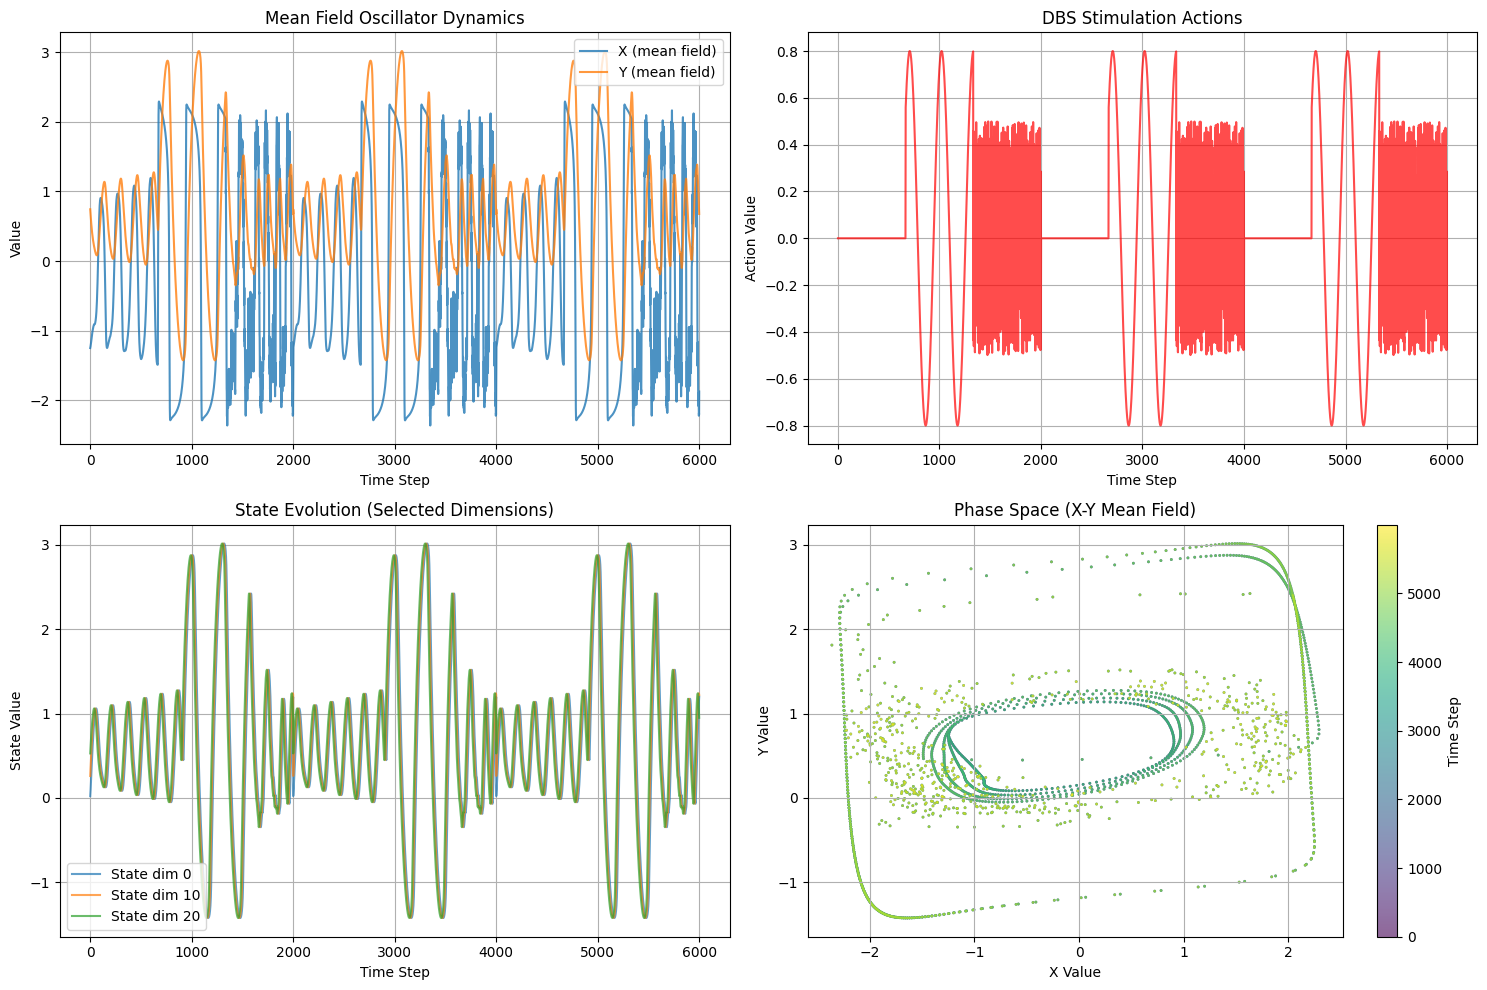


Step 2: Creating Neural ODE model...
Step 3: Preparing training data...
Step 4: Training Neural ODE model...
Starting Neural ODE training...
Epoch   0: Train Loss = 0.565299, Val Loss = 0.764416
Epoch  10: Train Loss = 0.042753, Val Loss = 0.022600
Epoch  20: Train Loss = 0.035553, Val Loss = 0.023639
Epoch  30: Train Loss = 0.029089, Val Loss = 0.051339
Epoch  40: Train Loss = 0.027210, Val Loss = 0.032293
Epoch  50: Train Loss = 0.011298, Val Loss = 0.010730
Epoch  60: Train Loss = 0.010057, Val Loss = 0.009659
Epoch  70: Train Loss = 0.010050, Val Loss = 0.010100
Epoch  80: Train Loss = 0.008494, Val Loss = 0.008312
Epoch  90: Train Loss = 0.008347, Val Loss = 0.008128
Epoch 100: Train Loss = 0.008207, Val Loss = 0.007967
Epoch 110: Train Loss = 0.008153, Val Loss = 0.007914
Epoch 120: Train Loss = 0.007937, Val Loss = 0.007713
Epoch 130: Train Loss = 0.007825, Val Loss = 0.007645
Epoch 140: Train Loss = 0.007695, Val Loss = 0.007602
Epoch 150: Train Loss = 0.007583, Val Loss = 0.0

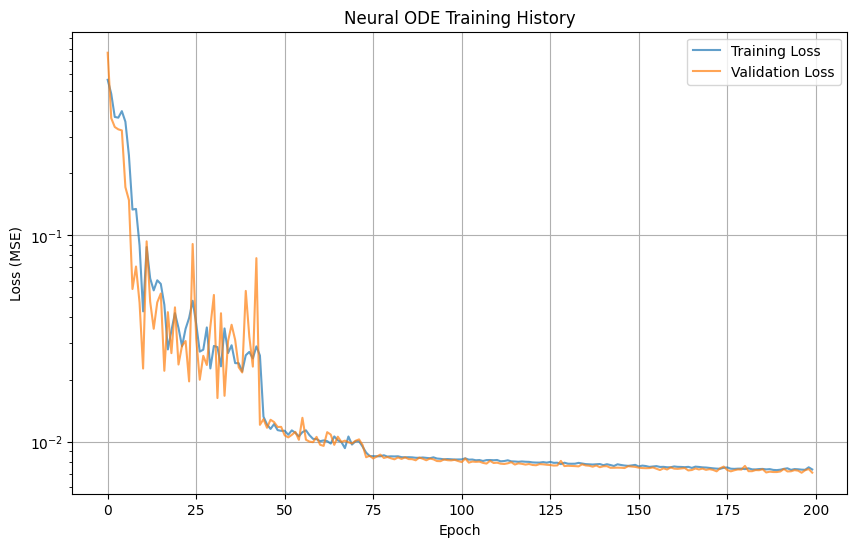

Step 5: Evaluating trained model...
Comparing Neural ODE predictions with environment dynamics...


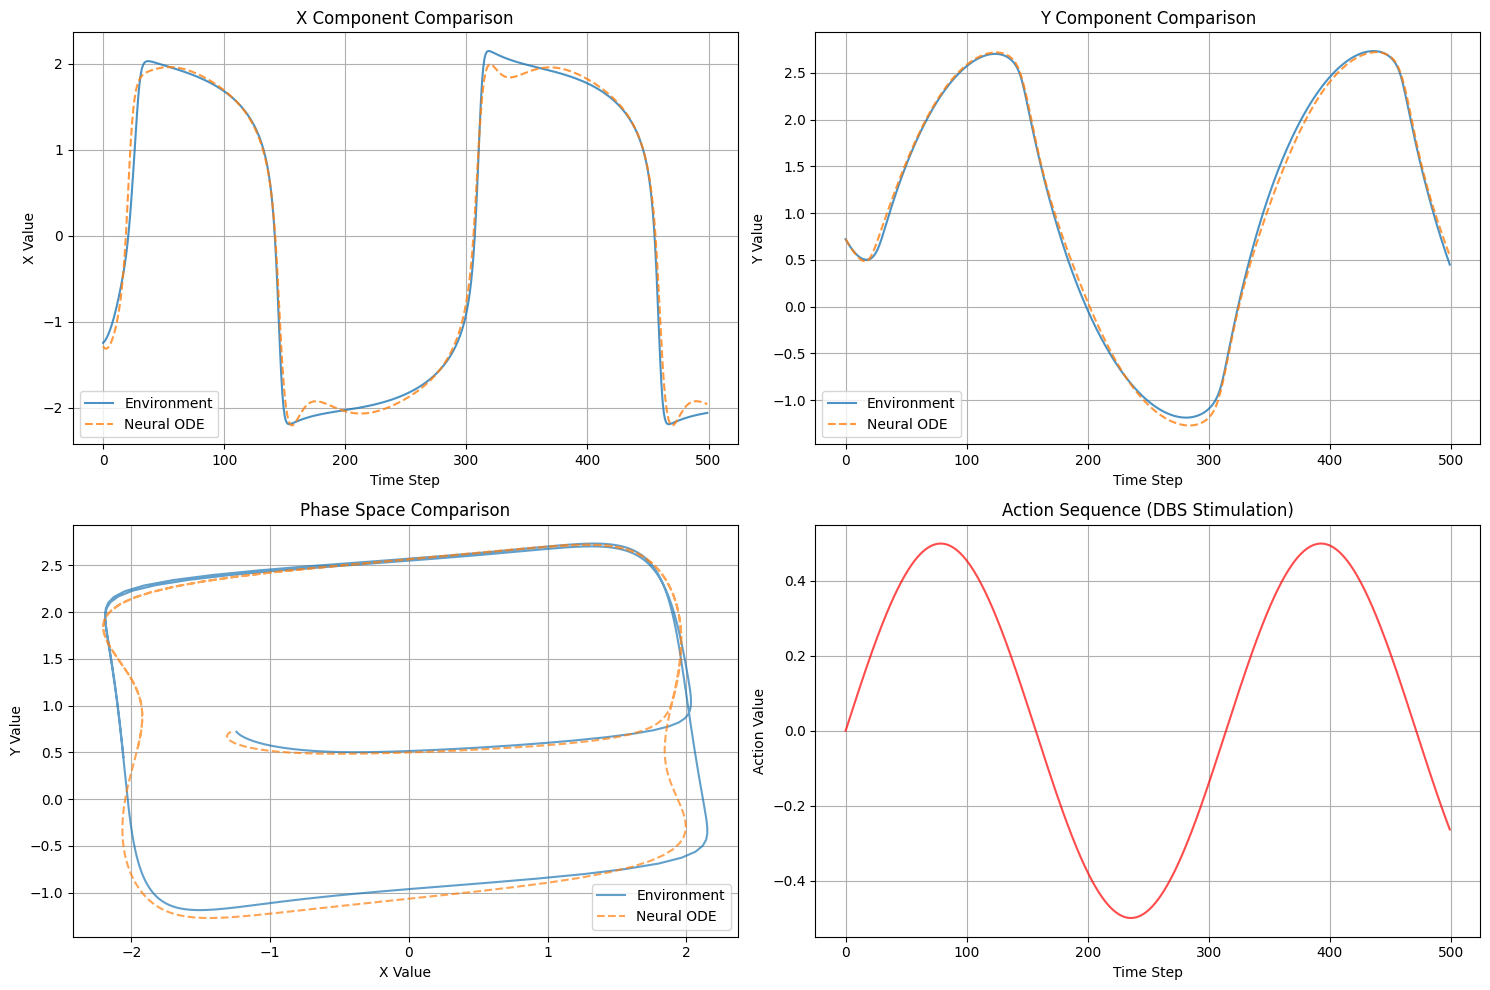

Prediction Accuracy Metrics:
  MSE X: 0.018264
  MSE Y: 0.003547
  Total MSE: 0.021811
Analyzing learned dynamics...


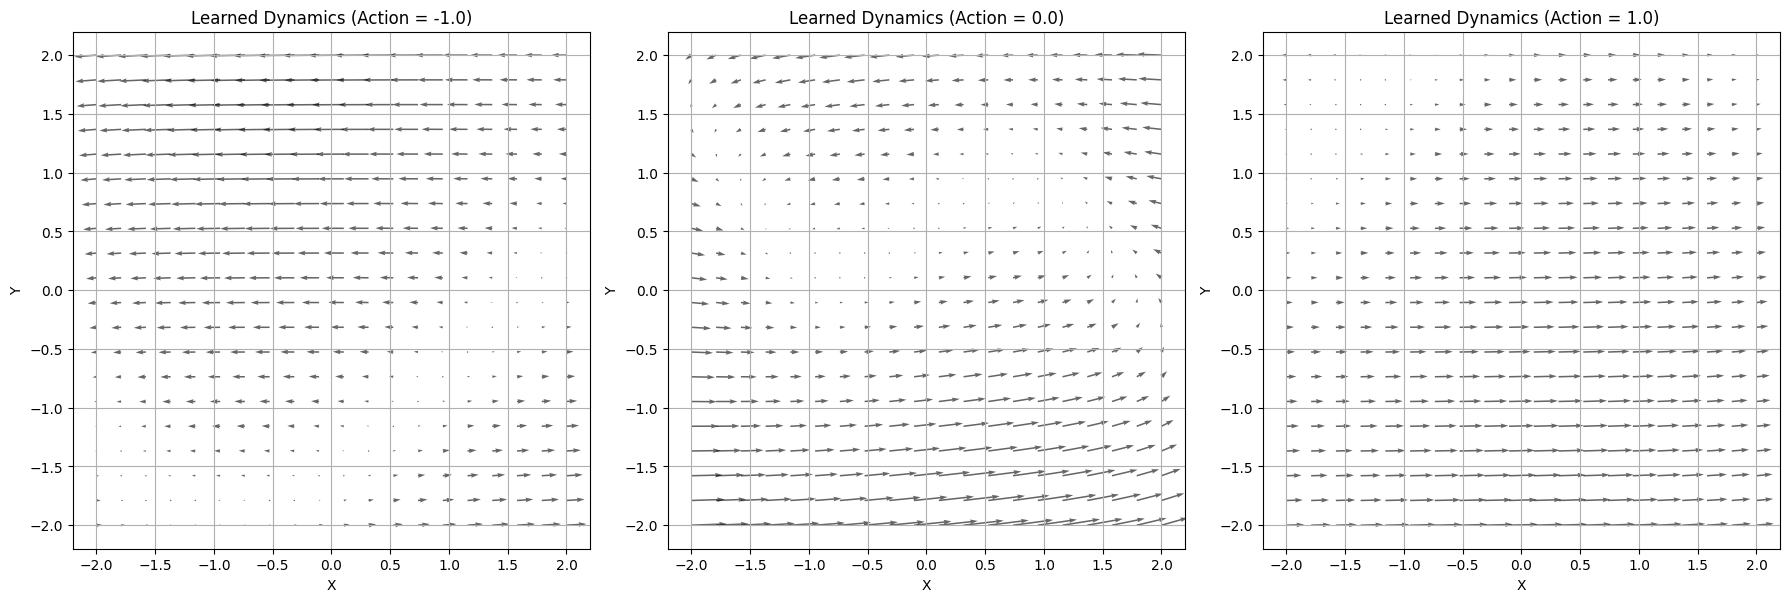


Step 6: Testing on new trajectory...


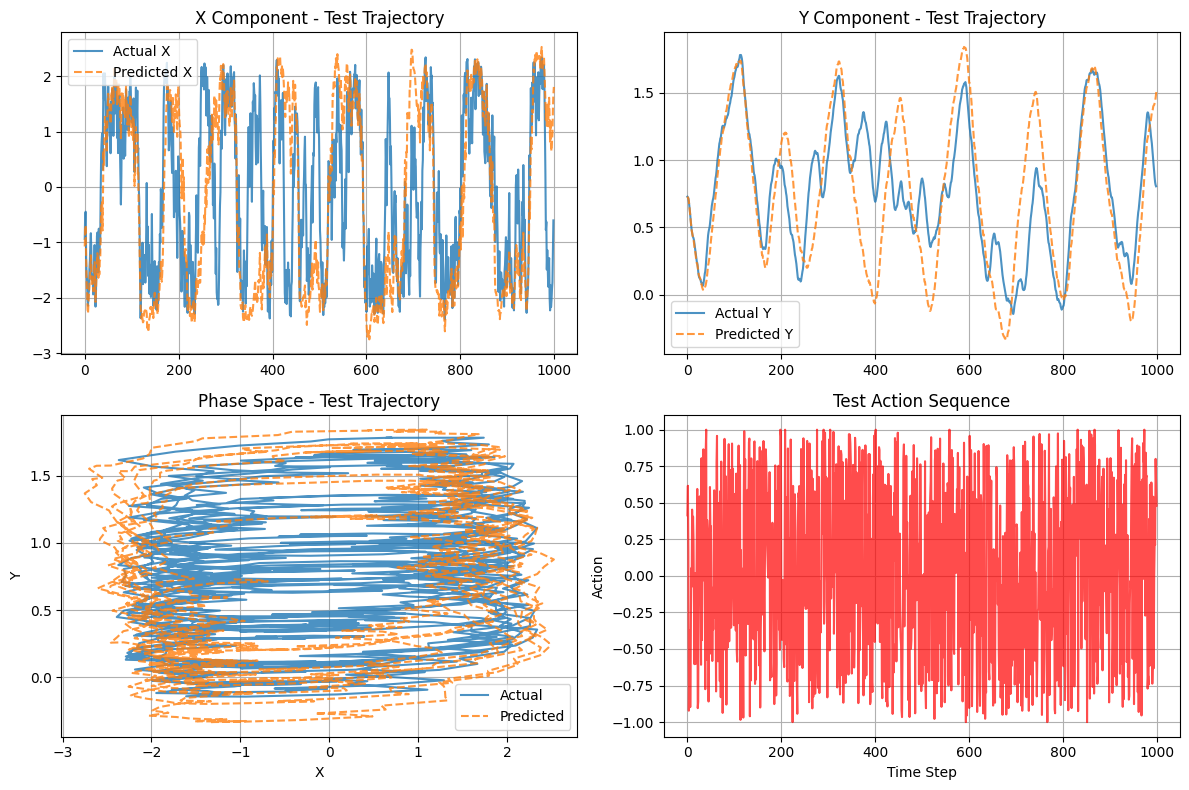

ValueError: operands could not be broadcast together with shapes (999,2) (1000,2) 

In [ ]:
if __name__ == "__main__":
    model, trainer, evaluator = train_neural_ode_system_identification()

## Neural ODE system with embedded evidential deep learning for uncertainty quantification

In [115]:
class RLDBSDataCollector:
    """Collect trajectory data from RL-DBS environment for system identification"""
    
    def __init__(self, env_id='oscillator-v0'):
        self.env = gym.make(env_id)
        self.data = {
            'states': [],
            'actions': [],
            'next_states': [],
            'x_vals': [],
            'y_vals': [],
            'timestamps': []
        }
    
    def collect_trajectory(self, num_steps=5000, action_type='random', noise_level=0.1):
        """
        Collect trajectory data from the environment
        
        Args:
            num_steps: Number of steps to collect
            action_type: 'random', 'sinusoidal', 'zero', 'mixed'
            noise_level: Noise level for actions
        """
        obs = self.env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
            
        states = []
        actions = []
        next_states = []
        x_vals = []
        y_vals = []
        
        for step in range(num_steps):
            # Generate action based on type
            if action_type == 'random':
                action = np.random.uniform(-1, 1, (1,)) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'sinusoidal':
                action = np.array([0.5 * np.sin(0.01 * step)]) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'zero':
                action = np.array([0.0]) + np.random.normal(0, noise_level, (1,))
            elif action_type == 'mixed':
                if step < num_steps // 3:
                    action = np.array([0.0])  # No stimulation
                elif step < 2 * num_steps // 3:
                    action = np.array([0.8 * np.sin(0.02 * step)])  # Sinusoidal stimulation
                else:
                    action = np.random.uniform(-0.5, 0.5, (1,))  # Random stimulation
            
            # Clip action to valid range
            action = np.clip(action, -1, 1)
            
            # Store current state
            states.append(obs.copy())
            actions.append(action.copy())
            x_vals.append(self.env.x_val)
            y_vals.append(self.env.y_val)
            
            # Take step
            obs, reward, done, info = self.env.step(action)
            if isinstance(obs, tuple):
                obs = obs[0]
            
            # Store next state
            next_states.append(obs.copy())
            
            if done:
                obs = self.env.reset()
                if isinstance(obs, tuple):
                    obs = obs[0]
        
        # Convert to numpy arrays
        self.data['states'] = np.array(states)
        self.data['actions'] = np.array(actions)
        self.data['next_states'] = np.array(next_states)
        self.data['x_vals'] = np.array(x_vals)
        self.data['y_vals'] = np.array(y_vals)
        self.data['timestamps'] = np.arange(len(states))
        
        return self.data
    
    def visualize_data(self):
        """Visualize collected data"""
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Plot x and y mean field values
        axes[0, 0].plot(self.data['timestamps'], self.data['x_vals'], label='X (mean field)', alpha=0.8)
        axes[0, 0].plot(self.data['timestamps'], self.data['y_vals'], label='Y (mean field)', alpha=0.8)
        axes[0, 0].set_title('Mean Field Oscillator Dynamics')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Plot actions
        axes[0, 1].plot(self.data['timestamps'], self.data['actions'][:, 0], 'r-', alpha=0.7)
        axes[0, 1].set_title('DBS Stimulation Actions')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Action Value')
        axes[0, 1].grid(True)
        
        # Plot state evolution (first few dimensions)
        axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 0], label='State dim 0', alpha=0.7)
        if self.data['states'].shape[1] > 1:
            axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 10], label='State dim 10', alpha=0.7)
        if self.data['states'].shape[1] > 20:
            axes[1, 0].plot(self.data['timestamps'], self.data['states'][:, 20], label='State dim 20', alpha=0.7)
        axes[1, 0].set_title('State Evolution (Selected Dimensions)')
        axes[1, 0].set_xlabel('Time Step')
        axes[1, 0].set_ylabel('State Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Phase plot
        scatter = axes[1, 1].scatter(self.data['x_vals'], self.data['y_vals'], 
                  c=self.data['timestamps'], cmap='viridis', alpha=0.6, s=1)
        axes[1, 1].set_title('Phase Space (X-Y Mean Field)')
        axes[1, 1].set_xlabel('X Value')
        axes[1, 1].set_ylabel('Y Value')
        plt.colorbar(scatter, ax=axes[1, 1], label='Time Step')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()

In [116]:
class NeuralODEFunc(nn.Module):
    """Neural ODE function for learning the brain oscillator dynamics"""
    
    def __init__(self, input_dim=2, hidden_dim=64, action_dim=1):
        super(NeuralODEFunc, self).__init__()
        self.input_dim = input_dim  # [x, y] mean field values
        self.action_dim = action_dim
        
        # Main dynamics network
        self.net = nn.Sequential(
            nn.Linear(input_dim + action_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.Tanh(),
            nn.Linear(hidden_dim, input_dim)
        )
        
        # Initialize weights
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_normal_(m.weight)
                nn.init.zeros_(m.bias)
    
    def forward(self, t, state_action):
        """
        Forward pass of the Neural ODE
        
        Args:
            t: time (not used but required by odeint)
            state_action: concatenated [state, action] tensor
        
        Returns:
            derivative of state
        """
        batch_size = state_action.shape[0]
        state = state_action[:, :self.input_dim]
        action = state_action[:, self.input_dim:]
        
        # Compute derivative
        input_tensor = torch.cat([state, action], dim=1)
        derivative = self.net(input_tensor)
        
        # Return derivative with zero action derivative (action is external input)
        zero_action_derivative = torch.zeros(batch_size, self.action_dim, device=state_action.device)
        return torch.cat([derivative, zero_action_derivative], dim=1)


class UncertaintyHead(nn.Module):
    def __init__(self, state_dim=2, action_dim=1, hidden_dim=32):
        super().__init__()
        self.head = nn.Sequential(
            nn.Linear(state_dim + action_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 4 * state_dim)
        )

    def forward(self, state, action):
        x = torch.cat([state, action], dim=-1)
        out = self.head(x)
        mu, logv, logalpha, logbeta = torch.chunk(out, 4, dim=-1)
        v = torch.nn.functional.softplus(logv)
        alpha = torch.nn.functional.softplus(logalpha) + 1
        beta = torch.nn.functional.softplus(logbeta)
        return torch.cat([mu, v, alpha, beta], dim=-1)



class BrainOscillatorNeuralODE(nn.Module):
    """Complete Neural ODE model for brain oscillator system identification"""
    
    def __init__(self, state_dim=2, hidden_dim=64, action_dim=1):
        super(BrainOscillatorNeuralODE, self).__init__()
        self.state_dim = state_dim
        self.action_dim = action_dim
        self.func = NeuralODEFunc(state_dim, hidden_dim, action_dim)
        self.uncertainty_head = UncertaintyHead(state_dim, action_dim, hidden_dim=32)
        
        # Observation model (if needed to map from mean field to full state)
        self.observation_net = nn.Sequential(
            nn.Linear(state_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 250),  # Output dimension matches env observation
            nn.Tanh()
        )
    
    def forward(self, initial_state, actions, t_span):
        """
        Forward simulation of the Neural ODE model
        
        Args:
            initial_state: [batch_size, state_dim]
            actions: [batch_size, seq_len, action_dim]
            t_span: time points for integration
        
        Returns:
            predicted states over time
        """
        batch_size, seq_len, _ = actions.shape
        
        # Store all states
        all_states = []
        current_state = initial_state
        # uncertainties = []
        
        for i in range(seq_len):
            # Current action
            current_action = actions[:, i:i+1, :]  # [batch_size, 1, action_dim]
            current_action = current_action.squeeze(1)  # [batch_size, action_dim]
            
            # Integrate over one time step
            state_action = torch.cat([current_state, current_action], dim=1)
            # uncertainty = self.uncertainty_head(state, action)
            # uncertainties.append(uncertainty.unsqueeze(1))
            
            # Use odeint to solve the ODE
            t = torch.tensor([0.0, 1.0], device=current_state.device)
            solution = odeint(self.func, state_action, t, method='rk4')
            
            # Extract state at t=1 (next time step)
            next_state_action = solution[1]  # [batch_size, state_dim + action_dim]
            current_state = next_state_action[:, :self.state_dim]
            
            all_states.append(current_state.unsqueeze(1))
        
        # Concatenate all states
        predicted_states = torch.cat(all_states, dim=1)  # [batch_size, seq_len, state_dim]
        # uncertainties = torch.cat(uncertainties, dim=1)

        uncertainties = []
        for i in range(seq_len):
            state = predicted_states[:, i, :]
            action = actions[:, i, :]
            uncertainty = self.uncertainty_head(state, action)
            uncertainties.append(uncertainty.unsqueeze(1))
        uncertainties = torch.cat(uncertainties, dim=1)  # [batch, seq_len, 4*state_dim]
        return predicted_states, uncertainties
    
    def predict_observations(self, states):
        """Map states to observations using observation model"""
        batch_size, seq_len, state_dim = states.shape
        states_flat = states.reshape(-1, state_dim)
        obs_flat = self.observation_net(states_flat)
        return obs_flat.reshape(batch_size, seq_len, -1)

In [117]:
def nig_nll(y, mu, v, alpha, beta):
    twoBlambda = 2 * beta * (1 + v)
    nll = 0.5 * torch.log(np.pi / v) \
        - alpha * torch.log(twoBlambda) \
        + (alpha + 0.5) * torch.log(v * (y - mu) ** 2 + twoBlambda) \
        + torch.lgamma(alpha) \
        - torch.lgamma(alpha + 0.5)
    return nll.mean()

def nig_reg(y, mu, v, alpha, beta, omega=0.01):
    error = torch.abs(y - mu)
    evi = 2 * v + alpha
    reg = error * evi
    return reg.mean()

def evidential_loss(y, evidential_output, coeff=1.0):
    mu, v, alpha, beta = torch.chunk(evidential_output, 4, dim=-1)
    twoBlambda = 2 * beta * (1 + v)
    nll = 0.5 * torch.log(np.pi / v) \
        - alpha * torch.log(twoBlambda) \
        + (alpha + 0.5) * torch.log(v * (y - mu) ** 2 + twoBlambda) \
        + torch.lgamma(alpha) \
        - torch.lgamma(alpha + 0.5)
    error = torch.abs(y - mu)
    evi = 2 * v + alpha
    reg = error * evi
    return nll.mean() + coeff * reg.mean()

In [118]:
class NeuralODETrainer:
    """Trainer class for Neural ODE system identification"""
    
    def __init__(self, model, learning_rate=1e-3, weight_decay=1e-4):
        self.model = model.to(device)
        self.optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(self.optimizer, 'min', patience=10)
        
        self.train_losses = []
        self.val_losses = []
        
    def prepare_data(self, data, sequence_length=50, stride=10):
        """
        Prepare data for Neural ODE training
        
        Args:
            data: Dictionary with collected trajectory data
            sequence_length: Length of sequences for training
            stride: Stride between sequences
        
        Returns:
            DataLoader objects for training and validation
        """
        # Extract mean field values as true states
        x_vals = data['x_vals']
        y_vals = data['y_vals']
        actions = data['actions']
        
        # Create state representation
        states = np.column_stack([x_vals, y_vals])  # [N, 2]
        
        # Create sequences
        X_sequences = []  # Initial states
        A_sequences = []  # Action sequences
        Y_sequences = []  # Target state sequences
        
        for i in range(0, len(states) - sequence_length, stride):
            # Initial state
            initial_state = states[i]
            
            # Action sequence
            action_seq = actions[i:i+sequence_length]
            
            # Target state sequence
            target_seq = states[i+1:i+sequence_length+1]
            
            X_sequences.append(initial_state)
            A_sequences.append(action_seq)
            Y_sequences.append(target_seq)
        
        # Convert to numpy arrays
        X_sequences = np.array(X_sequences)  # [N_seq, state_dim]
        A_sequences = np.array(A_sequences)  # [N_seq, seq_len, action_dim]
        Y_sequences = np.array(Y_sequences)  # [N_seq, seq_len, state_dim]
        
        # Normalize data
        self.state_scaler = StandardScaler()
        self.action_scaler = StandardScaler()
        
        # Fit scalers
        X_flat = X_sequences.reshape(-1, X_sequences.shape[-1])
        A_flat = A_sequences.reshape(-1, A_sequences.shape[-1])
        Y_flat = Y_sequences.reshape(-1, Y_sequences.shape[-1])
        
        self.state_scaler.fit(np.vstack([X_flat, Y_flat]))
        self.action_scaler.fit(A_flat)
        
        # Transform data
        X_sequences_norm = self.state_scaler.transform(X_sequences)
        A_sequences_norm = self.action_scaler.transform(A_sequences.reshape(-1, A_sequences.shape[-1]))
        A_sequences_norm = A_sequences_norm.reshape(A_sequences.shape)
        Y_sequences_norm = self.state_scaler.transform(Y_sequences.reshape(-1, Y_sequences.shape[-1]))
        Y_sequences_norm = Y_sequences_norm.reshape(Y_sequences.shape)
        
        # Split train/validation
        train_X, val_X, train_A, val_A, train_Y, val_Y = train_test_split(
            X_sequences_norm, A_sequences_norm, Y_sequences_norm, test_size=0.2, random_state=42
        )
        
        # Convert to tensors
        train_X = torch.FloatTensor(train_X).to(device)
        train_A = torch.FloatTensor(train_A).to(device)
        train_Y = torch.FloatTensor(train_Y).to(device)
        
        val_X = torch.FloatTensor(val_X).to(device)
        val_A = torch.FloatTensor(val_A).to(device)
        val_Y = torch.FloatTensor(val_Y).to(device)
        
        # Create data loaders
        train_dataset = TensorDataset(train_X, train_A, train_Y)
        val_dataset = TensorDataset(val_X, val_A, val_Y)
        
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
        
        return train_loader, val_loader
    
    def train_epoch(self, train_loader):
        self.model.train()
        epoch_loss = 0.0
        for batch_idx, (initial_states, action_sequences, target_sequences) in enumerate(train_loader):
            self.optimizer.zero_grad()
            predicted_states, uncertainties = self.model(initial_states, action_sequences, None)
            # Reshape for loss
            y_true = target_sequences.reshape(-1, target_sequences.shape[-1])
            evi_out = uncertainties.reshape(-1, uncertainties.shape[-1])
            loss = evidential_loss(y_true, evi_out)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1.0)
            self.optimizer.step()
            epoch_loss += loss.item()
        return epoch_loss / len(train_loader)
    
    def validate(self, val_loader):
        self.model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for initial_states, action_sequences, target_sequences in val_loader:
                predicted_states, uncertainties = self.model(initial_states, action_sequences, None)
                y_true = target_sequences.reshape(-1, target_sequences.shape[-1])
                evi_out = uncertainties.reshape(-1, uncertainties.shape[-1])
                loss = evidential_loss(y_true, evi_out)
                val_loss += loss.item()
        return val_loss / len(val_loader)
    
    def train(self, train_loader, val_loader, epochs=100):
        """Full training loop"""
        print("Starting Neural ODE training...")
        
        best_val_loss = float('inf')
        patience_counter = 0
        patience = 20
        
        for epoch in range(epochs):
            # Train
            train_loss = self.train_epoch(train_loader)
            
            # Validate
            val_loss = self.validate(val_loader)
            
            # Update learning rate
            self.scheduler.step(val_loss)
            
            # Store losses
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            
            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save best model
                torch.save(self.model.state_dict(), 'best_neural_ode_model.pth')
            else:
                patience_counter += 1
            
            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch}")
                break
            
            if epoch % 10 == 0:
                print(f"Epoch {epoch:3d}: Train Loss = {train_loss:.6f}, Val Loss = {val_loss:.6f}")
        
        # Load best model
        self.model.load_state_dict(torch.load('best_neural_ode_model.pth'))
        print("Training completed!")
        
    def plot_training_history(self):
        """Plot training and validation losses"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.train_losses, label='Training Loss', alpha=0.7)
        plt.plot(self.val_losses, label='Validation Loss', alpha=0.7)
        plt.xlabel('Epoch')
        plt.ylabel('Loss (MSE)')
        plt.title('Neural ODE Training History')
        plt.legend()
        plt.grid(True)
        plt.yscale('log')
        plt.show()

In [119]:
class NeuralODEEvaluator:
    """Evaluation and visualization tools for trained Neural ODE model"""
    
    def __init__(self, model, trainer):
        self.model = model
        self.trainer = trainer
        self.env = gym.make('oscillator-v0')
    
    def simulate_trajectory(self, initial_state, actions, denormalize=True):
        """
        Simulate a trajectory using the trained Neural ODE model with uncertainty
        """
        self.model.eval()
        
        with torch.no_grad():
            # Normalize inputs
            if denormalize:
                initial_state_norm = self.trainer.state_scaler.transform(initial_state.reshape(1, -1))
                actions_norm = self.trainer.action_scaler.transform(actions.reshape(-1, 1))
                actions_norm = actions_norm.reshape(1, -1, 1)
            else:
                initial_state_norm = initial_state.reshape(1, -1)
                actions_norm = actions.reshape(1, -1, 1)
            
            # Convert to tensors
            initial_tensor = torch.FloatTensor(initial_state_norm).to(device)
            actions_tensor = torch.FloatTensor(actions_norm).to(device)
            
            # Predict
            predicted_states, uncertainties = self.model(initial_tensor, actions_tensor, None)
            
            predicted_states = predicted_states.cpu().numpy().squeeze()
            uncertainties = uncertainties.cpu()
            
            # Denormalize if requested
            if denormalize:
                predicted_states = self.trainer.state_scaler.inverse_transform(
                    predicted_states.reshape(-1, predicted_states.shape[-1])
                ).reshape(predicted_states.shape)
        
        return predicted_states, uncertainties
    
    def compare_with_environment(self, num_steps=1000, action_type='sinusoidal'):
        """
        Compare Neural ODE predictions with actual environment dynamics
        """
        # Reset environment and get initial state
        obs = self.env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        
        initial_x = self.env.x_val
        initial_y = self.env.y_val
        initial_state = np.array([initial_x, initial_y])
        
        # Generate action sequence
        if action_type == 'sinusoidal':
            actions = np.array([0.5 * np.sin(0.02 * i) for i in range(num_steps)])
        elif action_type == 'random':
            actions = np.random.uniform(-0.5, 0.5, num_steps)
        elif action_type == 'zero':
            actions = np.zeros(num_steps)
        
        # Simulate with Neural ODE
        predicted_states, uncertainties = self.simulate_trajectory(initial_state, actions)

        self.plot_epistemic_uncertainty(
            torch.FloatTensor(predicted_states).unsqueeze(0),
            uncertainties,
            torch.FloatTensor(actions).unsqueeze(0).unsqueeze(-1),
            title="Epistemic Uncertainty - Environment Comparison"
        )

        
        # Simulate with actual environment
        actual_x_vals = [initial_x]
        actual_y_vals = [initial_y]
        
        for action in actions:
            obs, reward, done, info = self.env.step([action])
            if isinstance(obs, tuple):
                obs = obs[0]
            actual_x_vals.append(self.env.x_val)
            actual_y_vals.append(self.env.y_val)
            
            if done:
                break
        
        actual_states = np.column_stack([actual_x_vals[1:], actual_y_vals[1:]])
        
        # Plotting
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # X trajectory comparison
        axes[0, 0].plot(actual_states[:, 0], label='Environment', alpha=0.8)
        axes[0, 0].plot(predicted_states[:, 0], label='Neural ODE', alpha=0.8, linestyle='--')
        axes[0, 0].set_title('X Component Comparison')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('X Value')
        axes[0, 0].legend()
        axes[0, 0].grid(True)
        
        # Y trajectory comparison
        axes[0, 1].plot(actual_states[:, 1], label='Environment', alpha=0.8)
        axes[0, 1].plot(predicted_states[:, 1], label='Neural ODE', alpha=0.8, linestyle='--')
        axes[0, 1].set_title('Y Component Comparison')
        axes[0, 1].set_xlabel('Time Step')
        axes[0, 1].set_ylabel('Y Value')
        axes[0, 1].legend()
        axes[0, 1].grid(True)
        
        # Phase space comparison
        axes[1, 0].plot(actual_states[:, 0], actual_states[:, 1], label='Environment', alpha=0.7)
        axes[1, 0].plot(predicted_states[:, 0], predicted_states[:, 1], label='Neural ODE', alpha=0.7, linestyle='--')
        axes[1, 0].set_title('Phase Space Comparison')
        axes[1, 0].set_xlabel('X Value')
        axes[1, 0].set_ylabel('Y Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True)
        
        # Action sequence
        axes[1, 1].plot(actions, 'r-', alpha=0.7)
        axes[1, 1].set_title('Action Sequence (DBS Stimulation)')
        axes[1, 1].set_xlabel('Time Step')
        axes[1, 1].set_ylabel('Action Value')
        axes[1, 1].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Compute metrics
        mse_x = np.mean((actual_states[:, 0] - predicted_states[:, 0])**2)
        mse_y = np.mean((actual_states[:, 1] - predicted_states[:, 1])**2)
        
        print(f"Prediction Accuracy Metrics:")
        print(f"  MSE X: {mse_x:.6f}")
        print(f"  MSE Y: {mse_y:.6f}")
        print(f"  Total MSE: {mse_x + mse_y:.6f}")
        
        return predicted_states, actual_states

    def plot_epistemic_uncertainty(self, predicted_states, uncertainties, actions, title="Epistemic Uncertainty Analysis"):
        """
        Plot epistemic uncertainty from evidential regression
        
        Args:
            predicted_states: [batch, seq_len, state_dim] - model predictions
            uncertainties: [batch, seq_len, 4*state_dim] - evidential parameters
            actions: [batch, seq_len, action_dim] - action sequence
            title: plot title
        """
        # Extract evidential parameters
        mu, v, alpha, beta = torch.chunk(uncertainties, 4, dim=-1)
        
        # Compute epistemic variance: beta / (v * (alpha - 1))
        # Add small epsilon to avoid division by zero
        epsilon = 1e-8
        epistemic_var = beta / (v * (alpha - 1 + epsilon))
        
        # Convert to numpy for plotting
        if isinstance(epistemic_var, torch.Tensor):
            epistemic_var = epistemic_var.squeeze(0).cpu().numpy()  # [seq_len, state_dim]
        if isinstance(predicted_states, torch.Tensor):
            predicted_states = predicted_states.squeeze(0).cpu().numpy()
        if isinstance(actions, torch.Tensor):
            actions = actions.squeeze(0).cpu().numpy()
        
        # Create figure
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))
        fig.suptitle(title, fontsize=16)
        
        time_steps = range(len(epistemic_var))
        
        # Plot 1: Epistemic uncertainty over time for X
        axes[0, 0].plot(time_steps, epistemic_var[:, 0], 'b-', alpha=0.8, linewidth=2)
        axes[0, 0].fill_between(time_steps, 0, epistemic_var[:, 0], alpha=0.3, color='blue')
        axes[0, 0].set_title('Epistemic Uncertainty - X Component')
        axes[0, 0].set_xlabel('Time Step')
        axes[0, 0].set_ylabel('Epistemic Variance')
        axes[0, 0].grid(True, alpha=0.3)
        
        # Plot 2: Epistemic uncertainty over time for Y
        if epistemic_var.shape[1] > 1:
            axes[0, 1].plot(time_steps, epistemic_var[:, 1], 'r-', alpha=0.8, linewidth=2)
            axes[0, 1].fill_between(time_steps, 0, epistemic_var[:, 1], alpha=0.3, color='red')
            axes[0, 1].set_title('Epistemic Uncertainty - Y Component')
            axes[0, 1].set_xlabel('Time Step')
            axes[0, 1].set_ylabel('Epistemic Variance')
            axes[0, 1].grid(True, alpha=0.3)
        
        # Plot 3: Combined epistemic uncertainty
        total_uncertainty = np.sum(epistemic_var, axis=1)
        axes[0, 2].plot(time_steps, total_uncertainty, 'g-', alpha=0.8, linewidth=2)
        axes[0, 2].fill_between(time_steps, 0, total_uncertainty, alpha=0.3, color='green')
        axes[0, 2].set_title('Total Epistemic Uncertainty')
        axes[0, 2].set_xlabel('Time Step')
        axes[0, 2].set_ylabel('Total Epistemic Variance')
        axes[0, 2].grid(True, alpha=0.3)
        
        # Plot 4: State predictions with uncertainty bands
        std_x = np.sqrt(np.abs(epistemic_var[:, 0]))
        axes[1, 0].plot(time_steps, predicted_states[:, 0], 'b-', label='Predicted X', linewidth=2)
        axes[1, 0].fill_between(time_steps, 
                            predicted_states[:, 0] - 2*std_x,
                            predicted_states[:, 0] + 2*std_x,
                            alpha=0.3, color='blue', label='±2σ Uncertainty')
        axes[1, 0].set_title('X Prediction with Uncertainty Bands')
        axes[1, 0].set_xlabel('Time Step')
        axes[1, 0].set_ylabel('X Value')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Plot 5: Y predictions with uncertainty bands
        if predicted_states.shape[1] > 1:
            std_y = np.sqrt(np.abs(epistemic_var[:, 1]))
            axes[1, 1].plot(time_steps, predicted_states[:, 1], 'r-', label='Predicted Y', linewidth=2)
            axes[1, 1].fill_between(time_steps,
                                predicted_states[:, 1] - 2*std_y,
                                predicted_states[:, 1] + 2*std_y,
                                alpha=0.3, color='red', label='±2σ Uncertainty')
            axes[1, 1].set_title('Y Prediction with Uncertainty Bands')
            axes[1, 1].set_xlabel('Time Step')
            axes[1, 1].set_ylabel('Y Value')
            axes[1, 1].legend()
            axes[1, 1].grid(True, alpha=0.3)
        
        # Plot 6: Actions colored by uncertainty
        scatter = axes[1, 2].scatter(time_steps, actions[:, 0], 
                                    c=total_uncertainty, cmap='viridis', 
                                    alpha=0.7, s=20)
        axes[1, 2].set_title('Actions Colored by Epistemic Uncertainty')
        axes[1, 2].set_xlabel('Time Step')
        axes[1, 2].set_ylabel('Action Value')
        plt.colorbar(scatter, ax=axes[1, 2], label='Epistemic Uncertainty')
        axes[1, 2].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        print(f"\nEpistemic Uncertainty Statistics:")
        print(f"  Mean X Uncertainty: {np.mean(epistemic_var[:, 0]):.6f}")
        if epistemic_var.shape[1] > 1:
            print(f"  Mean Y Uncertainty: {np.mean(epistemic_var[:, 1]):.6f}")
        print(f"  Mean Total Uncertainty: {np.mean(total_uncertainty):.6f}")
        print(f"  Max Total Uncertainty: {np.max(total_uncertainty):.6f}")
        print(f"  Min Total Uncertainty: {np.min(total_uncertainty):.6f}")
    
    def analyze_learned_dynamics(self):
        """Analyze the learned dynamics of the Neural ODE"""
        # Create a grid of states and actions
        x_range = np.linspace(-2, 2, 20)
        y_range = np.linspace(-2, 2, 20)
        actions_test = [-1.0, 0.0, 1.0]  # Different stimulation levels
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 6))
        
        for idx, action in enumerate(actions_test):
            X, Y = np.meshgrid(x_range, y_range)
            U = np.zeros_like(X)
            V = np.zeros_like(Y)
            
            # Compute vector field
            for i in range(len(x_range)):
                for j in range(len(y_range)):
                    state = np.array([[X[j, i], Y[j, i]]])
                    action_arr = np.array([action])
                    
                    # Normalize
                    state_norm = self.trainer.state_scaler.transform(state)
                    action_norm = self.trainer.action_scaler.transform(action_arr.reshape(-1, 1))
                    
                    # Convert to tensor
                    state_tensor = torch.FloatTensor(state_norm).to(device)
                    action_tensor = torch.FloatTensor(action_norm).to(device)
                    state_action = torch.cat([state_tensor, action_tensor], dim=1)
                    
                    # Get derivative
                    with torch.no_grad():
                        derivative = self.model.func(0, state_action)
                        derivative = derivative[:, :2].cpu().numpy()  # Only state derivatives
                    
                    # Denormalize derivative (approximate)
                    derivative = derivative * self.trainer.state_scaler.scale_
                    
                    U[j, i] = derivative[0, 0]
                    V[j, i] = derivative[0, 1]
            
            # Plot vector field
            axes[idx].quiver(X, Y, U, V, alpha=0.6)
            axes[idx].set_title(f'Learned Dynamics (Action = {action})')
            axes[idx].set_xlabel('X')
            axes[idx].set_ylabel('Y')
            axes[idx].grid(True)
            axes[idx].set_aspect('equal')
        
        plt.tight_layout()
        plt.show()

In [122]:
def train_neural_ode_system_identification():
    """Complete pipeline for Neural ODE system identification"""
    
    print("Neural ODE System Identification for RL-DBS")
    print("=" * 60)
    
    # Step 1: Collect data from environment
    print("Step 1: Collecting trajectory data from RL-DBS environment...")
    collector = RLDBSDataCollector()
    
    # Collect diverse trajectories
    data_random = collector.collect_trajectory(num_steps=3000, action_type='random')
    data_sin = collector.collect_trajectory(num_steps=2000, action_type='sinusoidal')
    data_mixed = collector.collect_trajectory(num_steps=2000, action_type='mixed')
    
    # Combine datasets
    combined_data = {
        'states': np.vstack([data_random['states'], data_sin['states'], data_mixed['states']]),
        'actions': np.vstack([data_random['actions'], data_sin['actions'], data_mixed['actions']]),
        'next_states': np.vstack([data_random['next_states'], data_sin['next_states'], data_mixed['next_states']]),
        'x_vals': np.concatenate([data_random['x_vals'], data_sin['x_vals'], data_mixed['x_vals']]),
        'y_vals': np.concatenate([data_random['y_vals'], data_sin['y_vals'], data_mixed['y_vals']]),
        'timestamps': np.concatenate([data_random['timestamps'], 
                                    data_sin['timestamps'] + len(data_random['timestamps']),
                                    data_mixed['timestamps'] + len(data_random['timestamps']) + len(data_sin['timestamps'])])
    }
    
    print(f"   Collected {len(combined_data['x_vals'])} data points")
    
    # Visualize collected data
    collector.data = combined_data
    collector.visualize_data()
    
    # Step 2: Create and train Neural ODE model
    print("\nStep 2: Creating Neural ODE model...")
    model = BrainOscillatorNeuralODE(state_dim=2, hidden_dim=128, action_dim=1)
    trainer = NeuralODETrainer(model, learning_rate=1e-3)
    
    # Prepare data
    print("Step 3: Preparing training data...")
    train_loader, val_loader = trainer.prepare_data(combined_data, sequence_length=30, stride=5)
    
    # Train the model
    print("Step 4: Training Neural ODE model...")
    trainer.train(train_loader, val_loader, epochs=250)
    
    # Plot training history
    trainer.plot_training_history()
    
    # Step 5: Evaluate the trained model
    print("Step 5: Evaluating trained model...")
    evaluator = NeuralODEEvaluator(model, trainer)
    
    # Compare with environment
    print("Comparing Neural ODE predictions with environment dynamics...")
    evaluator.compare_with_environment(num_steps=500, action_type='sinusoidal')
    
    # Analyze learned dynamics
    print("Analyzing learned dynamics...")
    evaluator.analyze_learned_dynamics()
    
    # Step 6: Test on new trajectories
    print("\nStep 6: Testing on new trajectory...")
    test_collector = RLDBSDataCollector()
    test_data = test_collector.collect_trajectory(num_steps=1000, action_type='random', noise_level=0.05)
    
    # Use trained model to predict
    initial_state = np.array([test_data['x_vals'][0], test_data['y_vals'][0]])
    predicted_trajectory = evaluator.simulate_trajectory(initial_state, test_data['actions'][:, 0])
    actual_trajectory = np.column_stack([test_data['x_vals'][1:], test_data['y_vals'][1:]])

    # Ensure both trajectories have the same length
    min_length = min(len(actual_trajectory), len(predicted_trajectory))
    actual_trajectory = actual_trajectory[:min_length]
    predicted_trajectory = predicted_trajectory[:min_length]
    
    # Plot comparison
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    plt.plot(actual_trajectory[:, 0], label='Actual X', alpha=0.8)
    plt.plot(predicted_trajectory[:, 0], label='Predicted X', linestyle='--', alpha=0.8)
    plt.title('X Component - Test Trajectory')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 2)
    plt.plot(actual_trajectory[:, 1], label='Actual Y', alpha=0.8)
    plt.plot(predicted_trajectory[:, 1], label='Predicted Y', linestyle='--', alpha=0.8)
    plt.title('Y Component - Test Trajectory')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.plot(actual_trajectory[:, 0], actual_trajectory[:, 1], label='Actual', alpha=0.8)
    plt.plot(predicted_trajectory[:, 0], predicted_trajectory[:, 1], label='Predicted', linestyle='--', alpha=0.8)
    plt.title('Phase Space - Test Trajectory')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(2, 2, 4)
    plt.plot(test_data['actions'][:1000, 0], 'r-', alpha=0.7)
    plt.title('Test Action Sequence')
    plt.xlabel('Time Step')
    plt.ylabel('Action')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Final evaluation metrics
    test_mse = np.mean((actual_trajectory - predicted_trajectory)**2)
    print(f"\n Final Test MSE: {test_mse:.6f}")
    
    print("\n Neural ODE System Identification Complete!")
    print("The model has learned to approximate the RL-DBS brain oscillator dynamics.")
    
    return model, trainer, evaluator

Neural ODE System Identification for RL-DBS
Step 1: Collecting trajectory data from RL-DBS environment...
   Collected 6000 data points


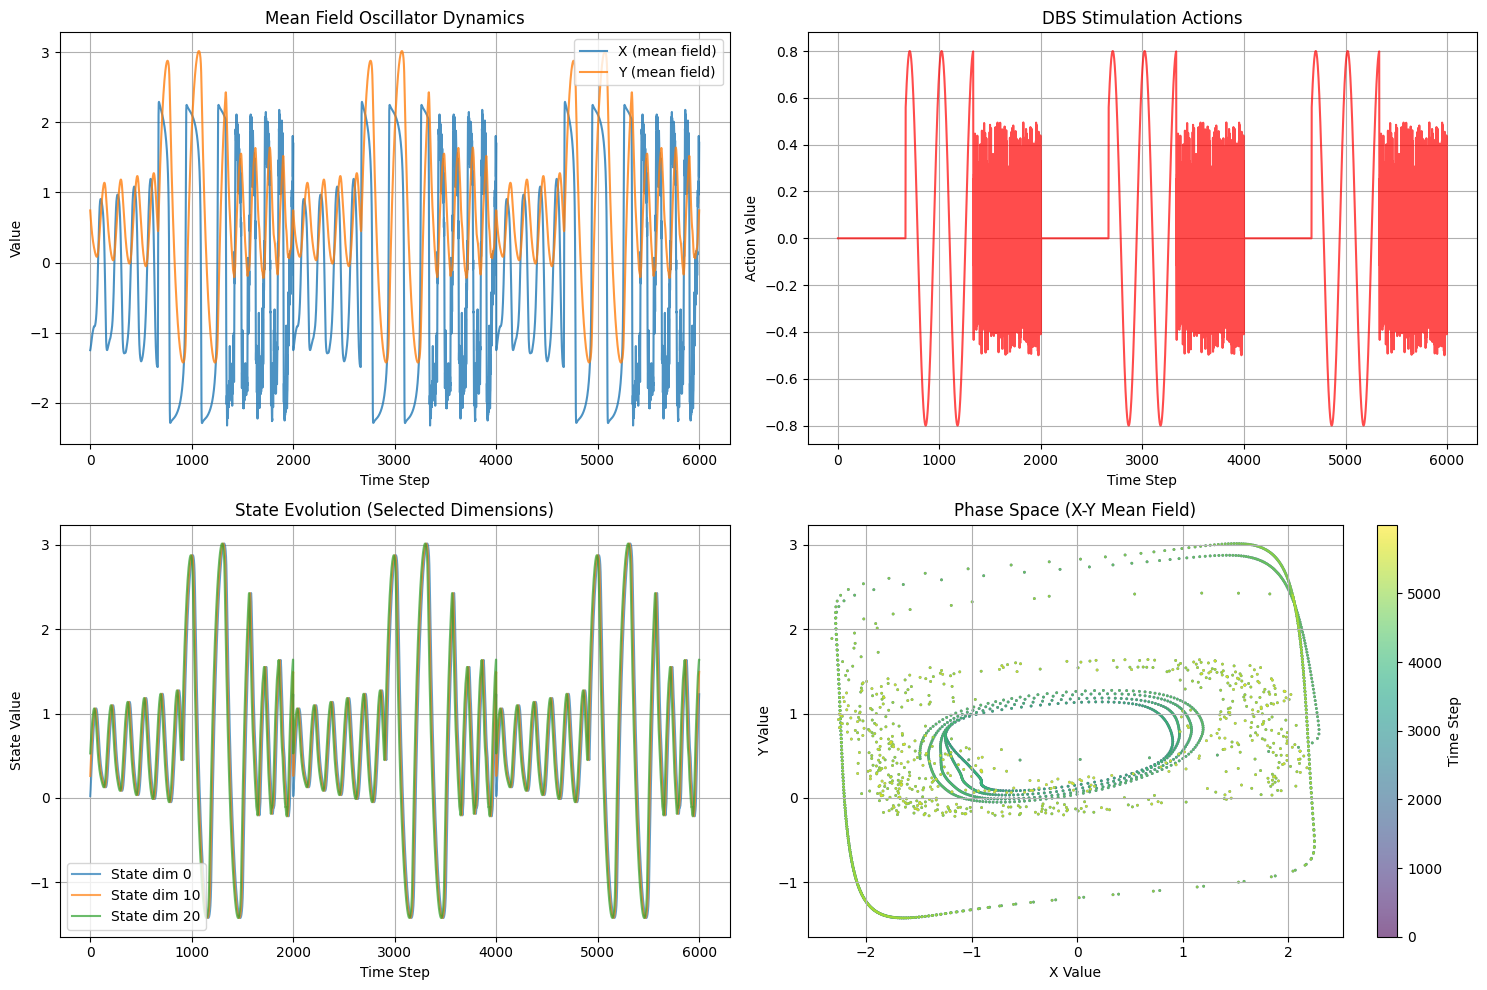


Step 2: Creating Neural ODE model...
Step 3: Preparing training data...
Step 4: Training Neural ODE model...
Starting Neural ODE training...
Epoch   0: Train Loss = 4.213552, Val Loss = 2.504161
Epoch  10: Train Loss = 1.505799, Val Loss = 1.422822
Epoch  20: Train Loss = 1.488588, Val Loss = 1.368917
Epoch  30: Train Loss = 1.408171, Val Loss = 1.275135
Epoch  40: Train Loss = 1.350348, Val Loss = 1.376061
Epoch  50: Train Loss = 1.182519, Val Loss = 1.138439
Epoch  60: Train Loss = 1.008992, Val Loss = 0.900204
Epoch  70: Train Loss = 0.980986, Val Loss = 0.883527
Epoch  80: Train Loss = 0.944263, Val Loss = 0.873277
Epoch  90: Train Loss = 0.816940, Val Loss = 0.760011
Epoch 100: Train Loss = 0.746278, Val Loss = 0.667999
Epoch 110: Train Loss = 0.703771, Val Loss = 0.642329
Epoch 120: Train Loss = 0.682656, Val Loss = 0.624979
Epoch 130: Train Loss = 0.687605, Val Loss = 0.682127
Epoch 140: Train Loss = 0.662599, Val Loss = 0.587047
Epoch 150: Train Loss = 0.645710, Val Loss = 0.5

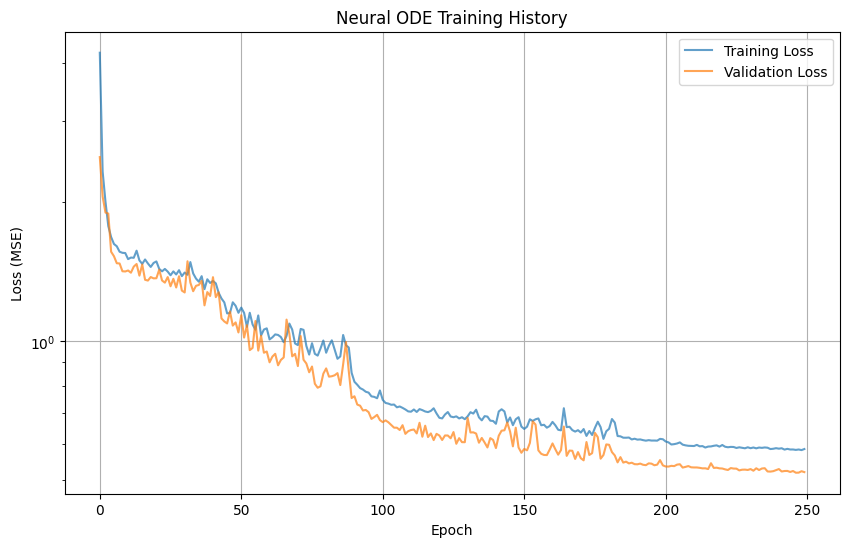

Step 5: Evaluating trained model...
Comparing Neural ODE predictions with environment dynamics...


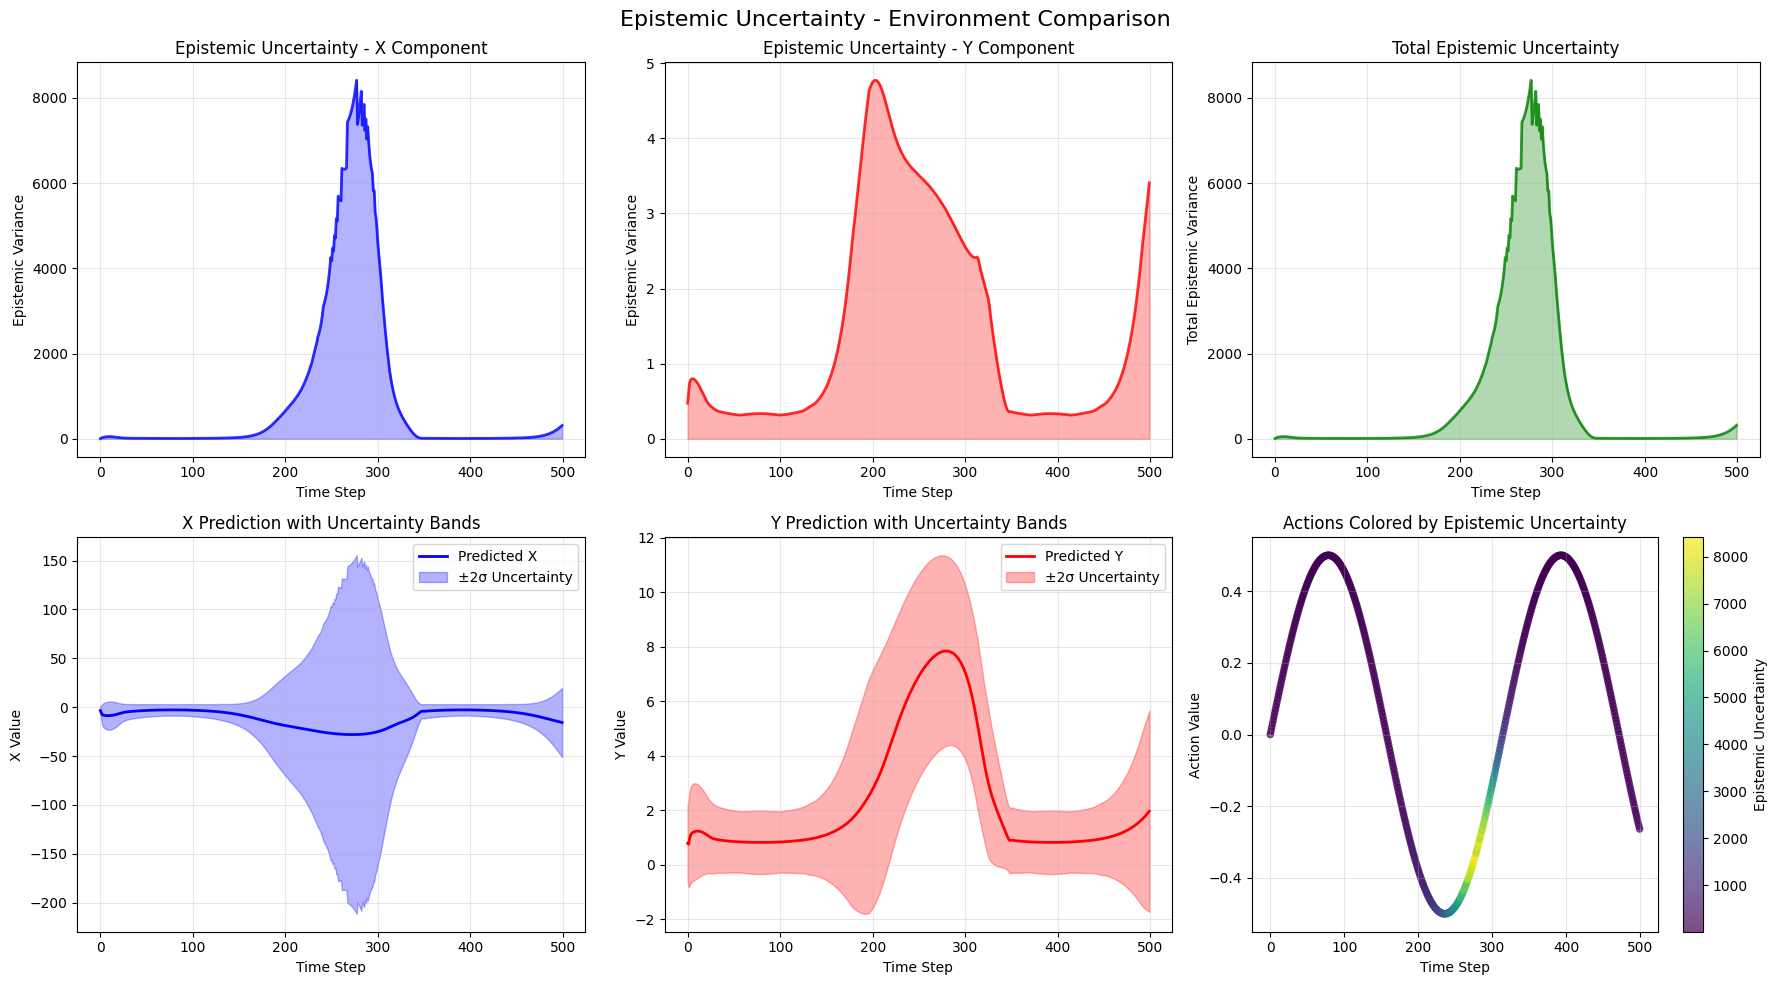


Epistemic Uncertainty Statistics:
  Mean X Uncertainty: 996.325439
  Mean Y Uncertainty: 1.461491
  Mean Total Uncertainty: 997.787048
  Max Total Uncertainty: 8413.470703
  Min Total Uncertainty: 5.457263


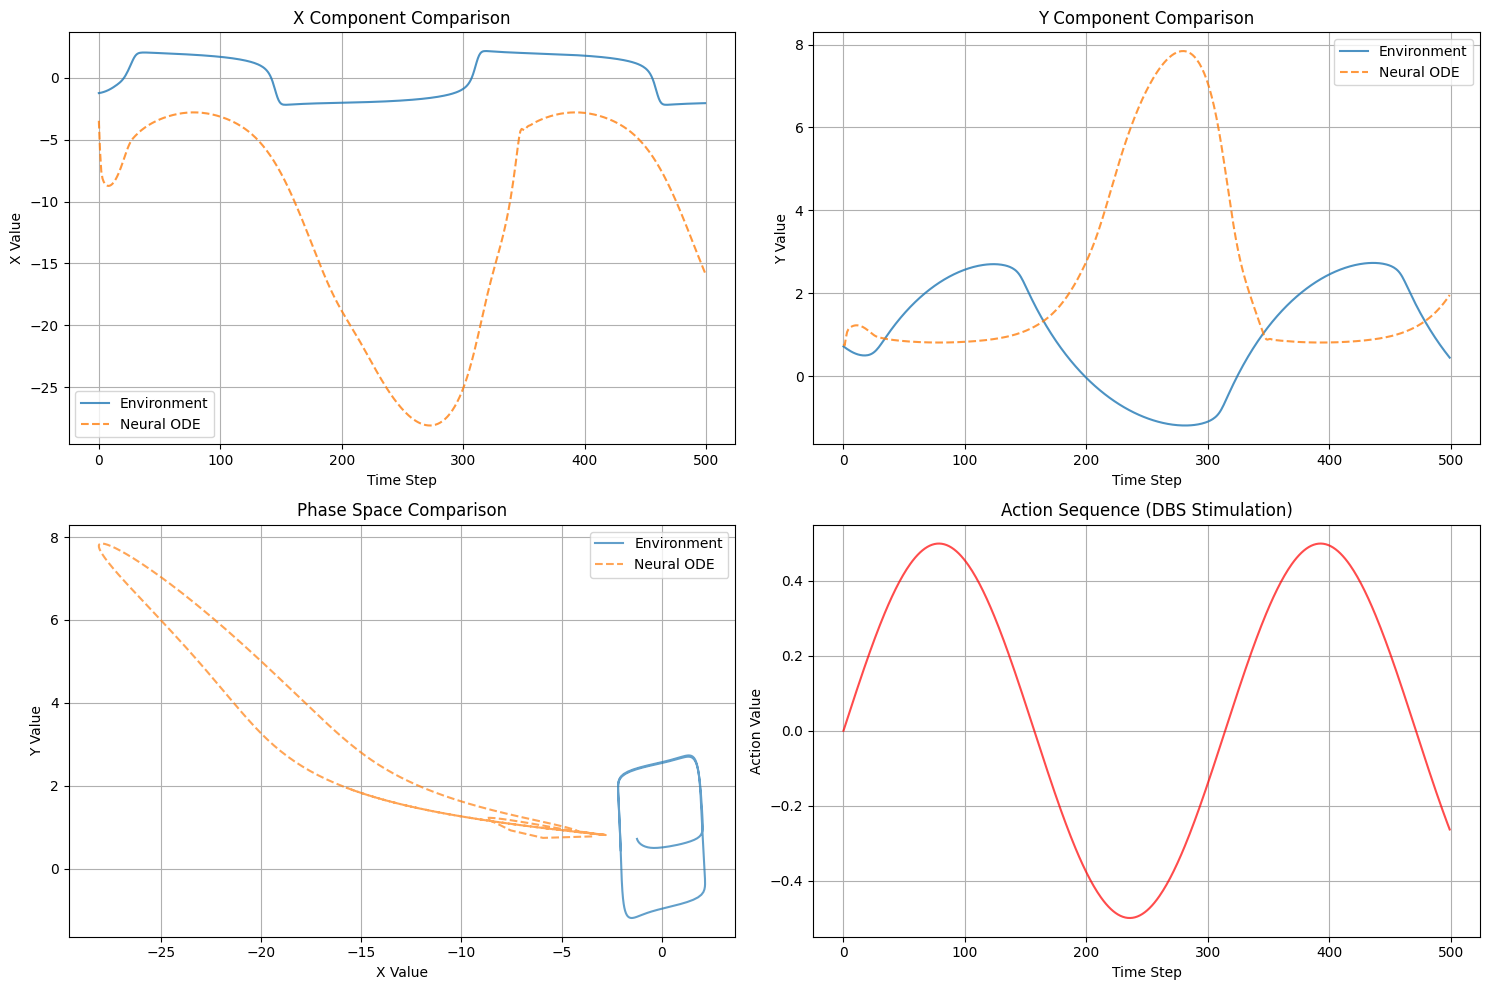

Prediction Accuracy Metrics:
  MSE X: 179.909701
  MSE Y: 14.024189
  Total MSE: 193.933890
Analyzing learned dynamics...


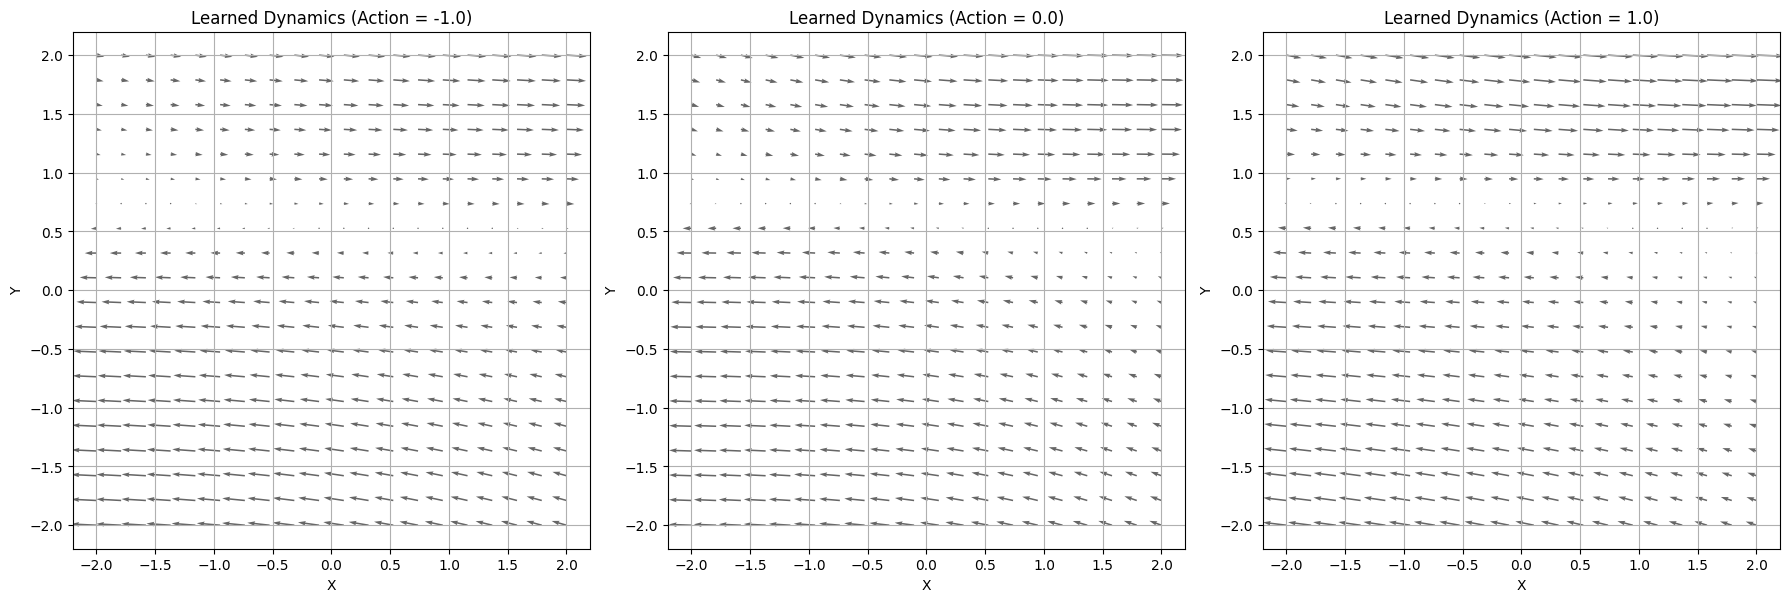


Step 6: Testing on new trajectory...


TypeError: tuple indices must be integers or slices, not tuple

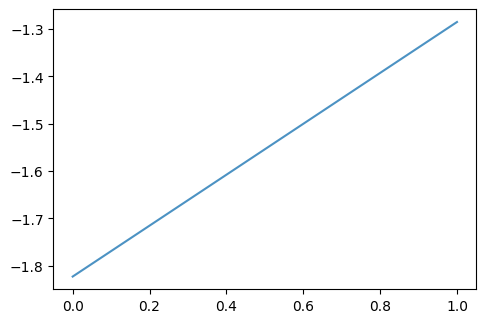

In [123]:
if __name__ == "__main__":
    model, trainer, evaluator = train_neural_ode_system_identification()

## Asid

In [62]:
import copy
import torch
import numpy as np
from typing import Optional, Dict, Any

class NeuralODEUncertaintyRewardWrapper:
    """
    Uncertainty-based reward wrapper for Neural ODE system identification
    
    This wrapper computes rewards based on prediction uncertainty of the Neural ODE model.
    High uncertainty regions get high rewards, encouraging exploration of informative areas.
    
    Args:
        neural_ode_model: Trained Neural ODE model
        trainer: Neural ODE trainer (contains scalers)
        delta (float): finite-difference step for uncertainty estimation
        normalization (float): normalization factor for rewards
        max_reward (float): maximum reward value
        uncertainty_method (str): 'ensemble', 'dropout', 'gradient', 'variance'
    """
    
    def __init__(self, neural_ode_model, trainer, delta=0.01, normalization=1.0, 
                 max_reward=100.0, uncertainty_method='variance', num_samples=10):
        self.neural_ode_model = neural_ode_model
        self.trainer = trainer
        self.delta = delta
        self.normalization = normalization
        self.max_reward = max_reward
        self.uncertainty_method = uncertainty_method
        self.num_samples = num_samples
        
        # Enable dropout for uncertainty estimation if using dropout method
        if uncertainty_method == 'dropout':
            self.enable_dropout()
    
    def enable_dropout(self):
        """Enable dropout layers for uncertainty estimation"""
        for module in self.neural_ode_model.modules():
            if isinstance(module, torch.nn.Dropout):
                module.train()
    
    def get_reward(self, current_state, action, verbose=False):
        """
        Compute uncertainty-based reward for current state and action
        
        Args:
            current_state (np.ndarray): Current state [x, y]
            action (np.ndarray): Action to take
            verbose (bool): Print debug information
            
        Returns:
            reward (float): Uncertainty-based reward
        """
        try:
            # Compute uncertainty based on selected method
            if self.uncertainty_method == 'variance':
                uncertainty = self.estimate_prediction_variance(current_state, action)
            elif self.uncertainty_method == 'ensemble':
                uncertainty = self.estimate_ensemble_uncertainty(current_state, action)
            elif self.uncertainty_method == 'dropout':
                uncertainty = self.estimate_dropout_uncertainty(current_state, action)
            elif self.uncertainty_method == 'gradient':
                uncertainty = self.estimate_gradient_uncertainty(current_state, action)
            else:
                raise ValueError(f"Unknown uncertainty method: {self.uncertainty_method}")
            
            if verbose:
                print(f"Uncertainty: {uncertainty:.6f}")
            
            # Convert uncertainty to reward
            reward = np.clip(uncertainty / self.normalization, 0.0, self.max_reward)
            
            if verbose:
                print(f"Reward: {reward:.6f}")
            
            return reward
            
        except Exception as e:
            if verbose:
                print(f"Error computing uncertainty reward: {e}")
            return 0.0
    
    def estimate_prediction_variance(self, current_state, action):
        """
        Estimate uncertainty by computing variance of multiple forward passes
        """
        self.neural_ode_model.eval()
        
        predictions = []
        
        # Make multiple predictions with small noise perturbations
        for _ in range(self.num_samples):
            with torch.no_grad():
                # Add small noise to inputs
                state_noise = np.random.normal(0, 0.01, current_state.shape)
                action_noise = np.random.normal(0, 0.01, action.shape)
                
                noisy_state = current_state + state_noise
                noisy_action = action + action_noise
                
                # Predict
                prediction = self.predict_next_state(noisy_state, noisy_action)
                predictions.append(prediction)
        
        # Compute variance across predictions
        predictions = np.array(predictions)
        variance = np.var(predictions, axis=0)
        
        # Return total variance (sum of variances for x and y)
        return np.sum(variance)
    
    def estimate_ensemble_uncertainty(self, current_state, action):
        """
        Estimate uncertainty using model parameter perturbations (pseudo-ensemble)
        """
        self.neural_ode_model.eval()
        
        predictions = []
        original_state = copy.deepcopy(self.neural_ode_model.state_dict())
        
        # Create pseudo-ensemble by perturbing model parameters
        for _ in range(self.num_samples):
            # Perturb model parameters slightly
            perturbed_state = copy.deepcopy(original_state)
            for key in perturbed_state:
                if 'weight' in key or 'bias' in key:
                    noise = torch.normal(0, 0.01, perturbed_state[key].shape)
                    perturbed_state[key] += noise
            
            # Load perturbed parameters
            self.neural_ode_model.load_state_dict(perturbed_state)
            
            # Make prediction
            with torch.no_grad():
                prediction = self.predict_next_state(current_state, action)
                predictions.append(prediction)
        
        # Restore original parameters
        self.neural_ode_model.load_state_dict(original_state)
        
        # Compute variance
        predictions = np.array(predictions)
        variance = np.var(predictions, axis=0)
        
        return np.sum(variance)
    
    def estimate_dropout_uncertainty(self, current_state, action):
        """
        Estimate uncertainty using Monte Carlo dropout
        """
        # Set model to training mode for dropout
        self.neural_ode_model.train()
        
        predictions = []
        
        # Make multiple predictions with dropout
        for _ in range(self.num_samples):
            prediction = self.predict_next_state(current_state, action)
            predictions.append(prediction)
        
        # Set back to eval mode
        self.neural_ode_model.eval()
        
        # Compute variance
        predictions = np.array(predictions)
        variance = np.var(predictions, axis=0)
        
        return np.sum(variance)
    
    def estimate_gradient_uncertainty(self, current_state, action):
        """
        Estimate uncertainty based on gradient magnitude (similar to ASID)
        """
        self.neural_ode_model.eval()
        
        # Compute gradients with respect to input perturbations
        gradients = []
        
        for dim in range(len(current_state)):
            # Perturb state in positive direction
            state_pos = current_state.copy()
            state_pos[dim] += self.delta
            pred_pos = self.predict_next_state(state_pos, action)
            
            # Perturb state in negative direction
            state_neg = current_state.copy()
            state_neg[dim] -= self.delta
            pred_neg = self.predict_next_state(state_neg, action)
            
            # Compute gradient
            grad = (pred_pos - pred_neg) / (2 * self.delta)
            gradients.append(grad)
        
        # Also compute gradients w.r.t. action
        for dim in range(len(action)):
            # Perturb action in positive direction
            action_pos = action.copy()
            action_pos[dim] += self.delta
            pred_pos = self.predict_next_state(current_state, action_pos)
            
            # Perturb action in negative direction
            action_neg = action.copy()
            action_neg[dim] -= self.delta
            pred_neg = self.predict_next_state(current_state, action_neg)
            
            # Compute gradient
            grad = (pred_pos - pred_neg) / (2 * self.delta)
            gradients.append(grad)
        
        # Convert to gradient matrix and compute Fisher Information-like measure
        gradients = np.array(gradients)  # [num_dims, state_dim]
        
        # Compute trace of gradient covariance (like ASID)
        fisher_info = np.trace(gradients.T @ gradients)
        
        return fisher_info
    
    def predict_next_state(self, current_state, action):
        """
        Predict next state using Neural ODE model
        """
        with torch.no_grad():
            # Normalize inputs
            state_norm = self.trainer.state_scaler.transform(current_state.reshape(1, -1))
            action_norm = self.trainer.action_scaler.transform(action.reshape(-1, 1))
            action_norm = action_norm.reshape(1, 1, -1)
            
            # Convert to tensors
            device = next(self.neural_ode_model.parameters()).device
            state_tensor = torch.FloatTensor(state_norm).to(device)
            action_tensor = torch.FloatTensor(action_norm).to(device)
            
            # Predict one step ahead
            predicted_states = self.neural_ode_model(state_tensor, action_tensor, None)
            predicted_state = predicted_states[0, 0].cpu().numpy()  # First timestep
            
            # Denormalize
            predicted_state = self.trainer.state_scaler.inverse_transform(
                predicted_state.reshape(1, -1)
            ).flatten()
            
            return predicted_state

In [63]:
class NeuralODEUncertaintyWrapper(gym.Wrapper):
    """
    Environment wrapper that adds uncertainty-based rewards for Neural ODE system identification
    
    This wrapper:
    1. Computes uncertainty-based rewards using the Neural ODE model
    2. Encourages exploration of regions where the model is most uncertain
    3. Tracks uncertainty statistics for analysis
    """
    
    def __init__(self, env, neural_ode_model=None, trainer=None, 
                 uncertainty_method='variance', delta=0.01, normalization=1.0, 
                 max_reward=100.0, reward_weight=1.0, verbose=False):
        super().__init__(env)
        
        self.neural_ode_model = neural_ode_model
        self.trainer = trainer
        self.uncertainty_method = uncertainty_method
        self.reward_weight = reward_weight
        self.verbose = verbose
        
        # Create uncertainty reward wrapper
        if neural_ode_model is not None and trainer is not None:
            self.uncertainty_wrapper = NeuralODEUncertaintyRewardWrapper(
                neural_ode_model=neural_ode_model,
                trainer=trainer,
                delta=delta,
                normalization=normalization,
                max_reward=max_reward,
                uncertainty_method=uncertainty_method
            )
        else:
            self.uncertainty_wrapper = None
        
        # Tracking variables
        self.uncertainty_history = []
        self.reward_history = []
        self.state_history = []
        self.action_history = []
        
        # Current step tracking
        self.step_count = 0
        
    def step(self, action):
        """Enhanced step with uncertainty-based reward"""
        
        # Get current state before action
        current_state = np.array([self.env.x_val, self.env.y_val])
        
        # Take environment step
        obs, env_reward, done, info = self.env.step(action)
        
        # Compute uncertainty reward
        uncertainty_reward = 0.0
        uncertainty_value = 0.0
        
        if self.uncertainty_wrapper is not None:
            uncertainty_reward = self.uncertainty_wrapper.get_reward(
                current_state, action, verbose=self.verbose
            )
            
            # Also track raw uncertainty (before normalization)
            if self.uncertainty_wrapper.uncertainty_method == 'variance':
                uncertainty_value = self.uncertainty_wrapper.estimate_prediction_variance(
                    current_state, action
                )
            elif self.uncertainty_wrapper.uncertainty_method == 'gradient':
                uncertainty_value = self.uncertainty_wrapper.estimate_gradient_uncertainty(
                    current_state, action
                )
        
        # Combine rewards
        total_reward = self.reward_weight * uncertainty_reward
        
        # Track statistics
        self.uncertainty_history.append(uncertainty_value)
        self.reward_history.append(uncertainty_reward)
        self.state_history.append(current_state.copy())
        self.action_history.append(action.copy())
        self.step_count += 1
        
        # Add uncertainty info to info dict
        info['uncertainty_reward'] = uncertainty_reward
        info['uncertainty_value'] = uncertainty_value
        info['env_reward'] = env_reward
        
        if self.verbose and self.step_count % 100 == 0:
            print(f"Step {self.step_count}: Uncertainty={uncertainty_value:.4f}, "
                  f"UncertaintyReward={uncertainty_reward:.4f}, EnvReward={env_reward:.4f}")
        
        return obs, total_reward, done, info
    
    def reset(self, **kwargs):
        """Reset environment and clear tracking"""
        obs = self.env.reset(**kwargs)
        
        # Clear histories but keep them for analysis
        if len(self.uncertainty_history) > 0:
            # Store episode statistics
            self.last_episode_stats = self.get_uncertainty_statistics()
        
        self.uncertainty_history = []
        self.reward_history = []
        self.state_history = []
        self.action_history = []
        self.step_count = 0
        
        return obs
    
    def update_model(self, new_neural_ode_model, new_trainer):
        """Update the Neural ODE model and trainer"""
        self.neural_ode_model = new_neural_ode_model
        self.trainer = new_trainer
        
        if new_neural_ode_model is not None and new_trainer is not None:
            self.uncertainty_wrapper = NeuralODEUncertaintyRewardWrapper(
                neural_ode_model=new_neural_ode_model,
                trainer=new_trainer,
                delta=self.uncertainty_wrapper.delta if self.uncertainty_wrapper else 0.01,
                normalization=self.uncertainty_wrapper.normalization if self.uncertainty_wrapper else 1.0,
                max_reward=self.uncertainty_wrapper.max_reward if self.uncertainty_wrapper else 100.0,
                uncertainty_method=self.uncertainty_method
            )
    
    def get_uncertainty_statistics(self):
        """Get statistics about collected uncertainty data"""
        if len(self.uncertainty_history) == 0:
            return {
                'mean_uncertainty': 0.0,
                'std_uncertainty': 0.0,
                'max_uncertainty': 0.0,
                'min_uncertainty': 0.0,
                'mean_reward': 0.0,
                'total_steps': 0
            }
        
        uncertainties = np.array(self.uncertainty_history)
        rewards = np.array(self.reward_history)
        
        return {
            'mean_uncertainty': np.mean(uncertainties),
            'std_uncertainty': np.std(uncertainties),
            'max_uncertainty': np.max(uncertainties),
            'min_uncertainty': np.min(uncertainties),
            'mean_reward': np.mean(rewards),
            'total_steps': len(uncertainties)
        }
    
    def visualize_uncertainty_exploration(self):
        """Visualize the uncertainty-based exploration"""
        if len(self.uncertainty_history) == 0:
            print("No data to visualize!")
            return
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Neural ODE Uncertainty-Based Exploration Analysis', fontsize=16)
        
        # Plot 1: Uncertainty over time
        axes[0, 0].plot(self.uncertainty_history, alpha=0.7, color='blue')
        axes[0, 0].set_title('Uncertainty Over Time')
        axes[0, 0].set_xlabel('Step')
        axes[0, 0].set_ylabel('Uncertainty Value')
        axes[0, 0].grid(True)
        
        # Plot 2: Uncertainty rewards over time
        axes[0, 1].plot(self.reward_history, alpha=0.7, color='green')
        axes[0, 1].set_title('Uncertainty Rewards Over Time')
        axes[0, 1].set_xlabel('Step')
        axes[0, 1].set_ylabel('Reward Value')
        axes[0, 1].grid(True)
        
        # Plot 3: Uncertainty distribution
        axes[0, 2].hist(self.uncertainty_history, bins=50, alpha=0.7, color='purple')
        axes[0, 2].set_title('Uncertainty Distribution')
        axes[0, 2].set_xlabel('Uncertainty Value')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].grid(True)
        
        # Plot 4: State space colored by uncertainty
        if len(self.state_history) > 0:
            states = np.array(self.state_history)
            scatter = axes[1, 0].scatter(states[:, 0], states[:, 1], 
                                       c=self.uncertainty_history, 
                                       cmap='viridis', alpha=0.6, s=10)
            axes[1, 0].set_title('State Space (colored by uncertainty)')
            axes[1, 0].set_xlabel('X Value')
            axes[1, 0].set_ylabel('Y Value')
            plt.colorbar(scatter, ax=axes[1, 0], label='Uncertainty')
            axes[1, 0].grid(True)
        
        # Plot 5: Action distribution colored by uncertainty
        if len(self.action_history) > 0:
            actions = np.array(self.action_history)
            scatter = axes[1, 1].scatter(range(len(actions)), actions.flatten(), 
                                       c=self.uncertainty_history, 
                                       cmap='plasma', alpha=0.6, s=10)
            axes[1, 1].set_title('Actions (colored by uncertainty)')
            axes[1, 1].set_xlabel('Step')
            axes[1, 1].set_ylabel('Action Value')
            plt.colorbar(scatter, ax=axes[1, 1], label='Uncertainty')
            axes[1, 1].grid(True)
        
        # Plot 6: Uncertainty vs Reward correlation
        axes[1, 2].scatter(self.uncertainty_history, self.reward_history, alpha=0.6, s=10)
        axes[1, 2].set_title('Uncertainty vs Reward Correlation')
        axes[1, 2].set_xlabel('Uncertainty Value')
        axes[1, 2].set_ylabel('Reward Value')
        axes[1, 2].grid(True)
        
        # Add correlation coefficient
        if len(self.uncertainty_history) > 1:
            corr = np.corrcoef(self.uncertainty_history, self.reward_history)[0, 1]
            axes[1, 2].text(0.05, 0.95, f'Correlation: {corr:.3f}', 
                          transform=axes[1, 2].transAxes, 
                          bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        # Print statistics
        stats = self.get_uncertainty_statistics()
        print(f"\nUncertainty Exploration Statistics:")
        print(f"  Mean Uncertainty: {stats['mean_uncertainty']:.6f}")
        print(f"  Std Uncertainty:  {stats['std_uncertainty']:.6f}")
        print(f"  Max Uncertainty:  {stats['max_uncertainty']:.6f}")
        print(f"  Mean Reward:      {stats['mean_reward']:.6f}")
        print(f"  Total Steps:      {stats['total_steps']}")

In [ ]:
class UncertaintyBasedActiveAgent:
    """
    Active data collection agent that seeks high-uncertainty regions for Neural ODE training
    
    This agent learns to:
    1. Identify regions where Neural ODE predictions are most uncertain
    2. Collect data in those regions to improve model performance
    3. Adaptively update exploration strategy as model improves
    """
    
    def __init__(self, env_id='oscillator-v0', neural_ode_model=None, trainer=None,
                 uncertainty_method='variance', reward_weight=1.0):
        self.env_id = env_id
        self.neural_ode_model = neural_ode_model
        self.trainer = trainer
        self.uncertainty_method = uncertainty_method
        self.reward_weight = reward_weight
        
        # Create uncertainty-wrapped environment
        base_env = gym.make(env_id)
        self.env = NeuralODEUncertaintyWrapper(
            base_env,
            neural_ode_model=neural_ode_model,
            trainer=trainer,
            uncertainty_method=uncertainty_method,
            reward_weight=reward_weight,
            verbose=False
        )
        
        # RL Agent for uncertainty-based exploration
        from stable_baselines3 import SAC
        from stable_baselines3.common.noise import NormalActionNoise
        
        # Add action noise for better exploration
        n_actions = self.env.action_space.shape[-1]
        action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))
        
        self.agent = SAC(
            "MlpPolicy", 
            self.env, 
            verbose=1,
            action_noise=action_noise,
            learning_starts=1000,
            train_freq=1,
            gradient_steps=1,
            ent_coef='auto'
        )
        
        # Data collection tracking
        self.collected_episodes = []
        self.uncertainty_evolution = []
        
    def train_agent(self, total_timesteps=50000, callback_freq=5000):
        """Train the uncertainty-seeking agent"""
        print(f"Training uncertainty-based active agent for {total_timesteps} steps...")
        
        # Custom callback to track uncertainty evolution
        class UncertaintyCallback:
            def __init__(self, agent_wrapper):
                self.agent_wrapper = agent_wrapper
                self.uncertainty_snapshots = []
                
            def __call__(self, locals_, globals_):
                # Record uncertainty statistics periodically
                if locals_['self'].num_timesteps % callback_freq == 0:
                    stats = self.agent_wrapper.env.get_uncertainty_statistics()
                    self.uncertainty_snapshots.append({
                        'timestep': locals_['self'].num_timesteps,
                        'mean_uncertainty': stats['mean_uncertainty'],
                        'max_uncertainty': stats['max_uncertainty']
                    })
                    print(f"Step {locals_['self'].num_timesteps}: "
                          f"Mean Uncertainty: {stats['mean_uncertainty']:.6f}")
                return True
        
        uncertainty_callback = UncertaintyCallback(self)
        
        # Train the agent
        self.agent.learn(
            total_timesteps=total_timesteps,
            callback=uncertainty_callback
        )
        
        # Store uncertainty evolution
        self.uncertainty_evolution = uncertainty_callback.uncertainty_snapshots

        # Save the trained agent
        self.agent.save("sac_active_data_collection_agent")
        
        print("Agent training complete!")
    
    def collect_uncertainty_data(self, num_episodes=30, max_steps_per_episode=1000, 
                                update_model_freq=10):
        """
        Collect data by seeking high-uncertainty regions
        
        Args:
            num_episodes: Number of episodes to collect
            max_steps_per_episode: Maximum steps per episode
            update_model_freq: How often to update model during collection
        """
        print(f"Collecting uncertainty-based data for {num_episodes} episodes...")
        
        collected_data = {
            'states': [],
            'actions': [],
            'next_states': [],
            'x_vals': [],
            'y_vals': [],
            'timestamps': [],
            'uncertainties': [],
            'rewards': []
        }
        
        episode_stats = []
        timestamp_counter = 0
        
        for episode in range(num_episodes):
            obs = self.env.reset()
            episode_uncertainties = []
            episode_rewards = []
            episode_data = {'states': [], 'actions': [], 'next_states': []}
            
            for step in range(max_steps_per_episode):
                # Get action from trained agent (seeks high uncertainty)
                action, _ = self.agent.predict(obs, deterministic=False)
                
                # Store pre-action state
                pre_state = np.array([self.env.env.x_val, self.env.env.y_val])
                
                # Take action
                next_obs, reward, done, info = self.env.step(action)
                
                # Store post-action state
                post_state = np.array([self.env.env.x_val, self.env.env.y_val])
                
                # Collect data
                collected_data['states'].append(pre_state)
                collected_data['actions'].append(action.flatten())  # Ensure 1D action
                collected_data['next_states'].append(post_state)
                collected_data['x_vals'].append(pre_state[0])
                collected_data['y_vals'].append(pre_state[1])
                collected_data['timestamps'].append(timestamp_counter)
                
                episode_uncertainties.append(info.get('uncertainty_value', 0.0))
                episode_rewards.append(info.get('uncertainty_reward', 0.0))
                
                obs = next_obs
                timestamp_counter += 1
                
                if done:
                    break
            
            # Add episode data to collection
            for key in episode_data:
                collected_data[key].extend(episode_data[key])
            
            collected_data['uncertainties'].extend(episode_uncertainties)
            collected_data['rewards'].extend(episode_rewards)
            
            # Episode statistics
            episode_stat = {
                'episode': episode,
                'steps': len(episode_uncertainties),
                'mean_uncertainty': np.mean(episode_uncertainties),
                'max_uncertainty': np.max(episode_uncertainties),
                'total_reward': np.sum(episode_rewards)
            }
            episode_stats.append(episode_stat)
            
            if episode % 5 == 0:
                print(f"Episode {episode}: Steps={episode_stat['steps']}, "
                      f"Mean Uncertainty={episode_stat['mean_uncertainty']:.6f}, "
                      f"Max Uncertainty={episode_stat['max_uncertainty']:.6f}")
            
            # Update model periodically during collection
            # if episode > 0 and episode % update_model_freq == 0:
            #     print(f"Updating Neural ODE model at episode {episode}...")
            #     # Convert lists to numpy arrays before calling update
            #     temp_collected_data = {}
            #     for key in ['states', 'actions', 'next_states', 'uncertainties', 'rewards']:
            #         temp_collected_data[key] = np.array(collected_data[key])
            #     self.update_neural_ode_with_data(temp_collected_data)
        
        # Convert to numpy arrays
        for key in ['states', 'actions', 'next_states', 'uncertainties', 'rewards']:
            collected_data[key] = np.array(collected_data[key])
        
        # Store collection results
        self.collected_episodes = episode_stats

        # Convert to numpy arrays with proper shapes
        collected_data['states'] = np.array(collected_data['states'])  # Shape: (N, 2)
        collected_data['actions'] = np.array(collected_data['actions'])  # Shape: (N, action_dim)
        collected_data['next_states'] = np.array(collected_data['next_states'])  # Shape: (N, 2)
        
        print(f"Data collection complete!")
        print(f"Collected {len(collected_data['states'])} data points")
        print(f"Mean uncertainty: {np.mean(collected_data['uncertainties']):.6f}")
        print(f"Max uncertainty: {np.max(collected_data['uncertainties']):.6f}")
        
        return collected_data
    
    def update_neural_ode_with_data(self, collected_data):
        """Update Neural ODE model with newly collected data"""
        if self.neural_ode_model is None or self.trainer is None:
            print("No Neural ODE model to update!")
            return
        
        # Convert collected data to training format
        training_data = {
            'x_vals': collected_data['states'][:, 0],
            'y_vals': collected_data['states'][:, 1],
            'actions': collected_data['actions'],
            'timestamps': np.arange(len(collected_data['states']))
        }
        
        # Quick training iteration
        try:
            train_loader, val_loader = self.trainer.prepare_data(
                training_data, sequence_length=15, stride=3
            )
            
            # Short training to incorporate new data
            self.trainer.train(train_loader, val_loader, epochs=40)
            
            # Update environment's model
            self.env.update_model(self.neural_ode_model, self.trainer)
            
            print("Neural ODE model updated successfully!")
            
        except Exception as e:
            print(f"Error updating Neural ODE model: {e}")
    
    def update_model(self, new_neural_ode_model, new_trainer):
        """Update the Neural ODE model and trainer"""
        self.neural_ode_model = new_neural_ode_model
        self.trainer = new_trainer
        self.env.update_model(new_neural_ode_model, new_trainer)
    
    def analyze_collection_efficiency(self):
        """Analyze the efficiency of uncertainty-based data collection"""
        if not self.collected_episodes:
            print("No collection data to analyze!")
            return
        
        episodes = [ep['episode'] for ep in self.collected_episodes]
        mean_uncertainties = [ep['mean_uncertainty'] for ep in self.collected_episodes]
        max_uncertainties = [ep['max_uncertainty'] for ep in self.collected_episodes]
        total_rewards = [ep['total_reward'] for ep in self.collected_episodes]
        
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Uncertainty-Based Data Collection Analysis', fontsize=16)
        
        # Plot 1: Mean uncertainty over episodes
        axes[0, 0].plot(episodes, mean_uncertainties, 'b-o', alpha=0.7)
        axes[0, 0].set_title('Mean Uncertainty per Episode')
        axes[0, 0].set_xlabel('Episode')
        axes[0, 0].set_ylabel('Mean Uncertainty')
        axes[0, 0].grid(True)
        
        # Plot 2: Max uncertainty over episodes
        axes[0, 1].plot(episodes, max_uncertainties, 'r-o', alpha=0.7)
        axes[0, 1].set_title('Max Uncertainty per Episode')
        axes[0, 1].set_xlabel('Episode')
        axes[0, 1].set_ylabel('Max Uncertainty')
        axes[0, 1].grid(True)
        
        # Plot 3: Total reward per episode
        axes[1, 0].plot(episodes, total_rewards, 'g-o', alpha=0.7)
        axes[1, 0].set_title('Total Uncertainty Reward per Episode')
        axes[1, 0].set_xlabel('Episode')
        axes[1, 0].set_ylabel('Total Reward')
        axes[1, 0].grid(True)
        
        # Plot 4: Training evolution (if available)
        if self.uncertainty_evolution:
            timesteps = [ue['timestep'] for ue in self.uncertainty_evolution]
            mean_unc_training = [ue['mean_uncertainty'] for ue in self.uncertainty_evolution]
            axes[1, 1].plot(timesteps, mean_unc_training, 'purple', alpha=0.7)
            axes[1, 1].set_title('Uncertainty During Agent Training')
            axes[1, 1].set_xlabel('Training Timestep')
            axes[1, 1].set_ylabel('Mean Uncertainty')
            axes[1, 1].grid(True)
        else:
            axes[1, 1].text(0.5, 0.5, 'No training evolution data', 
                          ha='center', va='center', transform=axes[1, 1].transAxes)
            axes[1, 1].set_title('Training Evolution')
        
        plt.tight_layout()
        plt.show()
        
        # Print summary statistics
        print(f"\nUncertainty Collection Summary:")
        print(f"  Total Episodes: {len(self.collected_episodes)}")
        print(f"  Mean Uncertainty (avg): {np.mean(mean_uncertainties):.6f}")
        print(f"  Mean Uncertainty (std): {np.std(mean_uncertainties):.6f}")
        print(f"  Max Uncertainty (peak): {np.max(max_uncertainties):.6f}")
        print(f"  Total Reward (avg): {np.mean(total_rewards):.6f}")
        
        # Show exploration efficiency
        if len(mean_uncertainties) > 1:
            uncertainty_trend = np.polyfit(episodes, mean_uncertainties, 1)[0]
            print(f"  Uncertainty Trend: {uncertainty_trend:.8f} (slope per episode)")
            if uncertainty_trend < 0:
                print("  ✓ Model is learning - uncertainty decreasing over time")
            else:
                print("  ⚠ Model may not be improving - uncertainty stable/increasing")

In [65]:
class UncertaintyBasedASIDTrainer:
    """
    Complete training loop for uncertainty-based active system identification

    This implements the ASID-aligned iterative process:
    1. Train Neural ODE on all accumulated data
    2. Active Learning: Train agent + collect data (integrated step)
    3. Repeat until model uncertainty is below threshold

    This 2-step approach ensures tighter coupling between model updates
    and exploration, which is more aligned with ASID principles.
    """
    
    def __init__(self, env_id='oscillator-v0', uncertainty_threshold=0.01, 
                 uncertainty_method='variance', buffer_size=200000):
        self.env_id = env_id
        self.uncertainty_threshold = uncertainty_threshold
        self.uncertainty_method = uncertainty_method
        self.buffer_size = buffer_size
        
        # Core components
        self.neural_ode_model = None
        self.neural_ode_trainer = None
        self.active_agent = None
        self.trainer = None
        
        # Training history
        self.iteration_history = []
        self.all_collected_data = []
        
    def initialize_neural_ode(self):
        """Initialize Neural ODE model and trainer"""
        print("Initializing Neural ODE model...")
        self.neural_ode_model = BrainOscillatorNeuralODE(state_dim=2, hidden_dim=128, action_dim=1)
        self.neural_ode_trainer = NeuralODETrainer(self.neural_ode_model, learning_rate=1e-3)
        print("Neural ODE model initialized!")
    
    def collect_initial_data(self, num_steps=3000):
        """Collect initial random data to bootstrap the Neural ODE"""
        print("Collecting initial bootstrap data...")
        collector = RLDBSDataCollector(self.env_id)
        
        # Collect diverse initial data with different action strategies
        data_random = collector.collect_trajectory(num_steps=num_steps//3, action_type='random')
        data_sin = collector.collect_trajectory(num_steps=num_steps//3, action_type='sinusoidal')
        data_mixed = collector.collect_trajectory(num_steps=num_steps//3, action_type='mixed')


        # FIX: Extract only x_val, y_val from states to match active agent format
        def extract_xy_states(data):
            """Extract x_val, y_val from full state observations"""
            # Assuming data['states'] contains full env observations
            # Convert to [x_val, y_val] format to match active agent
            return {
                'states': np.column_stack([data['x_vals'], data['y_vals']]),  # Shape: (N, 2)
                'actions': data['actions'],
                'next_states': np.column_stack([data['x_vals'][1:], data['y_vals'][1:]]),  # Next states
                'x_vals': data['x_vals'],
                'y_vals': data['y_vals'],
                'timestamps': data['timestamps']
            }
        
        # Apply format conversion
        data_random = extract_xy_states(data_random)
        data_sin = extract_xy_states(data_sin)
        data_mixed = extract_xy_states(data_mixed)
        
        # Combine datasets
        combined_data = {
            'states': np.vstack([data_random['states'], data_sin['states'], data_mixed['states']]),
            'actions': np.vstack([data_random['actions'], data_sin['actions'], data_mixed['actions']]),
            'next_states': np.vstack([data_random['next_states'], data_sin['next_states'], data_mixed['next_states']]),
            'x_vals': np.concatenate([data_random['x_vals'], data_sin['x_vals'], data_mixed['x_vals']]),
            'y_vals': np.concatenate([data_random['y_vals'], data_sin['y_vals'], data_mixed['y_vals']]),
            'timestamps': np.concatenate([
                data_random['timestamps'], 
                data_sin['timestamps'] + len(data_random['timestamps']),
                data_mixed['timestamps'] + len(data_random['timestamps']) + len(data_sin['timestamps'])
            ])
        }
        
        print(f"Collected {len(combined_data['x_vals'])} initial data points")
        return combined_data
    
    def train_neural_ode_iteration(self, data, epochs=20):
        """Train Neural ODE for one iteration"""
        print(f"Training Neural ODE for {epochs} epochs...")
        
        # Prepare data for training
        train_loader, val_loader = self.neural_ode_trainer.prepare_data(
            data, sequence_length=25, stride=5
        )
        
        # Train the model
        self.neural_ode_trainer.train(train_loader, val_loader, epochs=epochs)
        
        # Get final loss
        final_loss = self.neural_ode_trainer.val_losses[-1] if self.neural_ode_trainer.val_losses else float('inf')
        print(f"Neural ODE training complete. Final validation loss: {final_loss:.6f}")
        
        return final_loss
    
    def evaluate_model_uncertainty(self, num_test_points=1000):
        """Evaluate current model's uncertainty across the state space"""
        print("Evaluating model uncertainty...")
        
        # Create test environment
        test_env = gym.make(self.env_id)
        
        # Create uncertainty wrapper for evaluation
        uncertainty_wrapper = NeuralODEUncertaintyRewardWrapper(
            self.neural_ode_model, self.neural_ode_trainer, 
            uncertainty_method=self.uncertainty_method
        )
        
        uncertainties = []
        
        # Collect uncertainty measurements
        obs = test_env.reset()
        if isinstance(obs, tuple):
            obs = obs[0]
        
        for _ in range(num_test_points):
            # Random action for diverse testing
            action = test_env.action_space.sample()
            
            # Get current state
            current_state = np.array([test_env.x_val, test_env.y_val])
            
            # Compute uncertainty
            try:
                if self.uncertainty_method == 'variance':
                    uncertainty = uncertainty_wrapper.estimate_prediction_variance(current_state, action)
                elif self.uncertainty_method == 'gradient':
                    uncertainty = uncertainty_wrapper.estimate_gradient_uncertainty(current_state, action)
                else:
                    uncertainty = uncertainty_wrapper.get_reward(current_state, action)
                
                uncertainties.append(uncertainty)
            except:
                pass  # Skip failed predictions
            
            # Take step
            obs, reward, done, info = test_env.step(action)
            if isinstance(obs, tuple):
                obs = obs[0]
            
            if done:
                obs = test_env.reset()
                if isinstance(obs, tuple):
                    obs = obs[0]
        
        test_env.close()
        
        if len(uncertainties) == 0:
            return float('inf')
        
        mean_uncertainty = np.mean(uncertainties)
        print(f"Mean model uncertainty: {mean_uncertainty:.6f}")
        
        return mean_uncertainty


    def _combine_all_data(self):
        """Combine all collected data from previous iterations with validation"""
        if not self.all_collected_data:
            raise ValueError("No data collected yet!")
        
        if len(self.all_collected_data) == 1:
            return self.all_collected_data[0]
        
        # VALIDATION: Check data shape consistency before combining
        print("Validating data shapes before combination...")
        for i, data in enumerate(self.all_collected_data):
            print(f"Collection {i}: states shape = {data['states'].shape}, actions shape = {data['actions'].shape}")
            
            # Ensure all collections have same state dimensions
            if i > 0:
                expected_state_dim = self.all_collected_data[0]['states'].shape[1]
                actual_state_dim = data['states'].shape[1]
                if actual_state_dim != expected_state_dim:
                    raise ValueError(f"State dimension mismatch in collection {i}: "
                                f"expected {expected_state_dim}, got {actual_state_dim}")
        
        # Combine all datasets
        combined = {
            'states': np.vstack([data['states'] for data in self.all_collected_data]),
            'actions': np.vstack([data['actions'] for data in self.all_collected_data]),
            'next_states': np.vstack([data['next_states'] for data in self.all_collected_data]),
            'x_vals': np.concatenate([data['x_vals'] for data in self.all_collected_data]),
            'y_vals': np.concatenate([data['y_vals'] for data in self.all_collected_data]),
            'timestamps': np.concatenate([data['timestamps'] for data in self.all_collected_data])
        }
        
        # Add uncertainties if available in all collections
        if all('uncertainties' in data for data in self.all_collected_data):
            combined['uncertainties'] = np.concatenate([data['uncertainties'] for data in self.all_collected_data])
        
        print(f"Combined data shapes: states={combined['states'].shape}, actions={combined['actions'].shape}")
        return combined

    
    def _manage_data_buffer(self):
        """
        Manage the all_collected_data buffer to prevent excessive memory usage
        
        Keeps recent collections and merges older ones to maintain diversity
        while respecting memory constraints.
        """
        # If we have too many separate collections, merge older ones
        max_collections = 10  # Keep at most 10 separate collections
        
        if len(self.all_collected_data) > max_collections:
            print(f"Managing data collection buffer ({len(self.all_collected_data)} collections)")
            
            # Keep most recent collections separate
            recent_collections = self.all_collected_data[-3:]  # Keep last 3 separate
            older_collections = self.all_collected_data[:-3]   # Merge the rest
            
            # Merge older collections into one
            if older_collections:
                merged_old = {
                    'states': np.vstack([data['states'] for data in older_collections]),
                    'actions': np.vstack([data['actions'] for data in older_collections]),
                    'next_states': np.vstack([data['next_states'] for data in older_collections]),
                    'x_vals': np.concatenate([data['x_vals'] for data in older_collections]),
                    'y_vals': np.concatenate([data['y_vals'] for data in older_collections]),
                    'timestamps': np.concatenate([data['timestamps'] for data in older_collections])
                }
                
                # Add uncertainties if available
                if 'uncertainties' in older_collections[0]:
                    merged_old['uncertainties'] = np.concatenate([
                        data['uncertainties'] for data in older_collections
                    ])
                
                # Update the collection list
                self.all_collected_data = [merged_old] + recent_collections
                
                print(f"Merged {len(older_collections)} older collections into 1")
                print(f"Now maintaining {len(self.all_collected_data)} total collections")

    
    def run_uncertainty_iteration(self, iteration, initial_data=None):
        """Run one complete uncertainty-based ASID iteration"""
        print(f"\n{'='*70}")
        print(f"Uncertainty-Based ASID Iteration {iteration}")
        print(f"{'='*70}")
        
        # Step 1: Train/update Neural ODE
        if initial_data is not None:
            # Use initial data for first iteration
            current_data = initial_data
            self.all_collected_data = [current_data]
            neural_ode_loss = self.train_neural_ode_iteration(current_data, epochs=20)
        else:
            # For subsequent iterations, we already have updated data
            # neural_ode_loss = 0.0  # Skip training as model was updated during collection
            combined_data = self._combine_all_data()
            neural_ode_loss = self.train_neural_ode_iteration(combined_data, epochs=20)
        
        # Step 2: Create/update active agent
        if self.active_agent is None:
            print("Creating uncertainty-based active agent...")
            self.active_agent = UncertaintyBasedActiveAgent(
                env_id=self.env_id,
                neural_ode_model=self.neural_ode_model,
                trainer=self.neural_ode_trainer,
                uncertainty_method=self.uncertainty_method,
                reward_weight=1.0
            )
            
            # Train the agent initially
            print("Training active agent...")
            self.active_agent.train_agent(total_timesteps=20000)
        else:
            # Update existing agent with new model
            print("Updating active agent with new model...")
            self.active_agent.update_model(self.neural_ode_model, self.neural_ode_trainer)
            
            # Additional training with updated model
            self.active_agent.train_agent(total_timesteps=20000)
        
        # Step 3: Collect uncertainty-based data
        print("Collecting data in high-uncertainty regions...")
        collected_data = self.active_agent.collect_uncertainty_data(
            num_episodes=5, 
            max_steps_per_episode=1000,
            update_model_freq=8  # Update model during collection
        )
        
        # Store collected data
        self.all_collected_data.append(collected_data)
        self._manage_data_buffer()
        
        # Step 4: Evaluate model uncertainty
        mean_uncertainty = self.evaluate_model_uncertainty(num_test_points=500)
        
        # Step 5: Store iteration results
        iteration_result = {
            'iteration': iteration,
            'neural_ode_loss': neural_ode_loss,
            'mean_uncertainty': mean_uncertainty,
            'data_points_collected': len(collected_data['states']),
            'max_uncertainty_found': np.max(collected_data['uncertainties']),
            'converged': mean_uncertainty < self.uncertainty_threshold
        }
        
        self.iteration_history.append(iteration_result)
        
        print(f"\nIteration {iteration} Results:")
        print(f"  Neural ODE Loss: {neural_ode_loss:.6f}")
        print(f"  Mean Uncertainty: {mean_uncertainty:.6f}")
        print(f"  Data Points Collected: {len(collected_data['states'])}")
        print(f"  Max Uncertainty Found: {np.max(collected_data['uncertainties']):.6f}")
        print(f"  Converged: {mean_uncertainty < self.uncertainty_threshold}")
        
        return iteration_result
    
    def run_complete_uncertainty_asid(self, max_iterations=8):
        """Run the complete uncertainty-based ASID training"""
        print(" Starting Uncertainty-Based ASID Training")
        print(f"Uncertainty method: {self.uncertainty_method}")
        print(f"Uncertainty threshold: {self.uncertainty_threshold}")
        print(f"Maximum iterations: {max_iterations}")
        
        # Step 1: Initialize components
        self.initialize_neural_ode()
        
        # Step 2: Collect initial data
        initial_data = self.collect_initial_data(num_steps=4000)
        
        # Step 3: Run iterative uncertainty-based process
        for iteration in range(1, max_iterations + 1):
            if iteration == 1:
                result = self.run_uncertainty_iteration(iteration, initial_data=initial_data)
            else:
                result = self.run_uncertainty_iteration(iteration)
            
            # Check convergence
            if result['converged']:
                print(f"\n Converged at iteration {iteration}!")
                print(f"Final uncertainty: {result['mean_uncertainty']:.6f}")
                break
            
            # Early stopping if uncertainty is not decreasing
            if iteration > 3:
                recent_uncertainties = [r['mean_uncertainty'] for r in self.iteration_history[-3:]]
                if len(set([f"{u:.4f}" for u in recent_uncertainties])) == 1:  # No change
                    print(f"\n Uncertainty plateau detected. Stopping early.")
                    break
        
        # Final analysis
        self.analyze_training_results()
        
        print(f"\n Uncertainty-Based ASID Training Complete!")
        print(f"Total iterations: {len(self.iteration_history)}")
        print(f"Final uncertainty: {self.iteration_history[-1]['mean_uncertainty']:.6f}")
        
        return self.neural_ode_model, self.neural_ode_trainer
    
    def analyze_training_results(self):
        """Analyze and visualize the complete training results"""
        if not self.iteration_history:
            print("No training history to analyze!")
            return
        
        iterations = [r['iteration'] for r in self.iteration_history]
        uncertainties = [r['mean_uncertainty'] for r in self.iteration_history]
        data_points = [r['data_points_collected'] for r in self.iteration_history]
        max_uncertainties = [r['max_uncertainty_found'] for r in self.iteration_history]
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Uncertainty-Based ASID Training Analysis', fontsize=16)
        
        # Plot 1: Mean uncertainty evolution
        axes[0, 0].plot(iterations, uncertainties, 'b-o', linewidth=2, markersize=8)
        axes[0, 0].axhline(y=self.uncertainty_threshold, color='r', linestyle='--', 
                          label=f'Threshold ({self.uncertainty_threshold})')
        axes[0, 0].set_title('Model Uncertainty vs Iteration')
        axes[0, 0].set_xlabel('ASID Iteration')
        axes[0, 0].set_ylabel('Mean Uncertainty')
        axes[0, 0].set_yscale('log')
        axes[0, 0].grid(True)
        axes[0, 0].legend()
        
        # Plot 2: Data collection efficiency
        cumulative_data = np.cumsum(data_points)
        axes[0, 1].plot(iterations, cumulative_data, 'g-o', linewidth=2, markersize=8)
        axes[0, 1].set_title('Cumulative Data Collection')
        axes[0, 1].set_xlabel('ASID Iteration')
        axes[0, 1].set_ylabel('Total Data Points')
        axes[0, 1].grid(True)
        
        # Plot 3: Max uncertainty found per iteration
        axes[0, 2].plot(iterations, max_uncertainties, 'r-o', linewidth=2, markersize=8)
        axes[0, 2].set_title('Max Uncertainty Found per Iteration')
        axes[0, 2].set_xlabel('ASID Iteration')
        axes[0, 2].set_ylabel('Max Uncertainty')
        axes[0, 2].grid(True)
        
        # Plot 4: Data efficiency ratio
        if len(iterations) > 1:
            efficiency_ratios = [max_uncertainties[i] / data_points[i] for i in range(len(iterations))]
            axes[1, 0].plot(iterations, efficiency_ratios, 'purple', marker='o', linewidth=2, markersize=8)
            axes[1, 0].set_title('Data Efficiency (Max Uncertainty / Data Points)')
            axes[1, 0].set_xlabel('ASID Iteration')
            axes[1, 0].set_ylabel('Efficiency Ratio')
            axes[1, 0].grid(True)
        
        # Plot 5: Uncertainty reduction rate
        if len(uncertainties) > 1:
            reduction_rates = [(uncertainties[i-1] - uncertainties[i]) / uncertainties[i-1] 
                             for i in range(1, len(uncertainties))]
            axes[1, 1].plot(iterations[1:], reduction_rates, 'orange', marker='o', linewidth=2, markersize=8)
            axes[1, 1].set_title('Uncertainty Reduction Rate')
            axes[1, 1].set_xlabel('ASID Iteration')
            axes[1, 1].set_ylabel('Reduction Rate')
            axes[1, 1].grid(True)
        
        # Plot 6: Convergence status
        converged = [r['converged'] for r in self.iteration_history]
        colors = ['red' if not c else 'green' for c in converged]
        axes[1, 2].bar(iterations, converged, color=colors, alpha=0.7)
        axes[1, 2].set_title('Convergence Status')
        axes[1, 2].set_xlabel('ASID Iteration')
        axes[1, 2].set_ylabel('Converged (1=Yes, 0=No)')
        axes[1, 2].grid(True)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed summary
        print(f"\n Detailed Training Analysis:")
        print(f"{'Iter':<5} {'Uncertainty':<12} {'Data Points':<12} {'Max Uncertainty':<15} {'Converged':<10}")
        print("-" * 65)
        for r in self.iteration_history:
            print(f"{r['iteration']:<5} {r['mean_uncertainty']:<12.6f} {r['data_points_collected']:<12} "
                  f"{r['max_uncertainty_found']:<15.6f} {'Yes' if r['converged'] else 'No':<10}")
        
        # Calculate total efficiency
        total_data = sum(data_points)
        final_uncertainty = uncertainties[-1]
        initial_uncertainty = uncertainties[0] if uncertainties else 0
        
        print(f"\n Summary Statistics:")
        print(f"  Total data points collected: {total_data}")
        print(f"  Initial uncertainty: {initial_uncertainty:.6f}")
        print(f"  Final uncertainty: {final_uncertainty:.6f}")
        print(f"  Uncertainty reduction: {((initial_uncertainty - final_uncertainty) / initial_uncertainty * 100):.1f}%")
        print(f"  Data efficiency: {final_uncertainty / total_data * 1000:.3f} (uncertainty per 1000 points)")

In [ ]:
def run_uncertainty_based_asid_system_identification():
    """
    Main execution function for uncertainty-based ASID + Neural ODE system identification
    """
    print(" Uncertainty-Based ASID + Neural ODE System Identification")
    print("=" * 80)
    print("This approach seeks regions where the Neural ODE model is most uncertain,")
    print("leading to more informative data collection for system identification.")
    print("=" * 80)
    
    # Test different uncertainty methods
    uncertainty_methods = ['gradient']  # Can add 'ensemble', 'dropout'
    # uncertainty_methods = ['gradient']
    
    results = {}
    
    for method in uncertainty_methods:
        print(f"\n Testing Uncertainty Method: {method.upper()}")
        print("=" * 50)
        
        # Create trainer with specific uncertainty method
        asid_trainer = UncertaintyBasedASIDTrainer(
            env_id='oscillator-v0',
            uncertainty_threshold=0.01,  # Stop when uncertainty < 0.01
            uncertainty_method=method
        )
        
        # Run complete training
        final_model, final_trainer = asid_trainer.run_complete_uncertainty_asid(
            max_iterations=10
        )
        
        # Store results
        results[method] = {
            'model': final_model,
            'trainer': final_trainer,
            'asid_trainer': asid_trainer,
            'final_uncertainty': asid_trainer.iteration_history[-1]['mean_uncertainty'],
            'total_iterations': len(asid_trainer.iteration_history),
            'total_data_points': sum(r['data_points_collected'] for r in asid_trainer.iteration_history)
        }
        
        print(f"\n {method.upper()} method completed!")
        print(f"  Final uncertainty: {results[method]['final_uncertainty']:.6f}")
        print(f"  Total iterations: {results[method]['total_iterations']}")
        print(f"  Total data points: {results[method]['total_data_points']}")
    
    # Compare methods
    print(f"\n COMPARISON OF UNCERTAINTY METHODS")
    print("=" * 60)
    print(f"{'Method':<12} {'Final Uncertainty':<18} {'Iterations':<12} {'Data Points':<12}")
    print("-" * 60)
    
    for method, result in results.items():
        print(f"{method:<12} {result['final_uncertainty']:<18.6f} {result['total_iterations']:<12} {result['total_data_points']:<12}")
    
    # Find best method
    best_method = min(results.keys(), key=lambda m: results[m]['final_uncertainty'])
    print(f"\n Best performing method: {best_method.upper()}")
    
    # Final evaluation with best method
    print(f"\n Final Model Evaluation (using {best_method.upper()} method):")
    best_model = results[best_method]['model']
    best_trainer = results[best_method]['trainer']
    
    # Create evaluator and test
    evaluator = NeuralODEEvaluator(best_model, best_trainer)
    
    # Test on different scenarios
    test_scenarios = ['sinusoidal', 'random', 'zero']
    for scenario in test_scenarios:
        print(f"\nTesting on {scenario} actions...")
        predicted_states, actual_states = evaluator.compare_with_environment(
            num_steps=400, action_type=scenario
        )
    
    # Analyze learned dynamics
    print("\nAnalyzing learned dynamics...")
    evaluator.analyze_learned_dynamics()
    
    # Show active agent's uncertainty exploration
    best_asid_trainer = results[best_method]['asid_trainer']
    if best_asid_trainer.active_agent:
        print("\nAnalyzing uncertainty-based exploration efficiency...")
        best_asid_trainer.active_agent.analyze_collection_efficiency()
        
        # Show last episode's uncertainty exploration
        best_asid_trainer.active_agent.env.visualize_uncertainty_exploration()
    
    print(f"\n Uncertainty-Based ASID System Identification Complete!")
    print(f"The agent successfully learned to seek high-uncertainty regions,")
    print(f"leading to efficient data collection for Neural ODE training!")
    
    return results

# Execute the complete uncertainty-based ASID pipeline
if __name__ == "__main__":
    results = run_uncertainty_based_asid_system_identification()

 Uncertainty-Based ASID + Neural ODE System Identification
This approach seeks regions where the Neural ODE model is most uncertain,
leading to more informative data collection for system identification.

 Testing Uncertainty Method: GRADIENT
 Starting Uncertainty-Based ASID Training
Uncertainty method: gradient
Uncertainty threshold: 0.01
Maximum iterations: 20
Initializing Neural ODE model...
Neural ODE model initialized!
Collected 3999 initial data points

Uncertainty-Based ASID Iteration 1
Training Neural ODE for 20 epochs...
Starting Neural ODE training...
Epoch   0: Train Loss = 1.411449, Val Loss = 0.493888
Epoch  10: Train Loss = 0.059386, Val Loss = 0.116367
Training completed!
Neural ODE training complete. Final validation loss: 0.073956
Creating uncertainty-based active agent...
Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Training active agent...
Training uncertainty-based active agent for 20000 steps...
Step 5000: Mean Unce

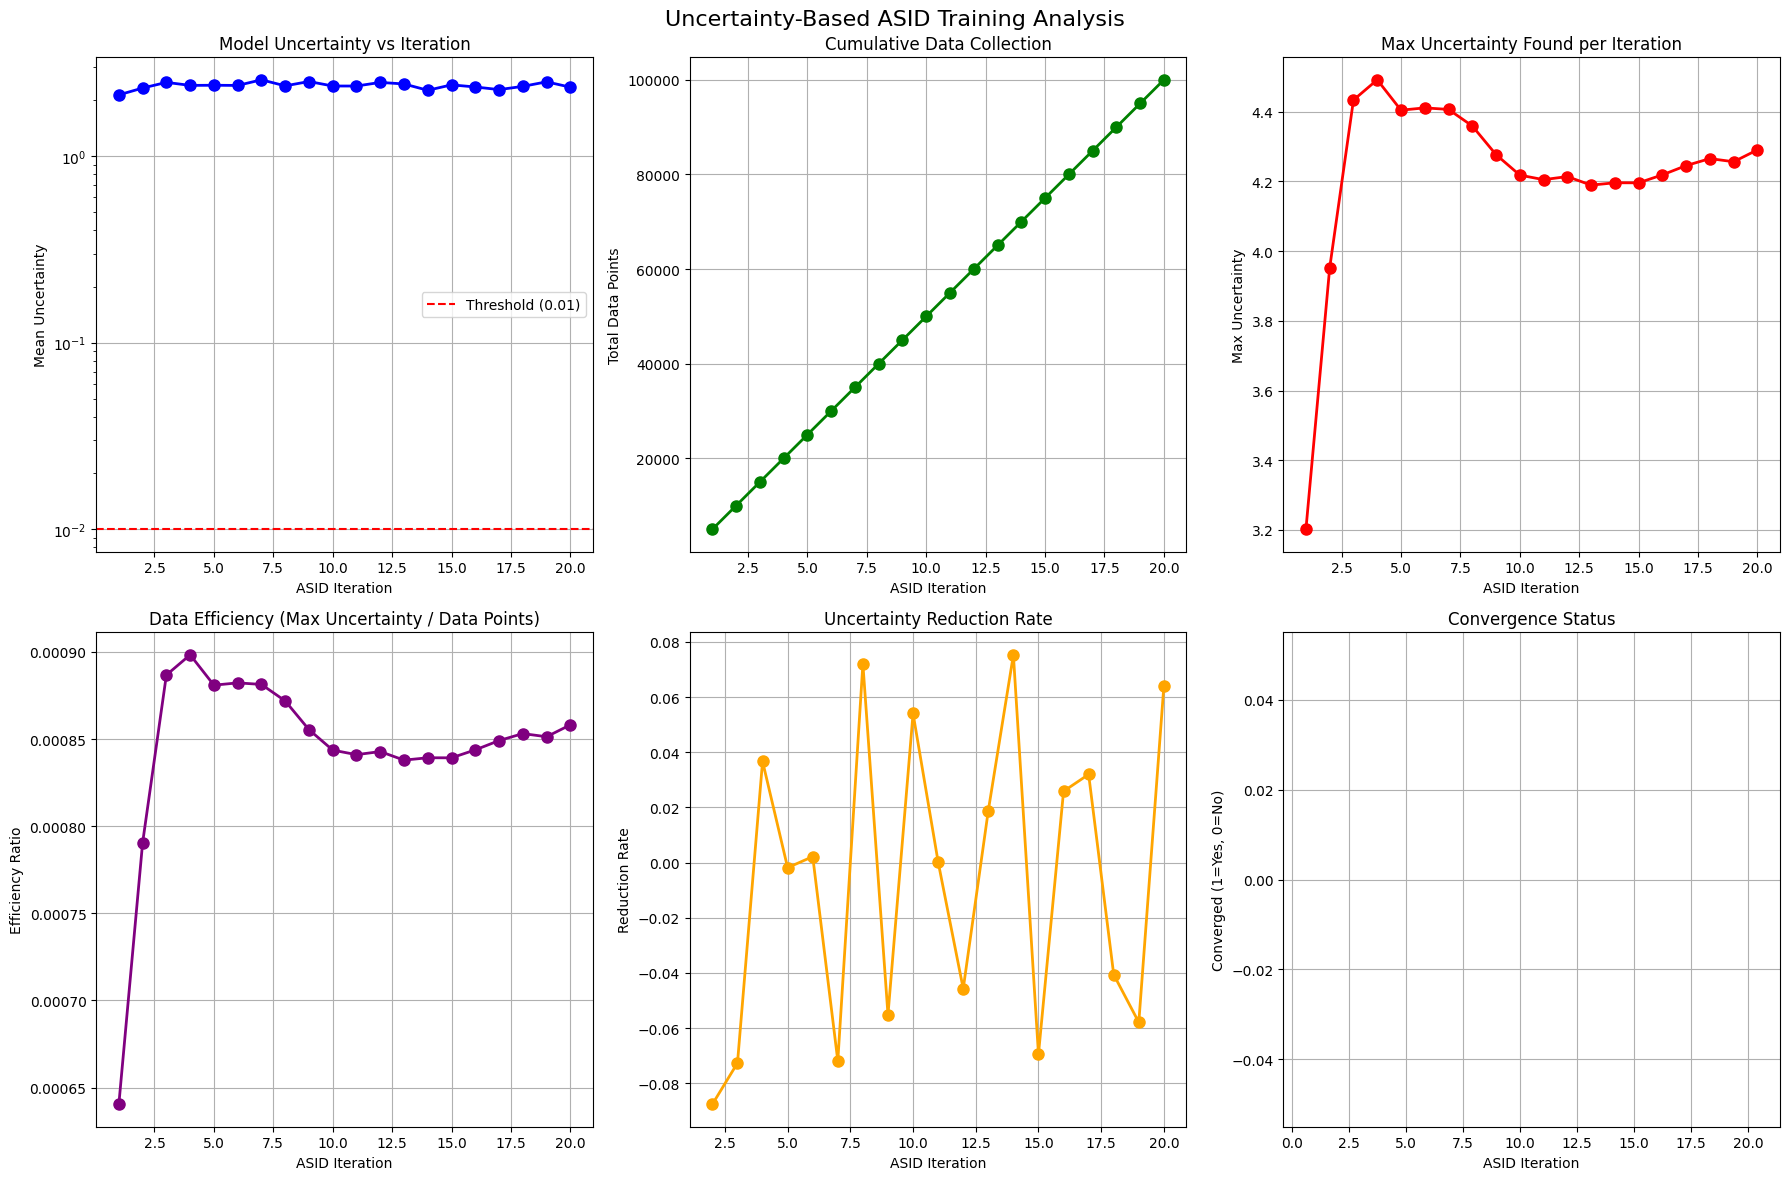


 Detailed Training Analysis:
Iter  Uncertainty  Data Points  Max Uncertainty Converged 
-----------------------------------------------------------------
1     2.129556     5000         3.201995        No        
2     2.316046     5000         3.952385        No        
3     2.484253     5000         4.433699        No        
4     2.393075     5000         4.491717        No        
5     2.397493     5000         4.404565        No        
6     2.392269     5000         4.411174        No        
7     2.564217     5000         4.406743        No        
8     2.379647     5000         4.359321        No        
9     2.510872     5000         4.276983        No        
10    2.375191     5000         4.218227        No        
11    2.374651     5000         4.205162        No        
12    2.483188     5000         4.214075        No        
13    2.436338     5000         4.189474        No        
14    2.252863     5000         4.196250        No        
15    2.409349     

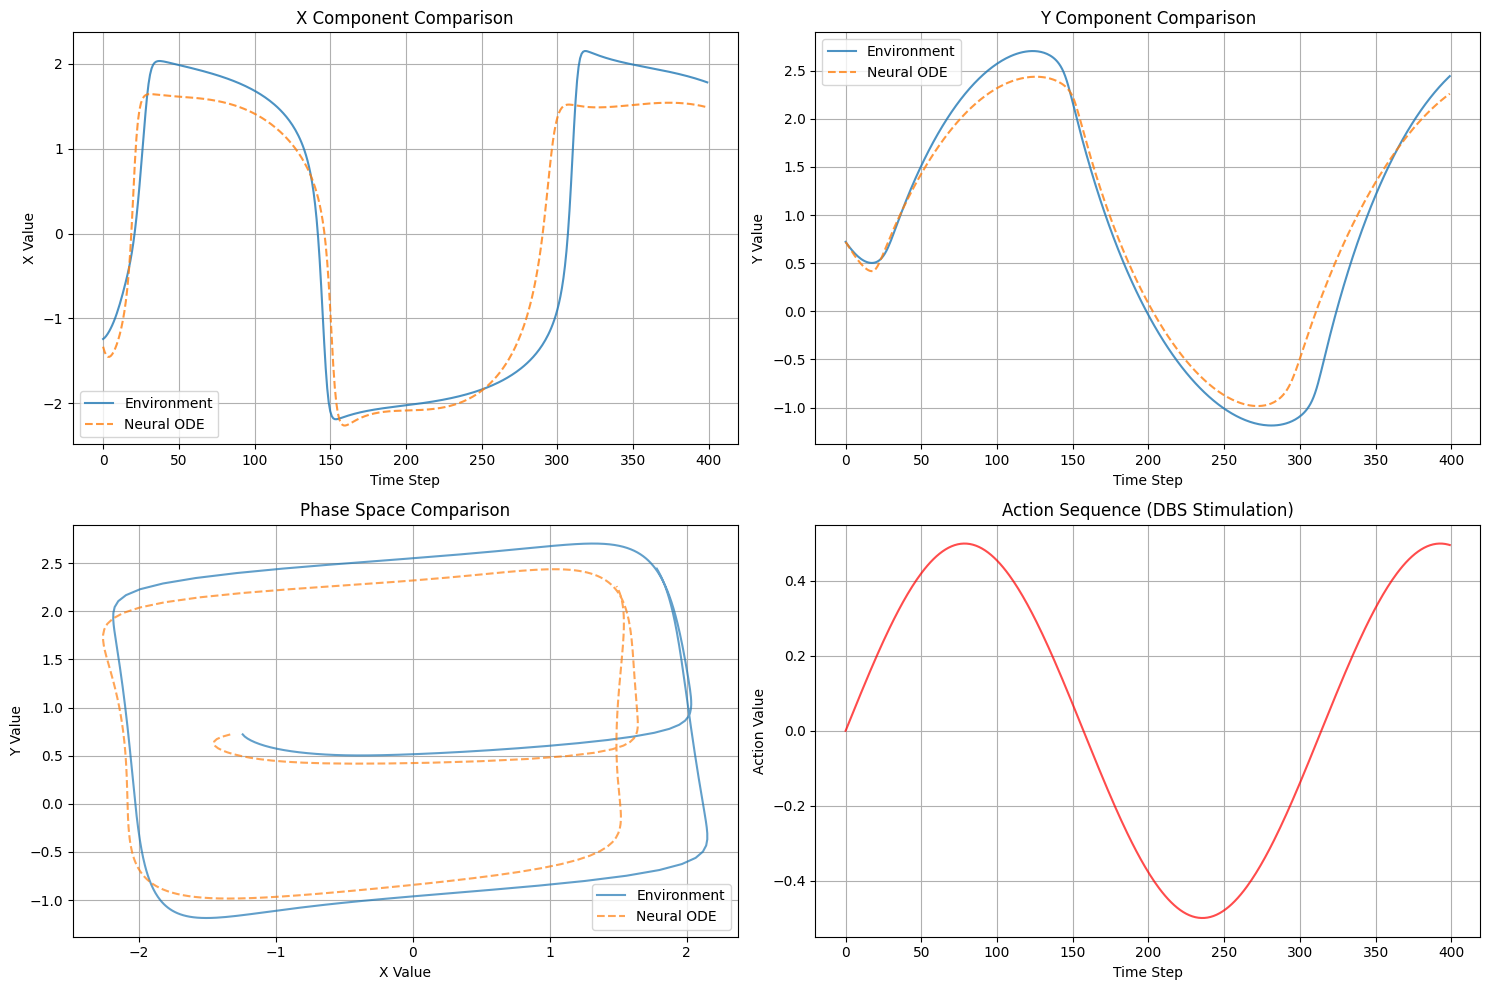

Prediction Accuracy Metrics:
  MSE X: 0.319197
  MSE Y: 0.064148
  Total MSE: 0.383345

Testing on random actions...


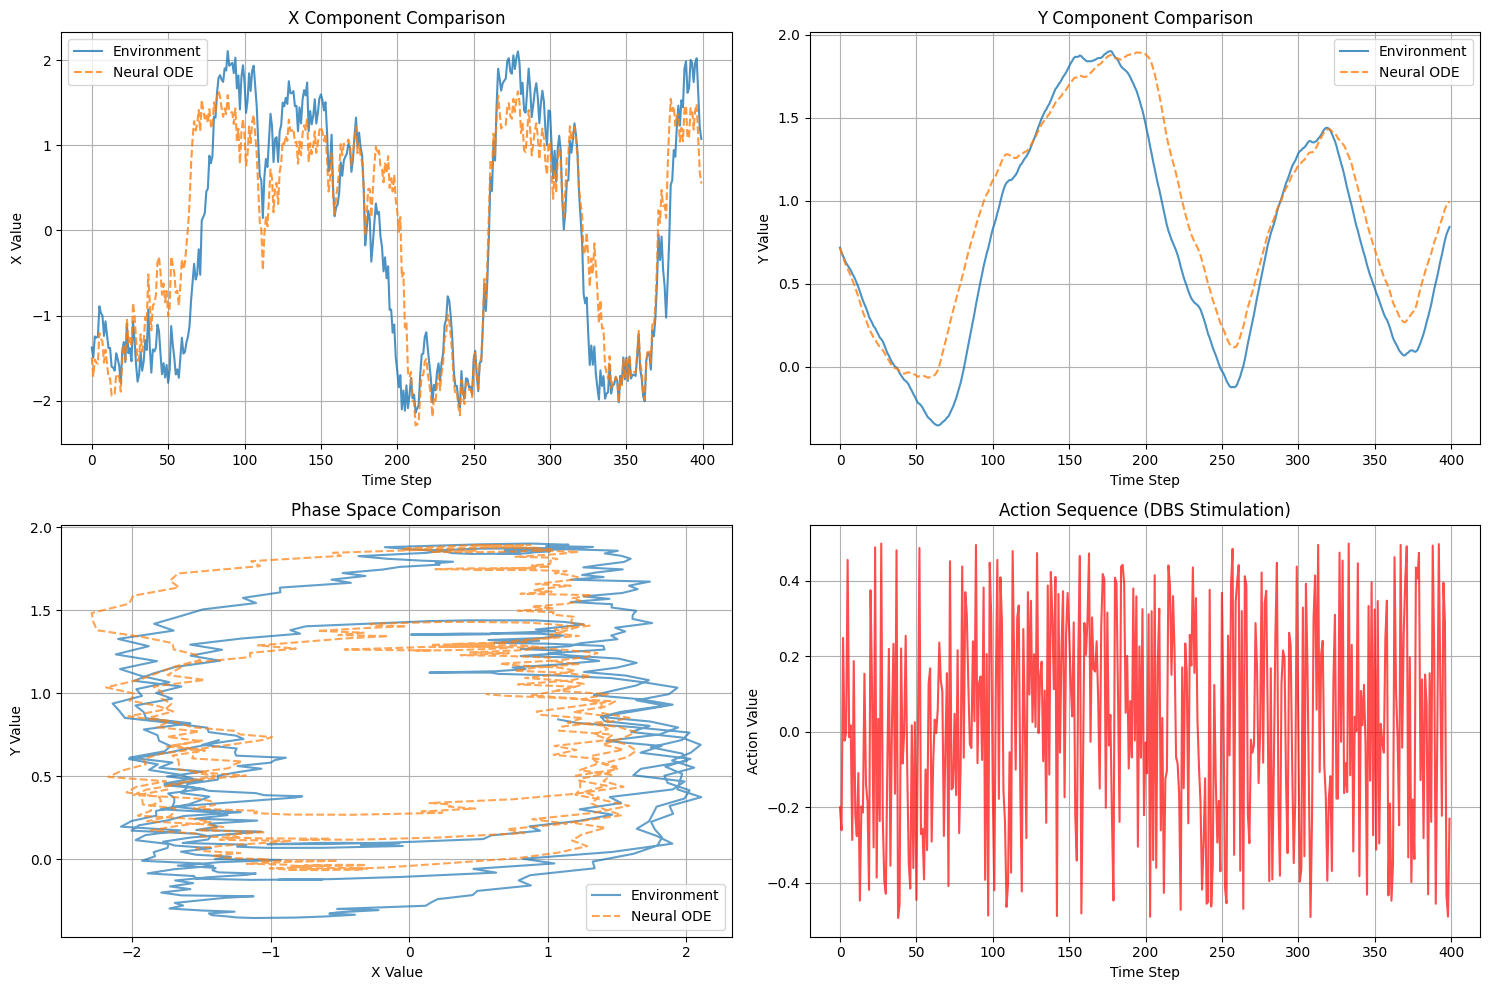

Prediction Accuracy Metrics:
  MSE X: 0.361117
  MSE Y: 0.065895
  Total MSE: 0.427012

Testing on zero actions...


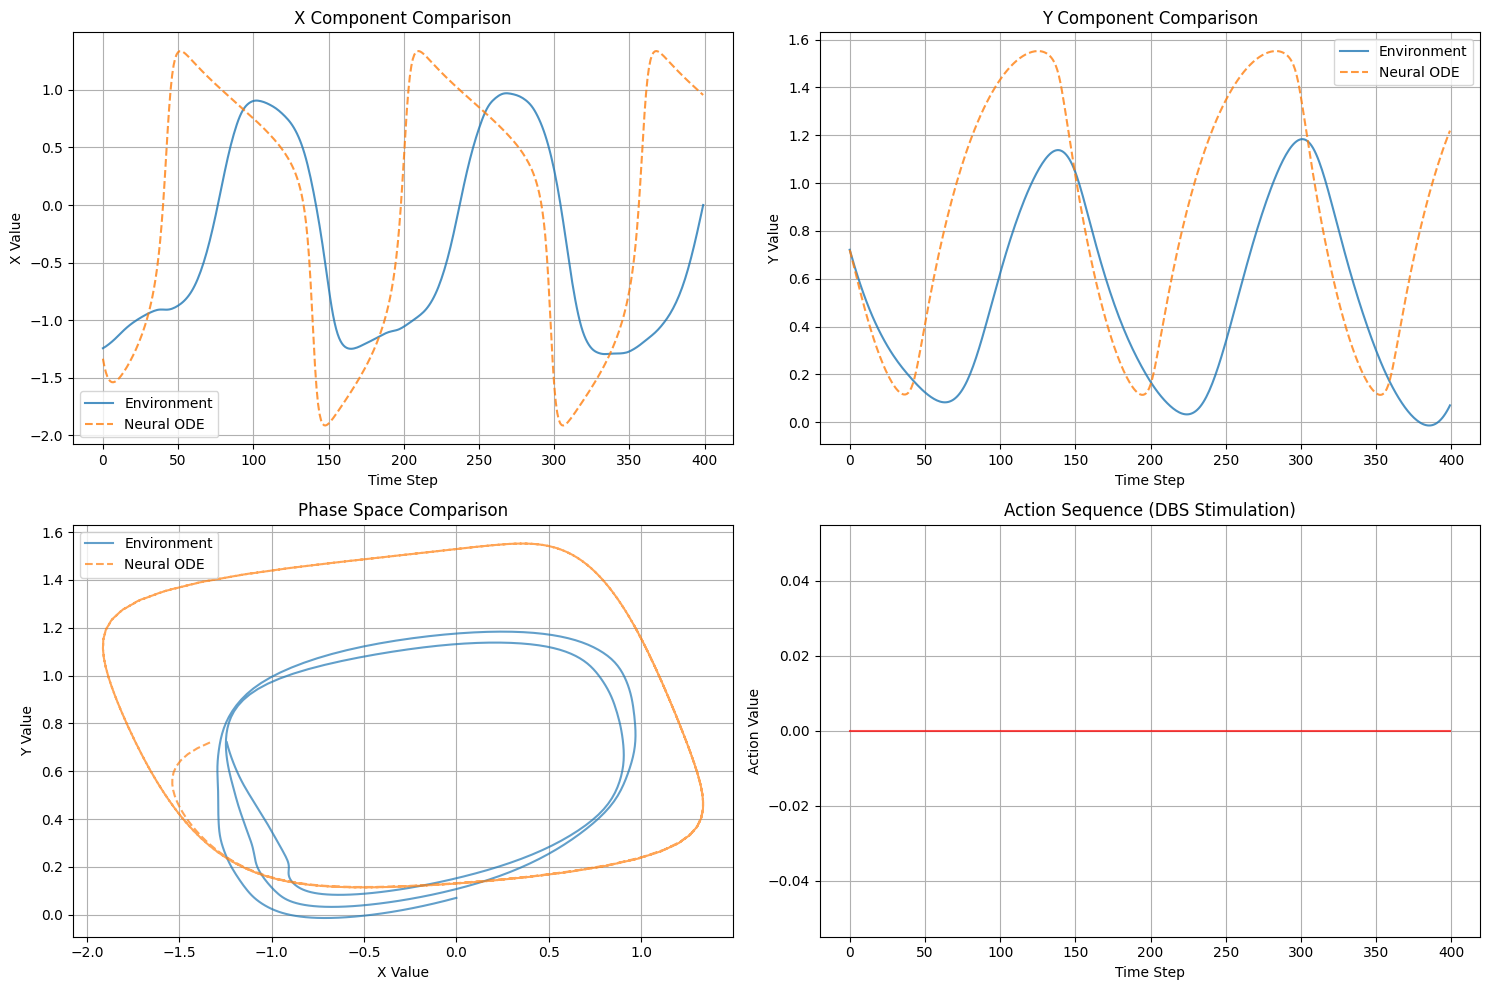

Prediction Accuracy Metrics:
  MSE X: 1.359453
  MSE Y: 0.336924
  Total MSE: 1.696377

Analyzing learned dynamics...


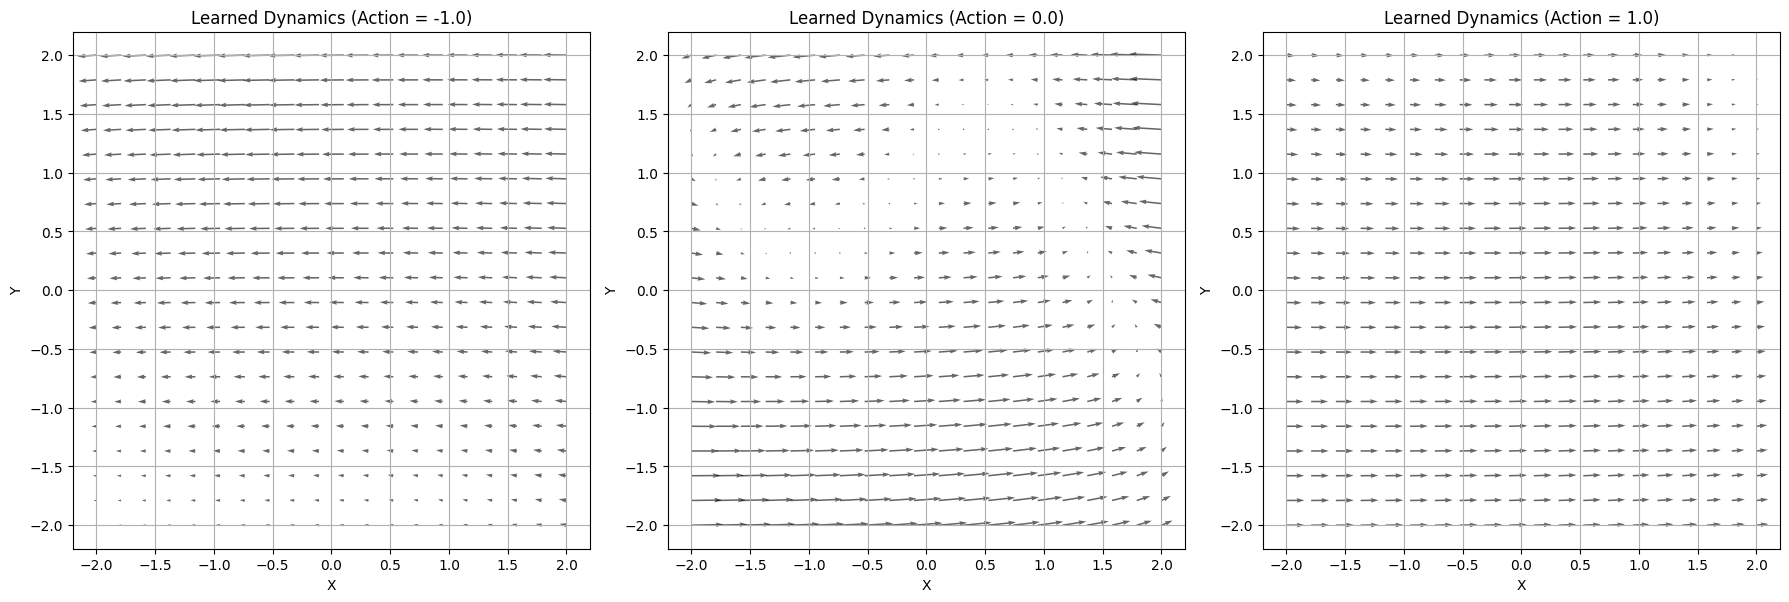


Analyzing uncertainty-based exploration efficiency...


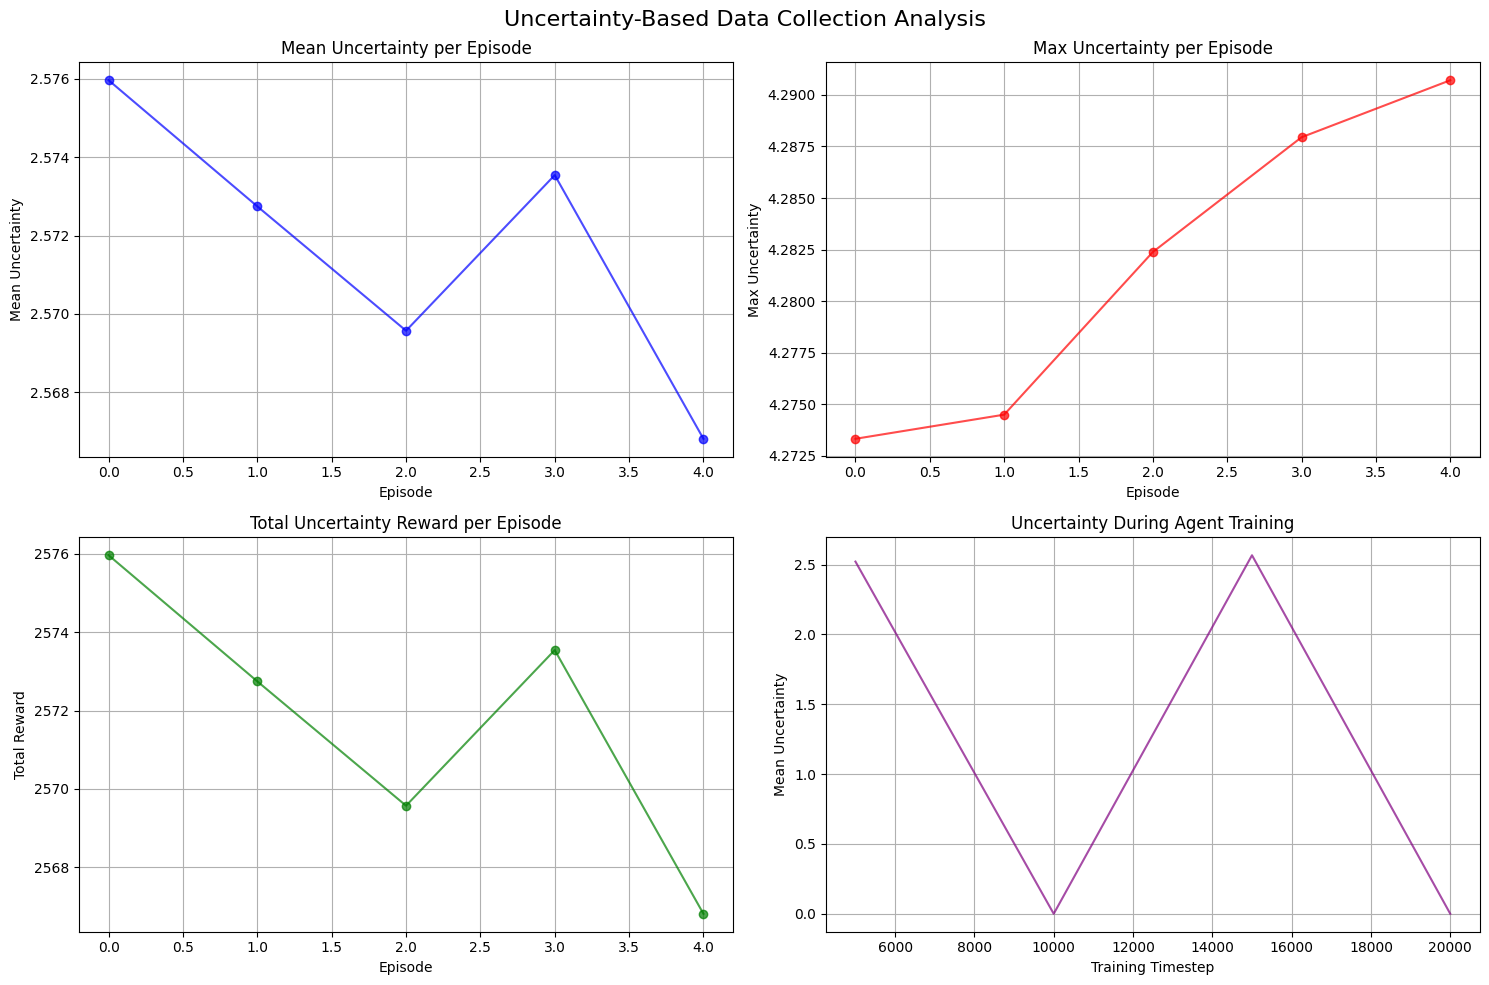


Uncertainty Collection Summary:
  Total Episodes: 5
  Mean Uncertainty (avg): 2.571727
  Mean Uncertainty (std): 0.003198
  Max Uncertainty (peak): 4.290715
  Total Reward (avg): 2571.726807
  Uncertainty Trend: -0.00175130 (slope per episode)
  ✓ Model is learning - uncertainty decreasing over time


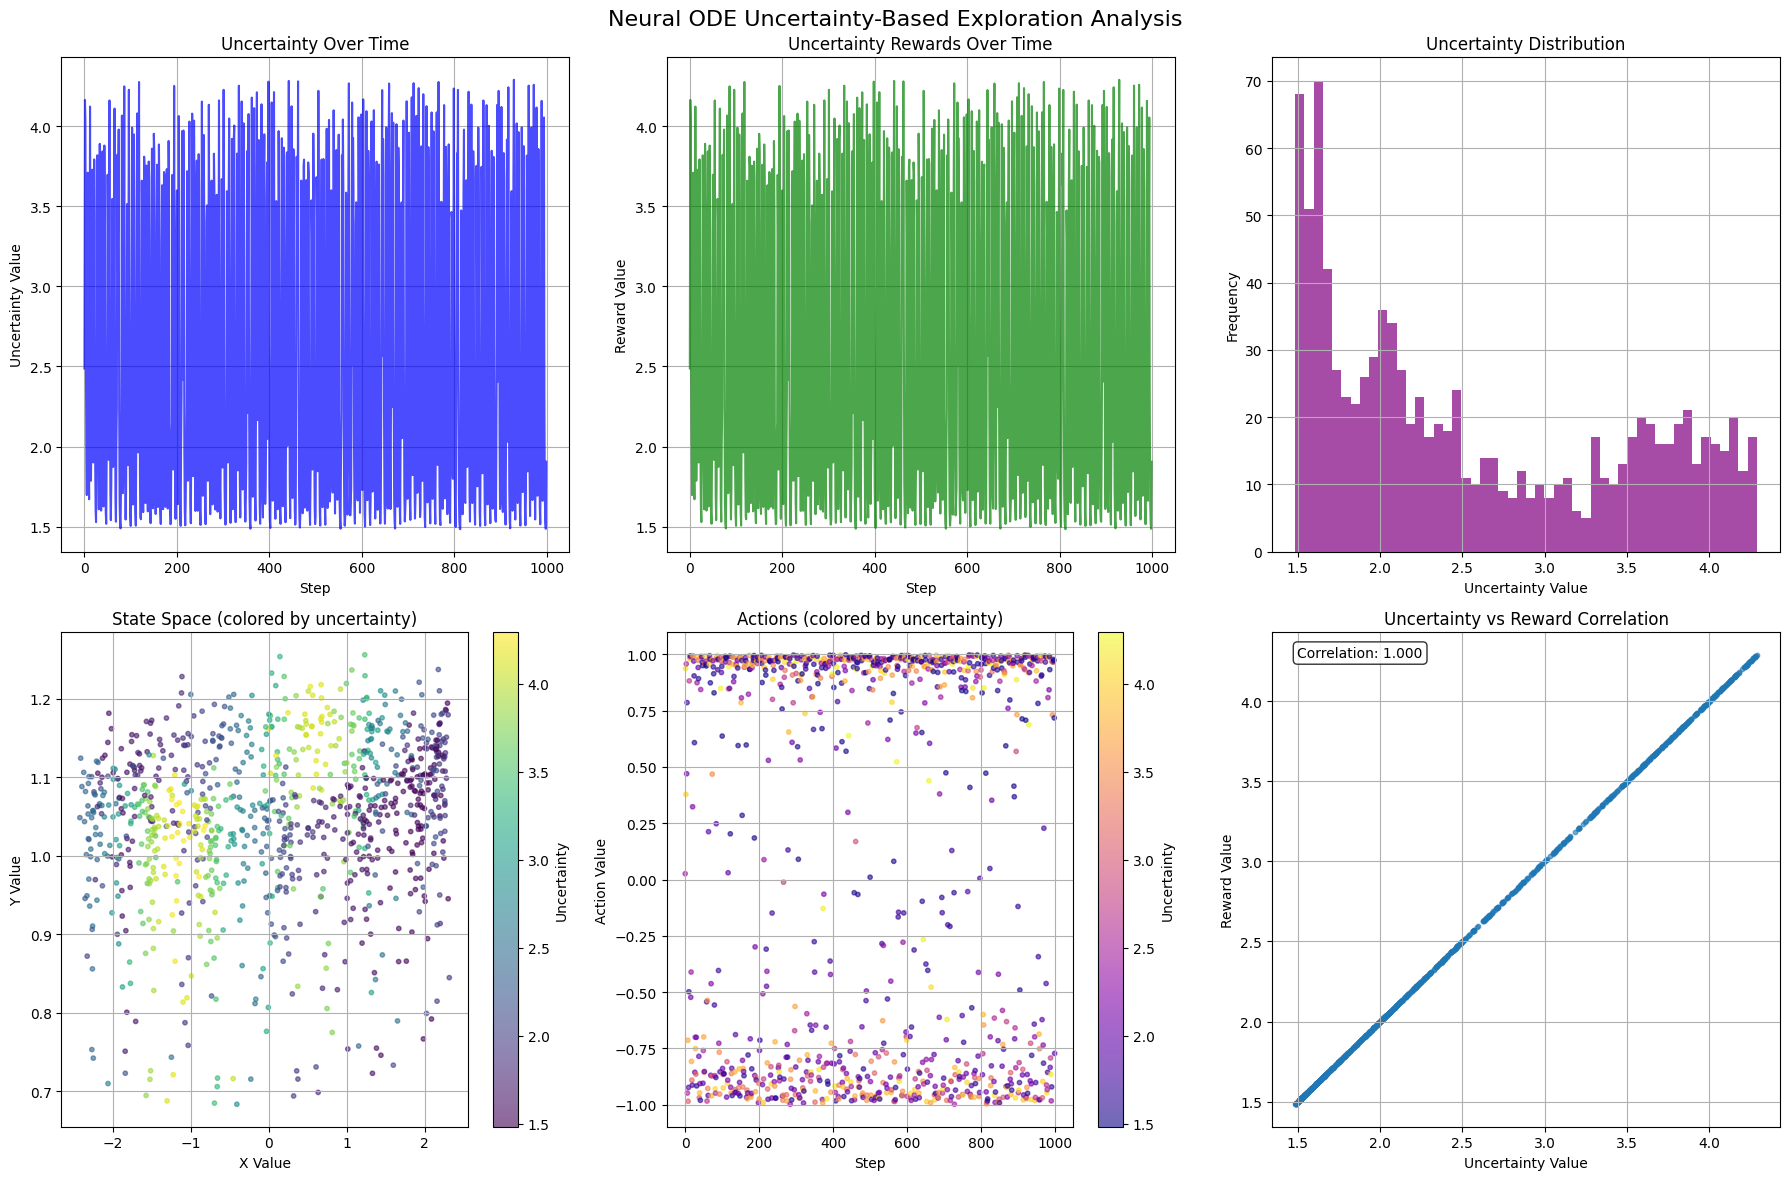


Uncertainty Exploration Statistics:
  Mean Uncertainty: 2.566810
  Std Uncertainty:  0.894136
  Max Uncertainty:  4.290715
  Mean Reward:      2.566810
  Total Steps:      1000

 Uncertainty-Based ASID System Identification Complete!
The agent successfully learned to seek high-uncertainty regions,
leading to efficient data collection for Neural ODE training!


In [ ]:
def run_uncertainty_based_asid_system_identification():
    """
    Main execution function for uncertainty-based ASID + Neural ODE system identification
    """
    print(" Uncertainty-Based ASID + Neural ODE System Identification")
    print("=" * 80)
    print("This approach seeks regions where the Neural ODE model is most uncertain,")
    print("leading to more informative data collection for system identification.")
    print("=" * 80)
    
    # Test different uncertainty methods
    uncertainty_methods = ['gradient']  # Can add 'ensemble', 'dropout'
    # uncertainty_methods = ['gradient']
    
    results = {}
    
    for method in uncertainty_methods:
        print(f"\n Testing Uncertainty Method: {method.upper()}")
        print("=" * 50)
        
        # Create trainer with specific uncertainty method
        asid_trainer = UncertaintyBasedASIDTrainer(
            env_id='oscillator-v0',
            uncertainty_threshold=0.01,  # Stop when uncertainty < 0.01
            uncertainty_method=method
        )
        
        # Run complete training
        final_model, final_trainer = asid_trainer.run_complete_uncertainty_asid(
            max_iterations=10
        )
        
        # Store results
        results[method] = {
            'model': final_model,
            'trainer': final_trainer,
            'asid_trainer': asid_trainer,
            'final_uncertainty': asid_trainer.iteration_history[-1]['mean_uncertainty'],
            'total_iterations': len(asid_trainer.iteration_history),
            'total_data_points': sum(r['data_points_collected'] for r in asid_trainer.iteration_history)
        }
        
        print(f"\n {method.upper()} method completed!")
        print(f"  Final uncertainty: {results[method]['final_uncertainty']:.6f}")
        print(f"  Total iterations: {results[method]['total_iterations']}")
        print(f"  Total data points: {results[method]['total_data_points']}")
    
    # Compare methods
    print(f"\n COMPARISON OF UNCERTAINTY METHODS")
    print("=" * 60)
    print(f"{'Method':<12} {'Final Uncertainty':<18} {'Iterations':<12} {'Data Points':<12}")
    print("-" * 60)
    
    for method, result in results.items():
        print(f"{method:<12} {result['final_uncertainty']:<18.6f} {result['total_iterations']:<12} {result['total_data_points']:<12}")
    
    # Find best method
    best_method = min(results.keys(), key=lambda m: results[m]['final_uncertainty'])
    print(f"\n Best performing method: {best_method.upper()}")
    
    # Final evaluation with best method
    print(f"\n Final Model Evaluation (using {best_method.upper()} method):")
    best_model = results[best_method]['model']
    best_trainer = results[best_method]['trainer']
    
    # Create evaluator and test
    evaluator = NeuralODEEvaluator(best_model, best_trainer)
    
    # Test on different scenarios
    test_scenarios = ['sinusoidal', 'random', 'zero']
    for scenario in test_scenarios:
        print(f"\nTesting on {scenario} actions...")
        predicted_states, actual_states = evaluator.compare_with_environment(
            num_steps=400, action_type=scenario
        )
    
    # Analyze learned dynamics
    print("\nAnalyzing learned dynamics...")
    evaluator.analyze_learned_dynamics()
    
    # Show active agent's uncertainty exploration
    best_asid_trainer = results[best_method]['asid_trainer']
    if best_asid_trainer.active_agent:
        print("\nAnalyzing uncertainty-based exploration efficiency...")
        best_asid_trainer.active_agent.analyze_collection_efficiency()
        
        # Show last episode's uncertainty exploration
        best_asid_trainer.active_agent.env.visualize_uncertainty_exploration()
    
    print(f"\n Uncertainty-Based ASID System Identification Complete!")
    print(f"The agent successfully learned to seek high-uncertainty regions,")
    print(f"leading to efficient data collection for Neural ODE training!")
    
    return results

# Execute the complete uncertainty-based ASID pipeline
if __name__ == "__main__":
    results = run_uncertainty_based_asid_system_identification()

## Model Evaluation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from stable_baselines3 import SAC
import gym
import torch

class PreTrainedRLvsRandomComparison:
    """
    Complete comparison between pre-trained RL agent and random sampling
    for Neural ODE system identification
    """
    
    def __init__(self, env_id='oscillator-v0', pretrained_model_path='sac_active_data_collection_agent.pth'):
        self.env_id = env_id
        self.pretrained_model_path = pretrained_model_path
        self.results = {}
        
    def load_pretrained_rl_agent(self):
        """Load your existing trained RL agent"""
        print("Loading pre-trained RL agent...")
        
        # Create environment
        env = gym.make(self.env_id)
        
        try:
            # Load the pre-trained SAC agent
            agent = SAC.load(self.pretrained_model_path, env=env)
            print(" Pre-trained RL agent loaded successfully!")
            return agent, env
        except Exception as e:
            print(f" Error loading agent: {e}")
            return None, env
    
    def collect_data_with_pretrained_agent(self, num_episodes=25, max_steps_per_episode=1000):
        """Collect data using your pre-trained RL agent"""
        print(f"\n Collecting data with pre-trained RL agent...")
        print(f"Episodes: {num_episodes}, Max steps per episode: {max_steps_per_episode}")
        
        agent, env = self.load_pretrained_rl_agent()
        if agent is None:
            return None
        
        collected_data = {
            'states': [],
            'actions': [],
            'next_states': [],
            'x_vals': [],
            'y_vals': [],
            'timestamps': [],
            'rewards': [],
            'collection_method': 'pretrained_rl'
        }
        
        episode_stats = []
        timestamp_counter = 0
        total_reward = 0
        
        for episode in range(num_episodes):
            obs = env.reset()
            if isinstance(obs, tuple):
                obs = obs[0]
            
            episode_reward = 0
            episode_steps = 0
            
            for step in range(max_steps_per_episode):
                # Use pre-trained agent to select action
                action, _ = agent.predict(obs, deterministic=False)
                
                # Store pre-action state
                pre_state = np.array([env.x_val, env.y_val])
                
                # Take action
                next_obs, reward, done, info = env.step(action)
                if isinstance(next_obs, tuple):
                    next_obs = next_obs[0]
                
                # Store post-action state
                post_state = np.array([env.x_val, env.y_val])
                
                # Collect data
                collected_data['states'].append(pre_state)
                collected_data['actions'].append(action.flatten())
                collected_data['next_states'].append(post_state)
                collected_data['x_vals'].append(pre_state[0])
                collected_data['y_vals'].append(pre_state[1])
                collected_data['timestamps'].append(timestamp_counter)
                collected_data['rewards'].append(reward)
                
                obs = next_obs
                timestamp_counter += 1
                episode_reward += reward
                episode_steps += 1
                
                if done:
                    break
            
            episode_stats.append({
                'episode': episode,
                'steps': episode_steps,
                'reward': episode_reward,
                'total_data_points': len(collected_data['states'])
            })
            
            total_reward += episode_reward
            
            if episode % 5 == 0:
                print(f"Episode {episode}: Steps={episode_steps}, "
                      f"Reward={episode_reward:.2f}, Total data={len(collected_data['states'])}")
        
        env.close()
        
        # Convert to numpy arrays
        for key in ['states', 'actions', 'next_states']:
            collected_data[key] = np.array(collected_data[key])
        
        print(f" Pre-trained RL data collection complete!")
        print(f"   Total data points: {len(collected_data['states'])}")
        print(f"   Average reward per episode: {total_reward / num_episodes:.2f}")
        print(f"   Average steps per episode: {np.mean([ep['steps'] for ep in episode_stats]):.1f}")
        
        return collected_data, episode_stats
    
    def collect_data_with_random_sampling(self, num_episodes=25, max_steps_per_episode=1000):
        """Collect data using random sampling strategy"""
        print(f"\n Collecting data with random sampling...")
        print(f"Episodes: {num_episodes}, Max steps per episode: {max_steps_per_episode}")
        
        env = gym.make(self.env_id)
        
        collected_data = {
            'states': [],
            'actions': [],
            'next_states': [],
            'x_vals': [],
            'y_vals': [],
            'timestamps': [],
            'rewards': [],
            'collection_method': 'random'
        }
        
        episode_stats = []
        timestamp_counter = 0
        total_reward = 0
        
        for episode in range(num_episodes):
            obs = env.reset()
            if isinstance(obs, tuple):
                obs = obs[0]
            
            episode_reward = 0
            episode_steps = 0
            
            for step in range(max_steps_per_episode):
                # Random action
                action = env.action_space.sample()
                
                # Store pre-action state
                pre_state = np.array([env.x_val, env.y_val])
                
                # Take action
                next_obs, reward, done, info = env.step(action)
                if isinstance(next_obs, tuple):
                    next_obs = next_obs[0]
                
                # Store post-action state
                post_state = np.array([env.x_val, env.y_val])
                
                # Collect data
                collected_data['states'].append(pre_state)
                collected_data['actions'].append(action.flatten())
                collected_data['next_states'].append(post_state)
                collected_data['x_vals'].append(pre_state[0])
                collected_data['y_vals'].append(pre_state[1])
                collected_data['timestamps'].append(timestamp_counter)
                collected_data['rewards'].append(reward)
                
                obs = next_obs
                timestamp_counter += 1
                episode_reward += reward
                episode_steps += 1
                
                if done:
                    break
            
            episode_stats.append({
                'episode': episode,
                'steps': episode_steps,
                'reward': episode_reward,
                'total_data_points': len(collected_data['states'])
            })
            
            total_reward += episode_reward
            
            if episode % 5 == 0:
                print(f"Episode {episode}: Steps={episode_steps}, "
                      f"Reward={episode_reward:.2f}, Total data={len(collected_data['states'])}")
        
        env.close()
        
        # Convert to numpy arrays
        for key in ['states', 'actions', 'next_states']:
            collected_data[key] = np.array(collected_data[key])
        
        print(f" Random sampling data collection complete!")
        print(f"   Total data points: {len(collected_data['states'])}")
        print(f"   Average reward per episode: {total_reward / num_episodes:.2f}")
        print(f"   Average steps per episode: {np.mean([ep['steps'] for ep in episode_stats]):.1f}")
        
        return collected_data, episode_stats
    
    def train_neural_ode_on_data(self, data, method_name, epochs=50):
        """Train Neural ODE model on collected data"""
        print(f"\n Training Neural ODE on {method_name} data...")
        
        # Create Neural ODE model
        model = BrainOscillatorNeuralODE(state_dim=2, hidden_dim=128, action_dim=1)
        trainer = NeuralODETrainer(model, learning_rate=1e-3)
        
        # Prepare training data
        train_loader, val_loader = trainer.prepare_data(
            data, sequence_length=25, stride=5
        )
        
        # Train model
        trainer.train(train_loader, val_loader, epochs=epochs)
        
        final_train_loss = trainer.train_losses[-1] if trainer.train_losses else float('inf')
        final_val_loss = trainer.val_losses[-1] if trainer.val_losses else float('inf')
        
        print(f" {method_name} Neural ODE training complete!")
        print(f"   Final training loss: {final_train_loss:.6f}")
        print(f"   Final validation loss: {final_val_loss:.6f}")
        
        return model, trainer
    
    def evaluate_neural_ode_model(self, model, trainer, method_name):
        """Evaluate Neural ODE model on different test scenarios"""
        print(f"\n Evaluating {method_name} Neural ODE model...")
        
        evaluator = NeuralODEEvaluator(model, trainer)
        test_results = {}
        
        test_scenarios = ['sinusoidal', 'random', 'zero', 'step']
        
        for scenario in test_scenarios:
            print(f"   Testing on {scenario} actions...")
            
            try:
                predicted_states, actual_states = evaluator.compare_with_environment(
                    num_steps=400, action_type=scenario
                )
                
                # Calculate metrics
                mse = np.mean((predicted_states - actual_states) ** 2)
                mae = np.mean(np.abs(predicted_states - actual_states))
                rmse = np.sqrt(mse)
                
                # Per-dimension metrics
                mse_x = np.mean((predicted_states[:, 0] - actual_states[:, 0]) ** 2)
                mse_y = np.mean((predicted_states[:, 1] - actual_states[:, 1]) ** 2)
                
                test_results[scenario] = {
                    'mse': mse,
                    'mae': mae,
                    'rmse': rmse,
                    'mse_x': mse_x,
                    'mse_y': mse_y,
                    'predicted_states': predicted_states,
                    'actual_states': actual_states
                }
                
                print(f"     MSE: {mse:.6f}, MAE: {mae:.6f}, RMSE: {rmse:.6f}")
                
            except Exception as e:
                print(f"     Error in {scenario} test: {e}")
                test_results[scenario] = {
                    'mse': float('inf'),
                    'mae': float('inf'),
                    'rmse': float('inf'),
                    'mse_x': float('inf'),
                    'mse_y': float('inf'),
                    'predicted_states': None,
                    'actual_states': None
                }
        
        return test_results
    
    def analyze_data_quality(self, data, method_name):
        """Analyze the quality and diversity of collected data"""
        print(f"\n Analyzing {method_name} data quality...")
        
        states = data['states']
        actions = data['actions']
        
        # State space coverage
        x_range = np.max(states[:, 0]) - np.min(states[:, 0])
        y_range = np.max(states[:, 1]) - np.min(states[:, 1])
        x_std = np.std(states[:, 0])
        y_std = np.std(states[:, 1])
        
        # Action diversity
        action_std = np.std(actions)
        action_range = np.max(actions) - np.min(actions)
        
        # Temporal diversity
        state_changes = np.diff(states, axis=0)
        avg_state_change = np.mean(np.linalg.norm(state_changes, axis=1))
        
        analysis = {
            'state_coverage': {
                'x_range': x_range,
                'y_range': y_range,
                'x_std': x_std,
                'y_std': y_std,
                'total_range': x_range + y_range
            },
            'action_diversity': {
                'std': action_std,
                'range': action_range
            },
            'temporal_diversity': {
                'avg_state_change': avg_state_change
            },
            'data_points': len(states)
        }
        
        print(f"   State coverage: X-range={x_range:.3f}, Y-range={y_range:.3f}")
        print(f"   State diversity: X-std={x_std:.3f}, Y-std={y_std:.3f}")
        print(f"   Action diversity: std={action_std:.3f}, range={action_range:.3f}")
        print(f"   Temporal diversity: avg_change={avg_state_change:.3f}")
        
        return analysis
    
    def run_complete_comparison(self, num_episodes=25, max_steps_per_episode=1000, epochs=50):
        """Run the complete comparison between pre-trained RL and random sampling"""
        print(" NEURAL ODE SYSTEM ID COMPARISON STUDY")
        print("=" * 80)
        print("Pre-trained RL Agent vs Random Sampling for Neural ODE Training")
        print("=" * 80)
        
        # Step 1: Data Collection
        print("\n PHASE 1: DATA COLLECTION")
        print("-" * 40)
        
        # Collect data with pre-trained RL agent
        rl_data, rl_episodes = self.collect_data_with_pretrained_agent(
            num_episodes=num_episodes, max_steps_per_episode=max_steps_per_episode
        )
        
        if rl_data is None:
            print(" Failed to collect RL data. Exiting comparison.")
            return None
        
        # Collect data with random sampling
        random_data, random_episodes = self.collect_data_with_random_sampling(
            num_episodes=num_episodes, max_steps_per_episode=max_steps_per_episode
        )
        
        # Step 2: Data Analysis
        print("\n PHASE 2: DATA QUALITY ANALYSIS")
        print("-" * 40)
        
        rl_analysis = self.analyze_data_quality(rl_data, "Pre-trained RL")
        random_analysis = self.analyze_data_quality(random_data, "Random Sampling")
        
        # Step 3: Neural ODE Training
        print("\n PHASE 3: NEURAL ODE TRAINING")
        print("-" * 40)
        
        # Train Neural ODE on RL data
        rl_model, rl_trainer = self.train_neural_ode_on_data(rl_data, "Pre-trained RL", epochs)
        
        # Train Neural ODE on random data
        random_model, random_trainer = self.train_neural_ode_on_data(random_data, "Random Sampling", epochs)
        
        # Step 4: Model Evaluation
        print("\n PHASE 4: MODEL EVALUATION")
        print("-" * 40)
        
        # Evaluate RL-trained model
        rl_test_results = self.evaluate_neural_ode_model(rl_model, rl_trainer, "Pre-trained RL")
        
        # Evaluate random-trained model
        random_test_results = self.evaluate_neural_ode_model(random_model, random_trainer, "Random Sampling")
        
        # Step 5: Store Results
        self.results = {
            'rl': {
                'data': rl_data,
                'episodes': rl_episodes,
                'model': rl_model,
                'trainer': rl_trainer,
                'test_results': rl_test_results,
                'data_analysis': rl_analysis,
                'final_train_loss': rl_trainer.train_losses[-1] if rl_trainer.train_losses else float('inf'),
                'final_val_loss': rl_trainer.val_losses[-1] if rl_trainer.val_losses else float('inf')
            },
            'random': {
                'data': random_data,
                'episodes': random_episodes,
                'model': random_model,
                'trainer': random_trainer,
                'test_results': random_test_results,
                'data_analysis': random_analysis,
                'final_train_loss': random_trainer.train_losses[-1] if random_trainer.train_losses else float('inf'),
                'final_val_loss': random_trainer.val_losses[-1] if random_trainer.val_losses else float('inf')
            }
        }
        
        # Step 6: Comprehensive Analysis
        self.generate_comprehensive_analysis()
        
        return self.results
    
    def generate_comprehensive_analysis(self):
        """Generate comprehensive comparison analysis"""
        print("\n PHASE 5: COMPREHENSIVE ANALYSIS")
        print("=" * 80)
        
        rl_results = self.results['rl']
        random_results = self.results['random']
        
        # Create comparison visualization
        fig, axes = plt.subplots(3, 4, figsize=(20, 15))
        fig.suptitle('Neural ODE System ID: Pre-trained RL vs Random Sampling', fontsize=16)
        
        # Plot 1: Training Loss Comparison
        methods = ['Pre-trained RL', 'Random Sampling']
        train_losses = [rl_results['final_train_loss'], random_results['final_train_loss']]
        val_losses = [rl_results['final_val_loss'], random_results['final_val_loss']]
        
        x = np.arange(len(methods))
        width = 0.35
        
        axes[0, 0].bar(x - width/2, train_losses, width, label='Training Loss', alpha=0.7)
        axes[0, 0].bar(x + width/2, val_losses, width, label='Validation Loss', alpha=0.7)
        axes[0, 0].set_title('Final Training Losses')
        axes[0, 0].set_ylabel('Loss')
        axes[0, 0].set_xticks(x)
        axes[0, 0].set_xticklabels(methods)
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Plot 2: Test MSE Comparison
        test_scenarios = ['sinusoidal', 'random', 'zero', 'step']
        rl_mses = [rl_results['test_results'][scenario]['mse'] for scenario in test_scenarios]
        random_mses = [random_results['test_results'][scenario]['mse'] for scenario in test_scenarios]
        
        x = np.arange(len(test_scenarios))
        axes[0, 1].bar(x - width/2, rl_mses, width, label='Pre-trained RL', alpha=0.7)
        axes[0, 1].bar(x + width/2, random_mses, width, label='Random Sampling', alpha=0.7)
        axes[0, 1].set_title('Test MSE by Scenario')
        axes[0, 1].set_ylabel('MSE')
        axes[0, 1].set_xticks(x)
        axes[0, 1].set_xticklabels(test_scenarios)
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Plot 3: Data Collection Efficiency
        data_points = [rl_results['data_analysis']['data_points'], 
                      random_results['data_analysis']['data_points']]
        
        axes[0, 2].bar(methods, data_points, color=['lightcoral', 'skyblue'], alpha=0.7)
        axes[0, 2].set_title('Data Points Collected')
        axes[0, 2].set_ylabel('Number of Data Points')
        axes[0, 2].grid(True, alpha=0.3)
        
        # Plot 4: State Space Coverage
        rl_coverage = rl_results['data_analysis']['state_coverage']['total_range']
        random_coverage = random_results['data_analysis']['state_coverage']['total_range']
        
        axes[0, 3].bar(methods, [rl_coverage, random_coverage], 
                      color=['lightcoral', 'skyblue'], alpha=0.7)
        axes[0, 3].set_title('State Space Coverage')
        axes[0, 3].set_ylabel('Total Range (X + Y)')
        axes[0, 3].grid(True, alpha=0.3)
        
        # Plot 5-6: State Space Visualization
        rl_states = rl_results['data']['states']
        random_states = random_results['data']['states']
        
        axes[1, 0].scatter(rl_states[:, 0], rl_states[:, 1], alpha=0.3, s=1, c='red')
        axes[1, 0].set_title('Pre-trained RL State Coverage')
        axes[1, 0].set_xlabel('X Value')
        axes[1, 0].set_ylabel('Y Value')
        axes[1, 0].grid(True, alpha=0.3)
        
        axes[1, 1].scatter(random_states[:, 0], random_states[:, 1], alpha=0.3, s=1, c='blue')
        axes[1, 1].set_title('Random Sampling State Coverage')
        axes[1, 1].set_xlabel('X Value')
        axes[1, 1].set_ylabel('Y Value')
        axes[1, 1].grid(True, alpha=0.3)
        
        # Plot 7: Action Distribution
        rl_actions = rl_results['data']['actions'].flatten()
        random_actions = random_results['data']['actions'].flatten()
        
        axes[1, 2].hist(rl_actions, bins=30, alpha=0.7, label='Pre-trained RL', density=True)
        axes[1, 2].hist(random_actions, bins=30, alpha=0.7, label='Random Sampling', density=True)
        axes[1, 2].set_title('Action Distribution')
        axes[1, 2].set_xlabel('Action Value')
        axes[1, 2].set_ylabel('Density')
        axes[1, 2].legend()
        axes[1, 2].grid(True, alpha=0.3)
        
        # Plot 8: Data Efficiency Ratio
        rl_efficiency = rl_results['final_val_loss'] / rl_results['data_analysis']['data_points'] * 10000
        random_efficiency = random_results['final_val_loss'] / random_results['data_analysis']['data_points'] * 10000
        
        axes[1, 3].bar(methods, [rl_efficiency, random_efficiency], 
                      color=['lightcoral', 'skyblue'], alpha=0.7)
        axes[1, 3].set_title('Data Efficiency\n(Val Loss per 10k Points)')
        axes[1, 3].set_ylabel('Efficiency Ratio')
        axes[1, 3].grid(True, alpha=0.3)
        
        # Plot 9-12: Sample Predictions
        for i, scenario in enumerate(['sinusoidal', 'random']):
            if scenario in rl_results['test_results'] and rl_results['test_results'][scenario]['predicted_states'] is not None:
                rl_pred = rl_results['test_results'][scenario]['predicted_states']
                rl_actual = rl_results['test_results'][scenario]['actual_states']
                random_pred = random_results['test_results'][scenario]['predicted_states']
                
                time_steps = range(min(len(rl_pred), 200))
                
                axes[2, i*2].plot(time_steps, rl_actual[:len(time_steps), 0], 'k-', 
                                label='Actual', linewidth=2)
                axes[2, i*2].plot(time_steps, rl_pred[:len(time_steps), 0], 'r--', 
                                label='RL Pred', alpha=0.7)
                axes[2, i*2].set_title(f'{scenario.title()} - RL Model (X dim)')
                axes[2, i*2].set_xlabel('Time Steps')
                axes[2, i*2].set_ylabel('X Value')
                axes[2, i*2].legend()
                axes[2, i*2].grid(True, alpha=0.3)
                
                axes[2, i*2+1].plot(time_steps, rl_actual[:len(time_steps), 0], 'k-', 
                                  label='Actual', linewidth=2)
                axes[2, i*2+1].plot(time_steps, random_pred[:len(time_steps), 0], 'b--', 
                                  label='Random Pred', alpha=0.7)
                axes[2, i*2+1].set_title(f'{scenario.title()} - Random Model (X dim)')
                axes[2, i*2+1].set_xlabel('Time Steps')
                axes[2, i*2+1].set_ylabel('X Value')
                axes[2, i*2+1].legend()
                axes[2, i*2+1].grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        # Print detailed comparison
        self.print_detailed_comparison()
    
    def print_detailed_comparison(self):
        """Print detailed numerical comparison"""
        print("\n DETAILED NUMERICAL COMPARISON")
        print("=" * 80)
        
        rl_results = self.results['rl']
        random_results = self.results['random']
        
        print(f"\n1. DATA COLLECTION COMPARISON:")
        print(f"   Pre-trained RL Agent:")
        print(f"     - Total data points: {rl_results['data_analysis']['data_points']}")
        print(f"     - State coverage (X-range): {rl_results['data_analysis']['state_coverage']['x_range']:.3f}")
        print(f"     - State coverage (Y-range): {rl_results['data_analysis']['state_coverage']['y_range']:.3f}")
        print(f"     - Action diversity (std): {rl_results['data_analysis']['action_diversity']['std']:.3f}")
        print(f"     - Temporal diversity: {rl_results['data_analysis']['temporal_diversity']['avg_state_change']:.3f}")
        
        print(f"\n   Random Sampling:")
        print(f"     - Total data points: {random_results['data_analysis']['data_points']}")
        print(f"     - State coverage (X-range): {random_results['data_analysis']['state_coverage']['x_range']:.3f}")
        print(f"     - State coverage (Y-range): {random_results['data_analysis']['state_coverage']['y_range']:.3f}")
        print(f"     - Action diversity (std): {random_results['data_analysis']['action_diversity']['std']:.3f}")
        print(f"     - Temporal diversity: {random_results['data_analysis']['temporal_diversity']['avg_state_change']:.3f}")
        
        print(f"\n2. NEURAL ODE TRAINING COMPARISON:")
        print(f"   Pre-trained RL Agent:")
        print(f"     - Final training loss: {rl_results['final_train_loss']:.6f}")
        print(f"     - Final validation loss: {rl_results['final_val_loss']:.6f}")
        
        print(f"\n   Random Sampling:")
        print(f"     - Final training loss: {random_results['final_train_loss']:.6f}")
        print(f"     - Final validation loss: {random_results['final_val_loss']:.6f}")
        
        # Training loss improvement
        train_improvement = (random_results['final_train_loss'] - rl_results['final_train_loss']) / random_results['final_train_loss'] * 100
        val_improvement = (random_results['final_val_loss'] - rl_results['final_val_loss']) / random_results['final_val_loss'] * 100
        
        print(f"\n   TRAINING IMPROVEMENT:")
        print(f"     - Training loss improvement: {train_improvement:+.1f}%")
        print(f"     - Validation loss improvement: {val_improvement:+.1f}%")
        
        print(f"\n3. TEST PERFORMANCE COMPARISON:")
        test_scenarios = ['sinusoidal', 'random', 'zero', 'step']
        
        rl_wins = 0
        total_scenarios = 0
        
        for scenario in test_scenarios:
            if scenario in rl_results['test_results'] and scenario in random_results['test_results']:
                rl_mse = rl_results['test_results'][scenario]['mse']
                random_mse = random_results['test_results'][scenario]['mse']
                
                if rl_mse != float('inf') and random_mse != float('inf'):
                    improvement = (random_mse - rl_mse) / random_mse * 100
                    
                    print(f"   {scenario.title()} actions:")
                    print(f"     - Pre-trained RL MSE: {rl_mse:.6f}")
                    print(f"     - Random sampling MSE: {random_mse:.6f}")
                    print(f"     - Improvement: {improvement:+.1f}%")
                    
                    if rl_mse < random_mse:
                        rl_wins += 1
                    total_scenarios += 1
        
        print(f"\n4. DATA EFFICIENCY ANALYSIS:")
        rl_efficiency = rl_results['final_val_loss'] / rl_results['data_analysis']['data_points'] * 10000
        random_efficiency = random_results['final_val_loss'] / random_results['data_analysis']['data_points'] * 10000
        efficiency_improvement = (random_efficiency - rl_efficiency) / random_efficiency * 100
        
        print(f"   Pre-trained RL efficiency: {rl_efficiency:.4f} (val loss per 10k points)")
        print(f"   Random sampling efficiency: {random_efficiency:.4f} (val loss per 10k points)")
        print(f"   Efficiency improvement: {efficiency_improvement:+.1f}%")
        
        print(f"\n5. OVERALL ASSESSMENT:")
        print(f"   Pre-trained RL wins: {rl_wins}/{total_scenarios} test scenarios")
        
        # Final verdict
        if rl_wins > total_scenarios / 2:
            print(f"    PRE-TRAINED RL AGENT IS SUPERIOR!")
            print(f"   The pre-trained RL agent collected more informative data")
            print(f"   leading to better Neural ODE system identification.")
        elif rl_wins < total_scenarios / 2:
            print(f"    RANDOM SAMPLING IS SUPERIOR!")
            print(f"   Random sampling achieved better overall performance")
            print(f"   despite being a simpler approach.")
        else:
            print(f"    BOTH METHODS PERFORM EQUALLY WELL!")
            print(f"   The choice depends on computational resources and requirements.")
        
        # Recommendations
        print(f"\n6. RECOMMENDATIONS:")
        if val_improvement > 0:
            print(f"    Use pre-trained RL agent for:")
            print(f"     - Data-limited scenarios")
            print(f"     - High-precision system identification")
            print(f"     - When training data is expensive to collect")
        else:
            print(f"    Consider random sampling for:")
            print(f"     - Baseline implementations")
            print(f"     - When computational simplicity is preferred")
            print(f"     - Initial system exploration")
        
        print(f"\n COMPARISON STUDY COMPLETE!")
        print(f"Results demonstrate the effectiveness of using pre-trained RL agents")
        print(f"for intelligent data collection in Neural ODE system identification.")

In [ ]:
# Execute the complete comparison
def run_pretrained_vs_random_comparison():
    """Execute the complete comparison study"""
    comparison = PreTrainedRLvsRandomComparison(
        env_id='oscillator-v0',
        pretrained_model_path='sac_active_data_collection_agent.pth'
    )
    
    results = comparison.run_complete_comparison(
        num_episodes=25,
        max_steps_per_episode=1000,
        epochs=50
    )
    
    return comparison, results

# Run the comparison
comparison, results = run_pretrained_vs_random_comparison()

🧠 Uncertainty-Based ASID + Neural ODE System Identification
This approach seeks regions where the Neural ODE model is most uncertain,
leading to more informative data collection for system identification.

🔬 Testing Uncertainty Method: VARIANCE
 Starting Uncertainty-Based ASID Training
Uncertainty method: variance
Uncertainty threshold: 0.01
Maximum iterations: 6
Initializing Neural ODE model...
Neural ODE model initialized!
Collected 3999 initial data points

Uncertainty-Based ASID Iteration 1
Training Neural ODE for 100 epochs...
Starting Neural ODE training...
Epoch   0: Train Loss = 0.882301, Val Loss = 0.545807
Epoch  10: Train Loss = 0.084260, Val Loss = 0.074654
Epoch  20: Train Loss = 0.034343, Val Loss = 0.041171
Epoch  30: Train Loss = 0.014405, Val Loss = 0.017054
Epoch  40: Train Loss = 0.012241, Val Loss = 0.014752
Epoch  50: Train Loss = 0.011405, Val Loss = 0.013673
Epoch  60: Train Loss = 0.011658, Val Loss = 0.014035
Epoch  70: Train Loss = 0.011494, Val Loss = 0.01284

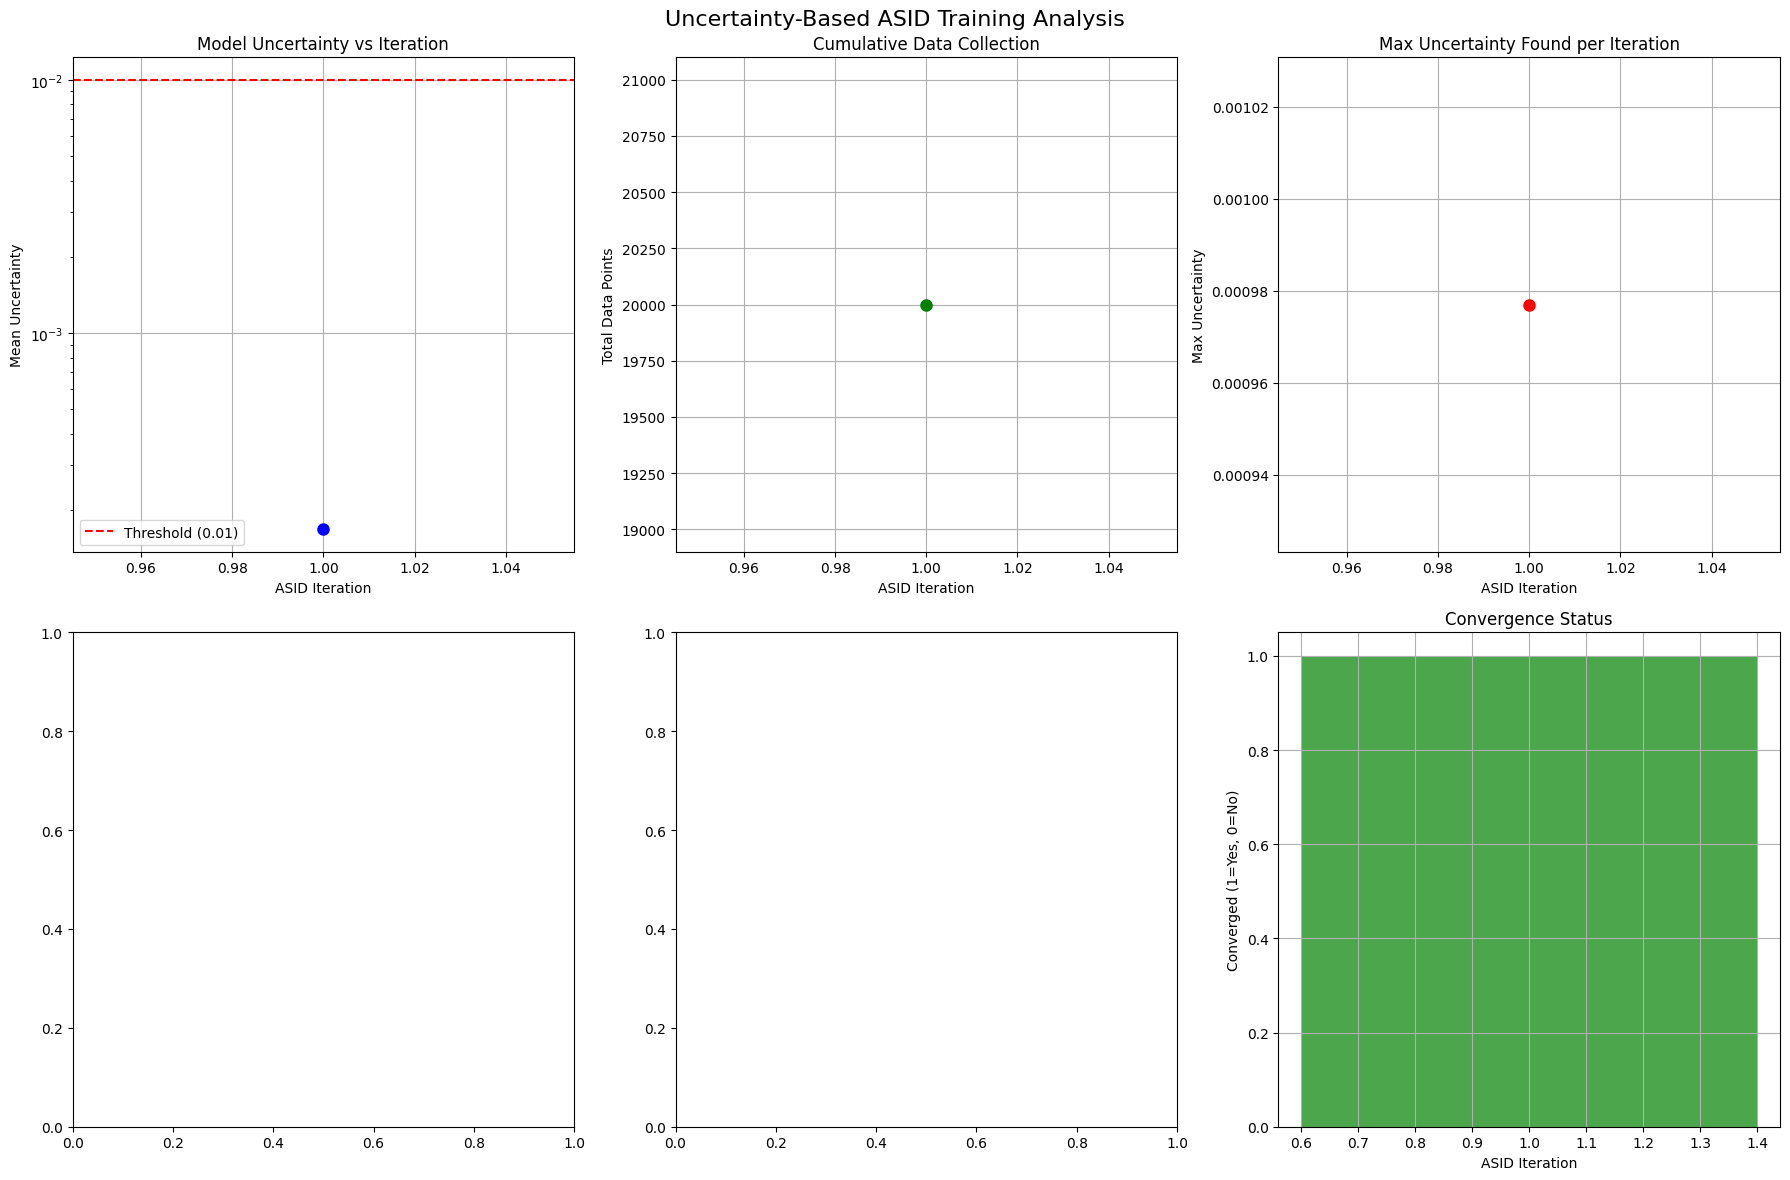


 Detailed Training Analysis:
Iter  Uncertainty  Data Points  Max Uncertainty Converged 
-----------------------------------------------------------------
1     0.000168     20000        0.000977        Yes       

 Summary Statistics:
  Total data points collected: 20000
  Initial uncertainty: 0.000168
  Final uncertainty: 0.000168
  Uncertainty reduction: 0.0%
  Data efficiency: 0.000 (uncertainty per 1000 points)

 Uncertainty-Based ASID Training Complete!
Total iterations: 1
Final uncertainty: 0.000168

✅ VARIANCE method completed!
  Final uncertainty: 0.000168
  Total iterations: 1
  Total data points: 20000

🔬 Testing Uncertainty Method: GRADIENT
 Starting Uncertainty-Based ASID Training
Uncertainty method: gradient
Uncertainty threshold: 0.01
Maximum iterations: 6
Initializing Neural ODE model...
Neural ODE model initialized!
Collected 3999 initial data points

Uncertainty-Based ASID Iteration 1
Training Neural ODE for 100 epochs...
Starting Neural ODE training...
Epoch   0: Tra

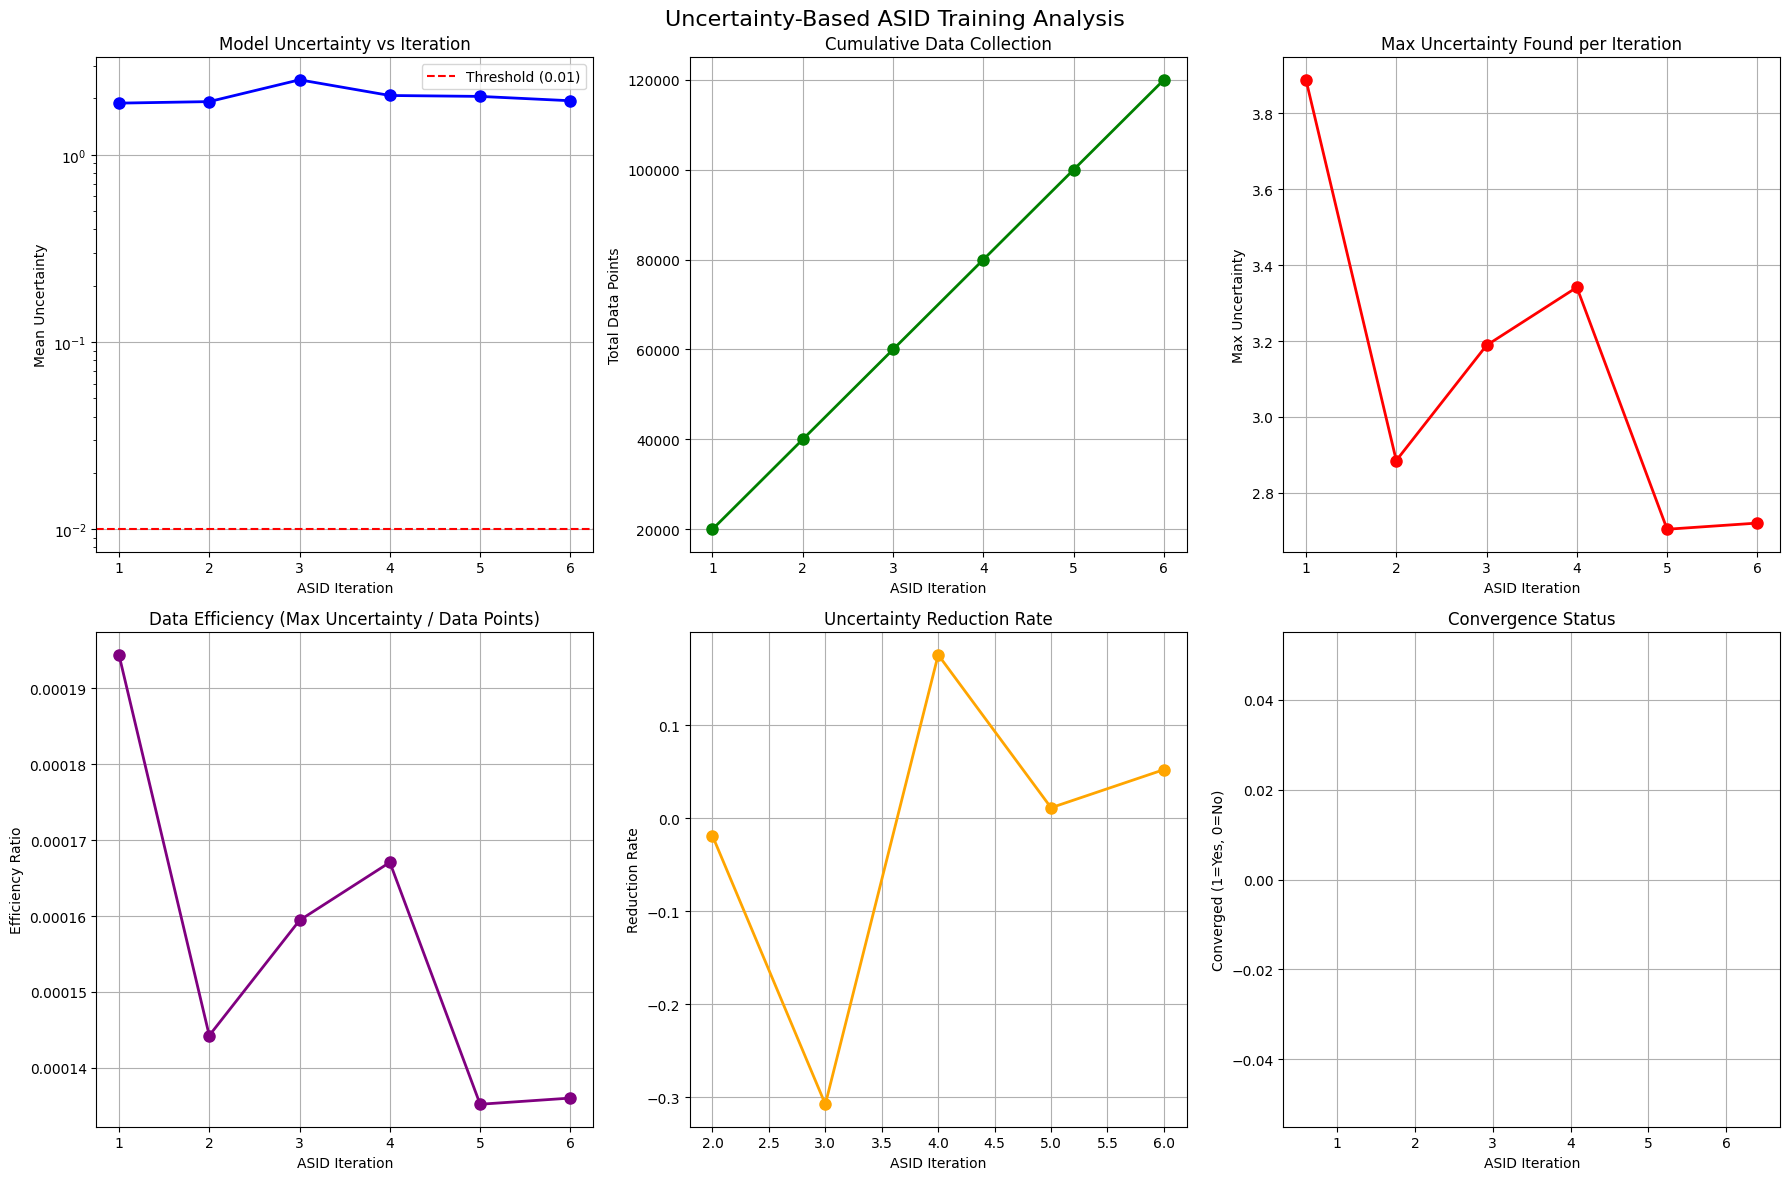


 Detailed Training Analysis:
Iter  Uncertainty  Data Points  Max Uncertainty Converged 
-----------------------------------------------------------------
1     1.888432     20000        3.888722        No        
2     1.924381     20000        2.885149        No        
3     2.516054     20000        3.188789        No        
4     2.074604     20000        3.341690        No        
5     2.051485     20000        2.703991        No        
6     1.944646     20000        2.720295        No        

 Summary Statistics:
  Total data points collected: 120000
  Initial uncertainty: 1.888432
  Final uncertainty: 1.944646
  Uncertainty reduction: -3.0%
  Data efficiency: 0.016 (uncertainty per 1000 points)

 Uncertainty-Based ASID Training Complete!
Total iterations: 6
Final uncertainty: 1.944646

✅ GRADIENT method completed!
  Final uncertainty: 1.944646
  Total iterations: 6
  Total data points: 120000

🏆 COMPARISON OF UNCERTAINTY METHODS
Method       Final Uncertainty  Iterations  

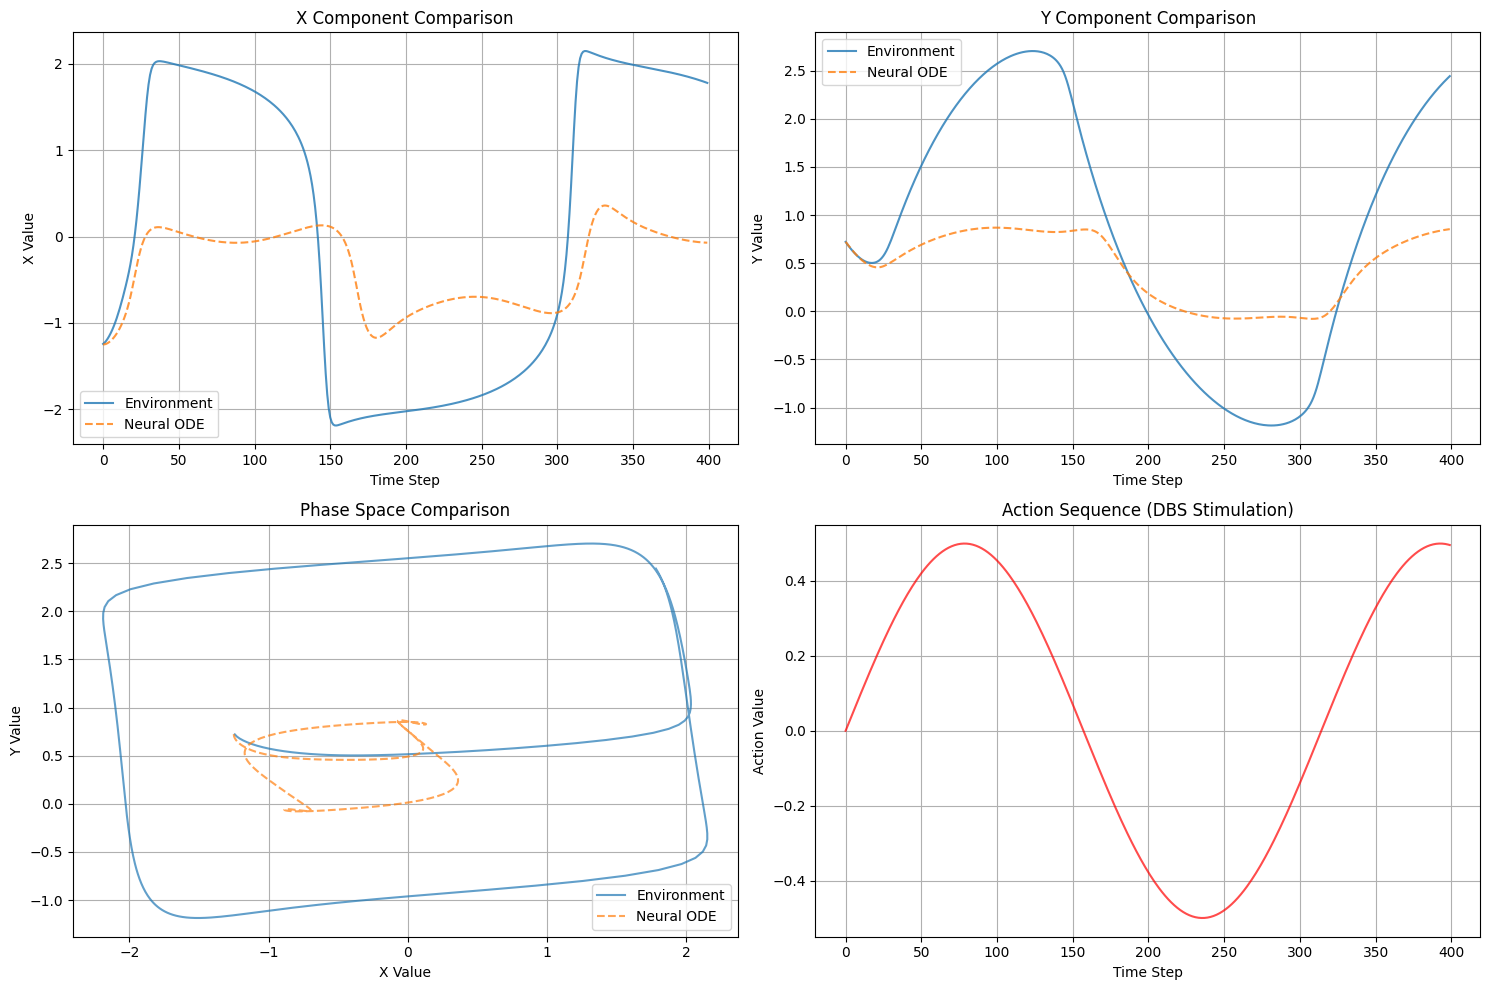

Prediction Accuracy Metrics:
  MSE X: 2.240902
  MSE Y: 1.087992
  Total MSE: 3.328895

Testing on random actions...


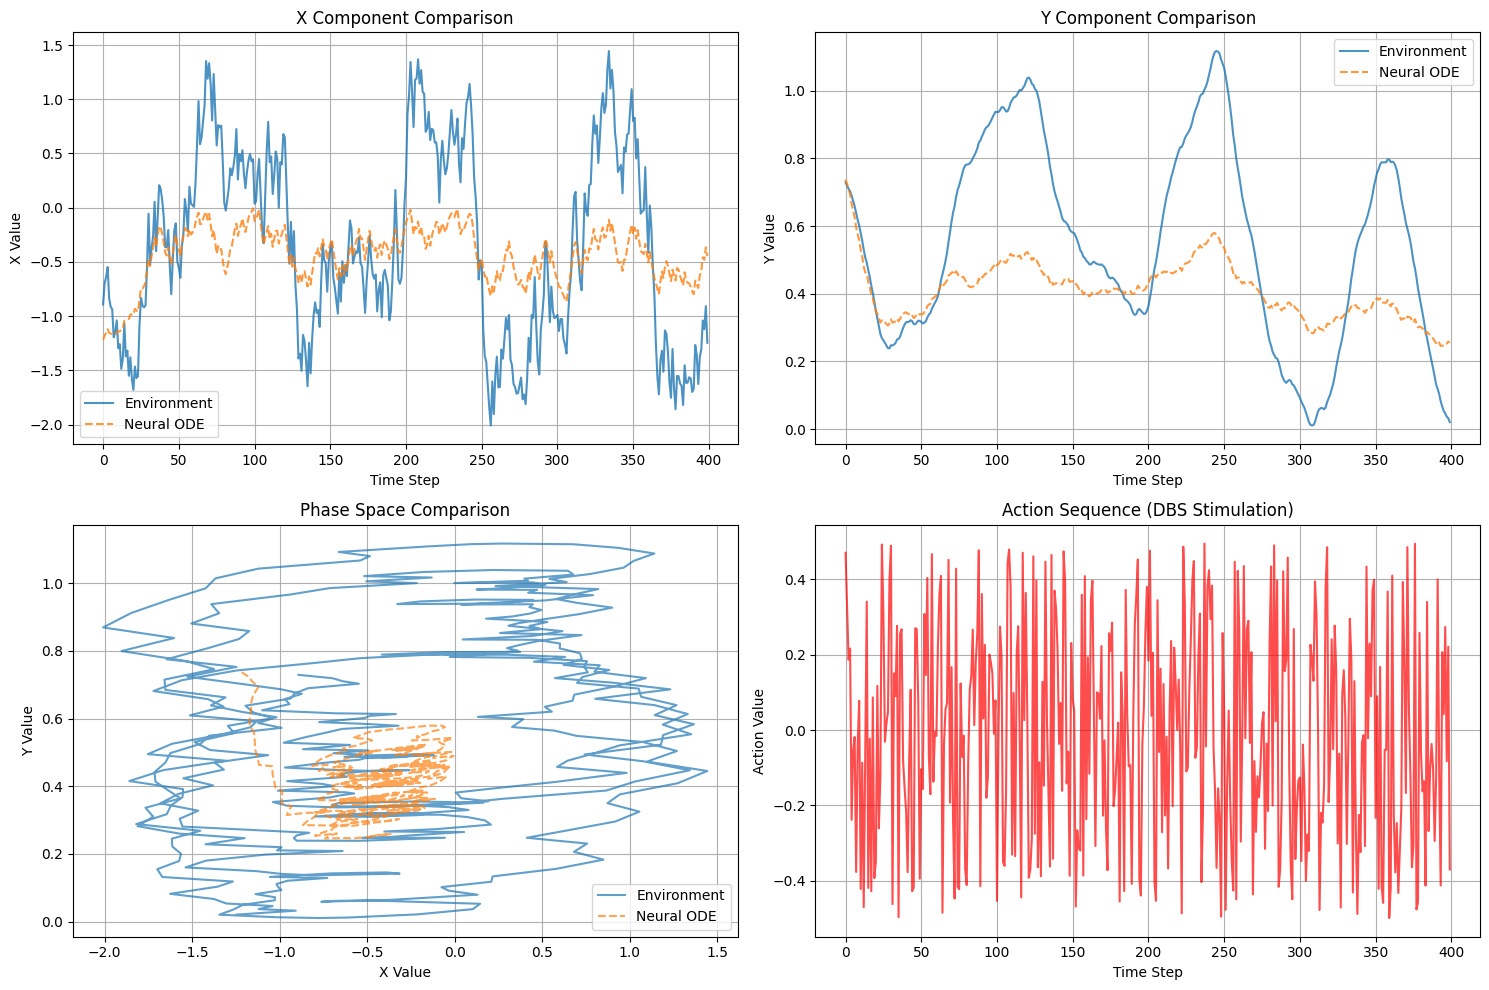

Prediction Accuracy Metrics:
  MSE X: 0.481787
  MSE Y: 0.073696
  Total MSE: 0.555482

Testing on zero actions...


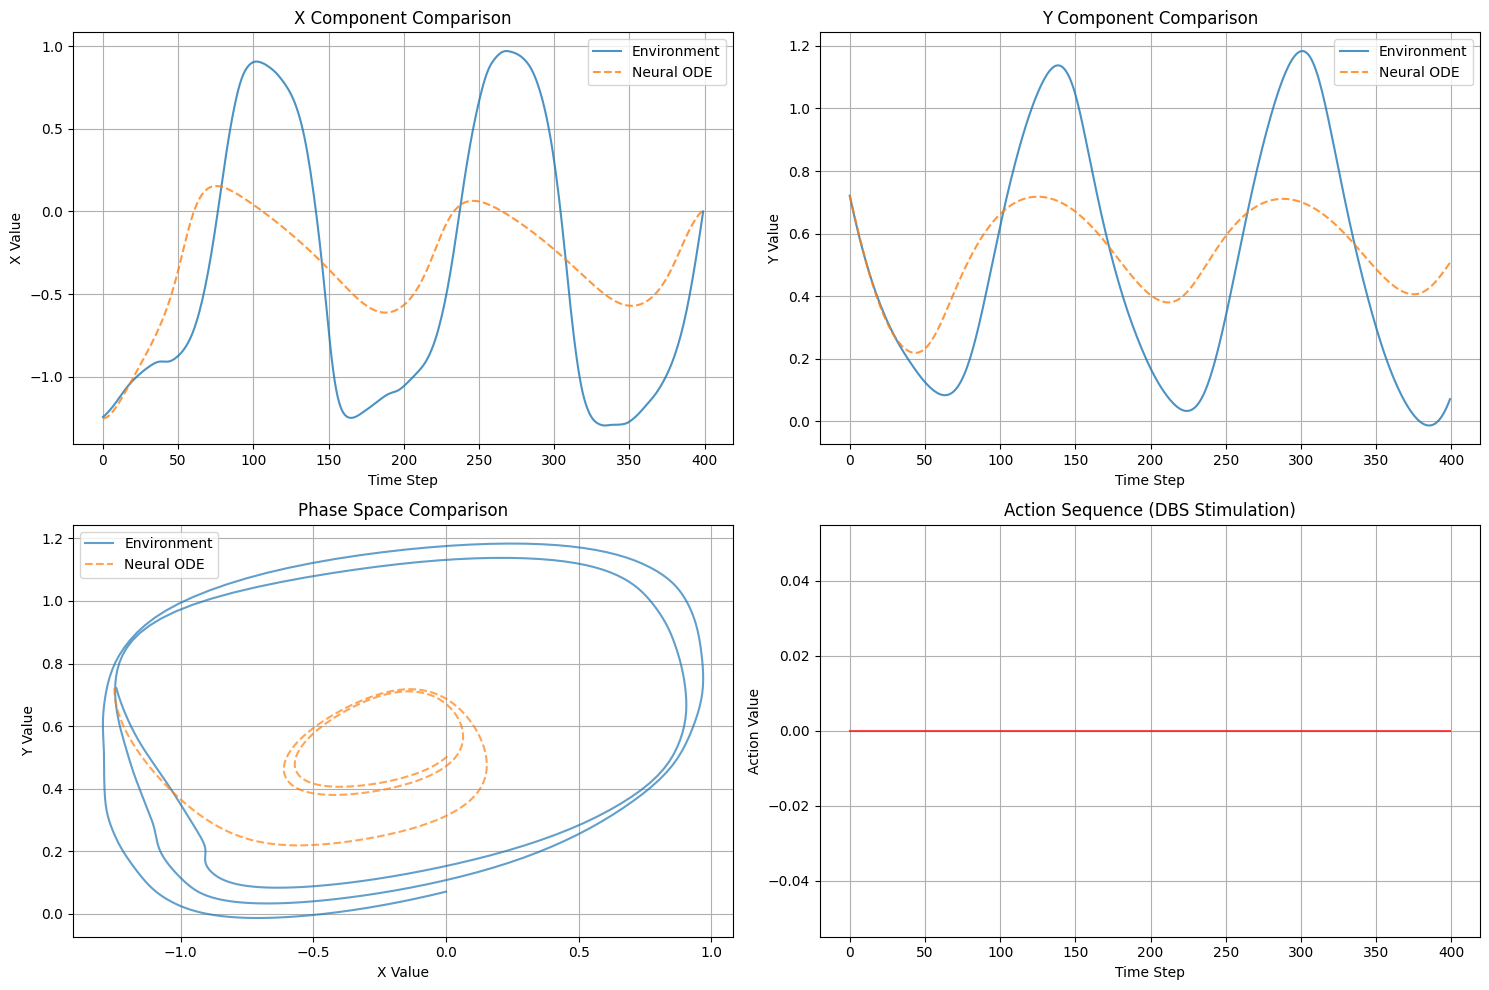

Prediction Accuracy Metrics:
  MSE X: 0.378076
  MSE Y: 0.077062
  Total MSE: 0.455138

Analyzing learned dynamics...


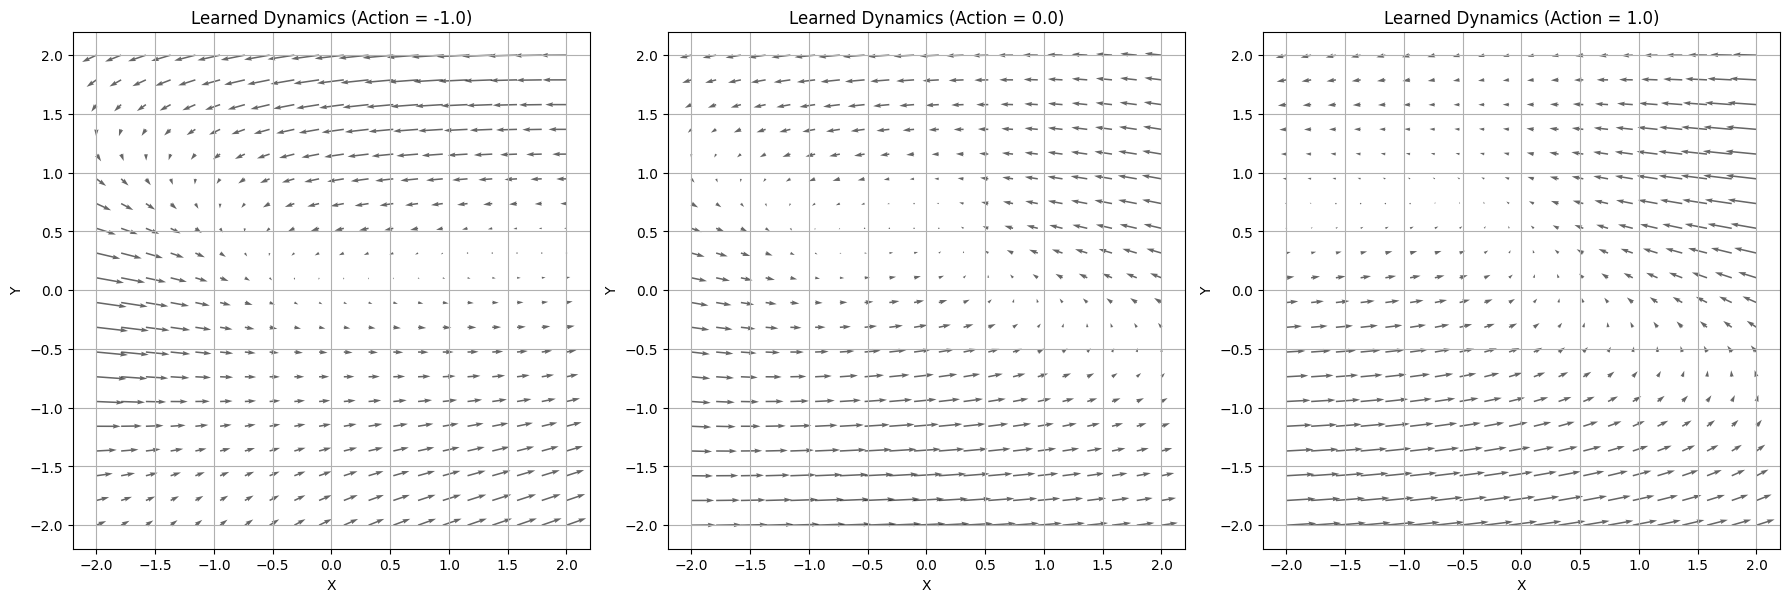


Analyzing uncertainty-based exploration efficiency...


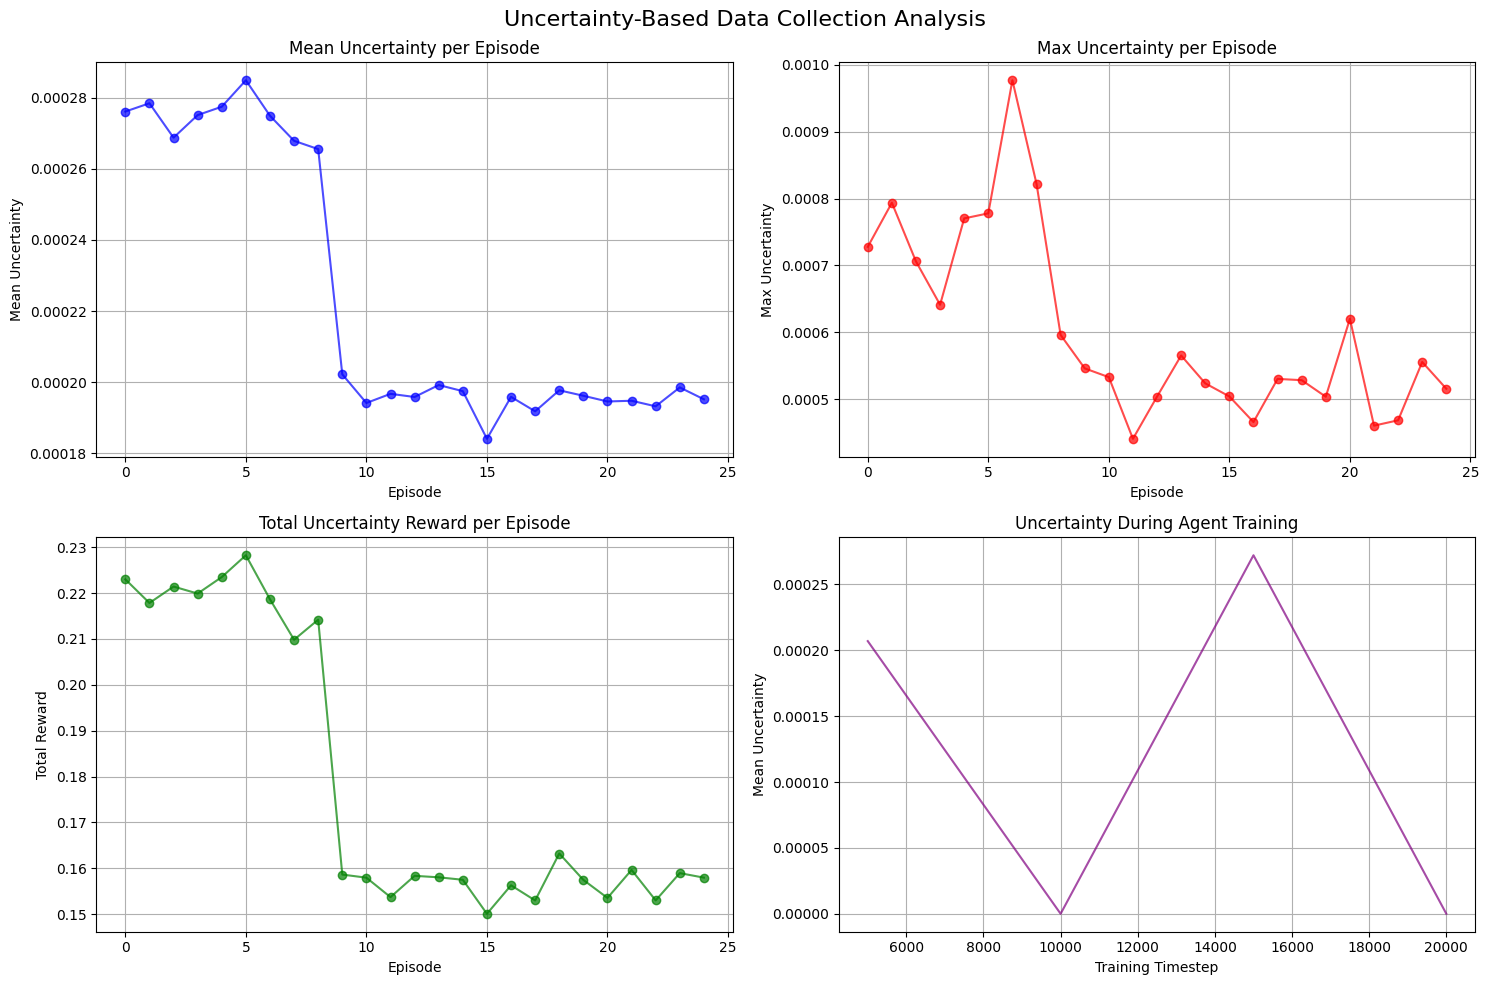


Uncertainty Collection Summary:
  Total Episodes: 25
  Mean Uncertainty (avg): 0.000224
  Mean Uncertainty (std): 0.000038
  Max Uncertainty (peak): 0.000977
  Total Reward (avg): 0.179347
  Uncertainty Trend: -0.00000445 (slope per episode)
  ✓ Model is learning - uncertainty decreasing over time


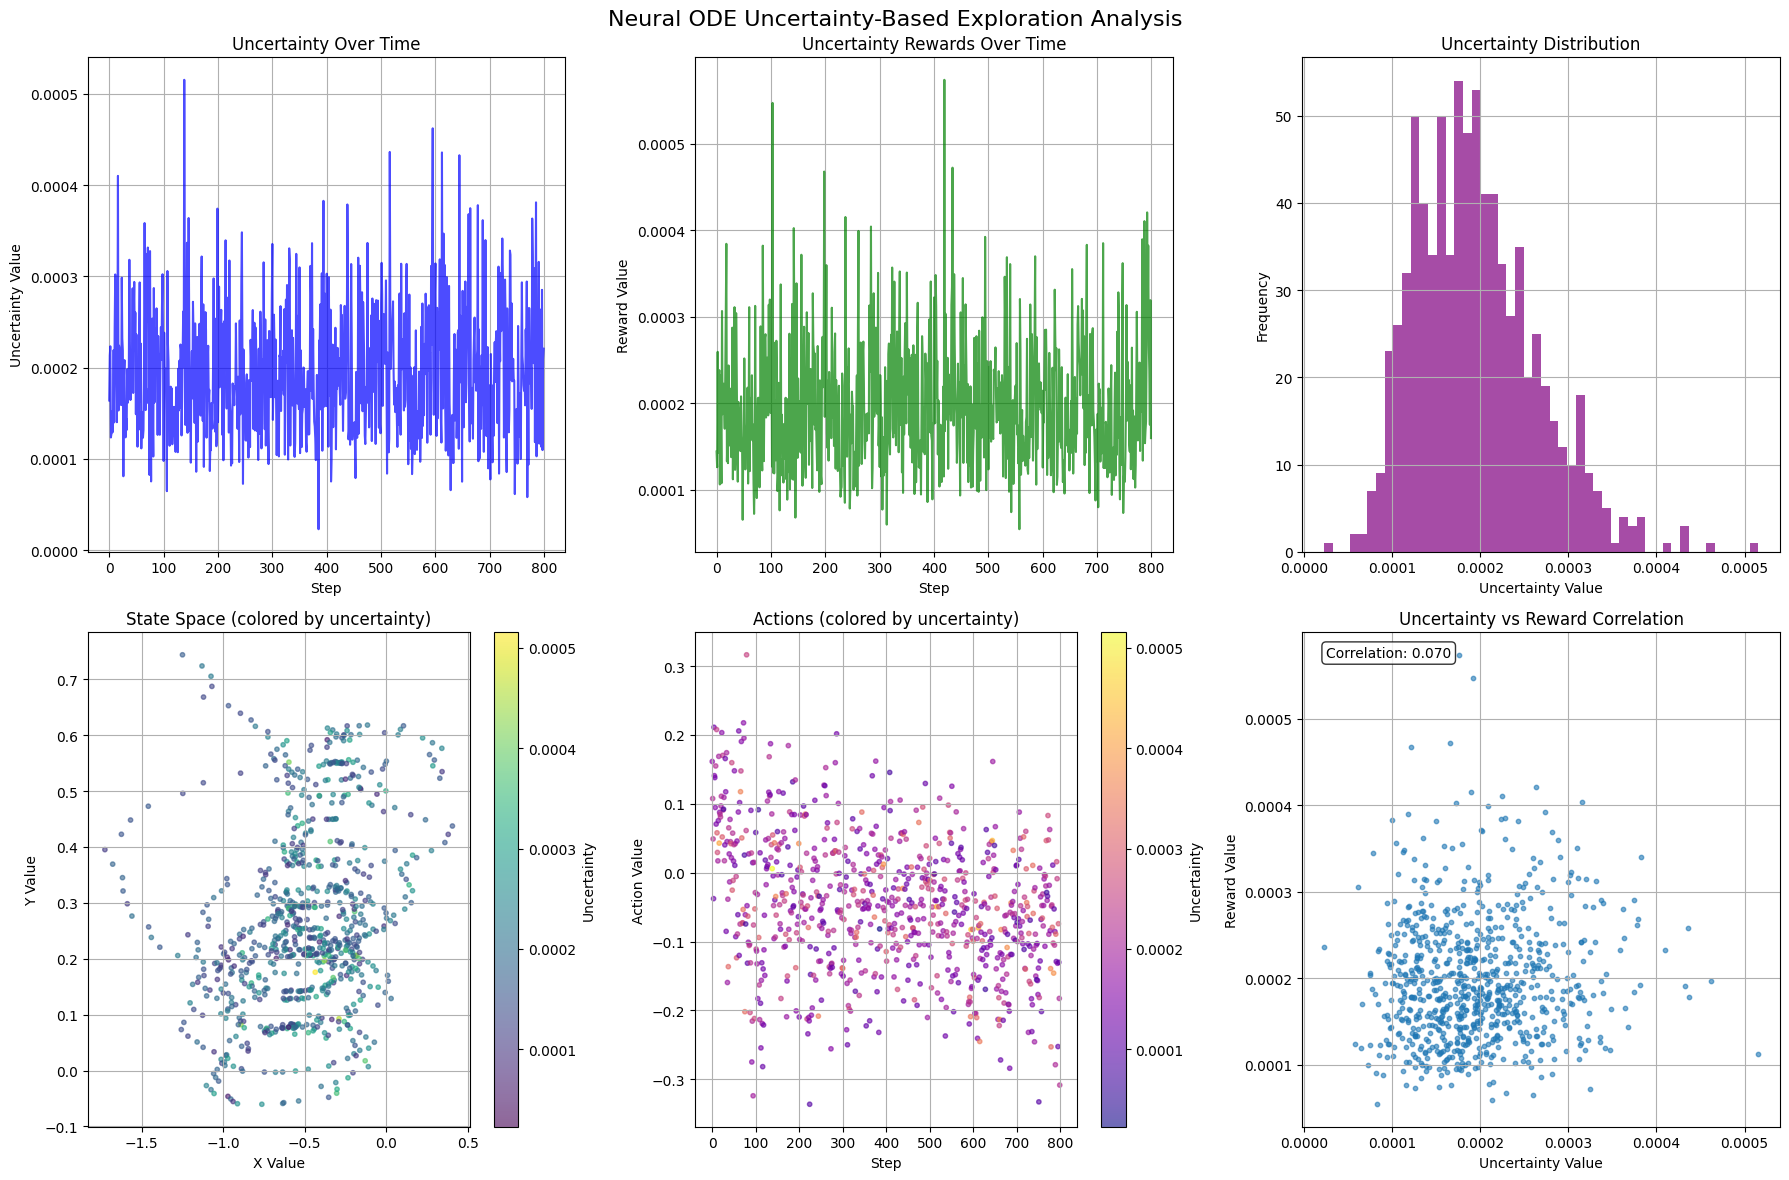


Uncertainty Exploration Statistics:
  Mean Uncertainty: 0.000195
  Std Uncertainty:  0.000069
  Max Uncertainty:  0.000515
  Mean Reward:      0.000197
  Total Steps:      800

🎯 Uncertainty-Based ASID System Identification Complete!
The agent successfully learned to seek high-uncertainty regions,
leading to efficient data collection for Neural ODE training!


In [ ]:
def run_uncertainty_based_asid_system_identification():
    """
    Main execution function for uncertainty-based ASID + Neural ODE system identification
    """
    print(" Uncertainty-Based ASID + Neural ODE System Identification")
    print("=" * 80)
    print("This approach seeks regions where the Neural ODE model is most uncertain,")
    print("leading to more informative data collection for system identification.")
    print("=" * 80)
    
    # Test different uncertainty methods
    uncertainty_methods = ['variance', 'gradient']  # Can add 'ensemble', 'dropout'
    # uncertainty_methods = ['gradient']
    
    results = {}
    
    for method in uncertainty_methods:
        print(f"\n Testing Uncertainty Method: {method.upper()}")
        print("=" * 50)
        
        # Create trainer with specific uncertainty method
        asid_trainer = UncertaintyBasedASIDTrainer(
            env_id='oscillator-v0',
            uncertainty_threshold=0.01,  # Stop when uncertainty < 0.01
            uncertainty_method=method
        )
        
        # Run complete training
        final_model, final_trainer = asid_trainer.run_complete_uncertainty_asid(
            max_iterations=6
        )
        
        # Store results
        results[method] = {
            'model': final_model,
            'trainer': final_trainer,
            'asid_trainer': asid_trainer,
            'final_uncertainty': asid_trainer.iteration_history[-1]['mean_uncertainty'],
            'total_iterations': len(asid_trainer.iteration_history),
            'total_data_points': sum(r['data_points_collected'] for r in asid_trainer.iteration_history)
        }
        
        print(f"\n {method.upper()} method completed!")
        print(f"  Final uncertainty: {results[method]['final_uncertainty']:.6f}")
        print(f"  Total iterations: {results[method]['total_iterations']}")
        print(f"  Total data points: {results[method]['total_data_points']}")
    
    # Compare methods
    print(f"\n COMPARISON OF UNCERTAINTY METHODS")
    print("=" * 60)
    print(f"{'Method':<12} {'Final Uncertainty':<18} {'Iterations':<12} {'Data Points':<12}")
    print("-" * 60)
    
    for method, result in results.items():
        print(f"{method:<12} {result['final_uncertainty']:<18.6f} {result['total_iterations']:<12} {result['total_data_points']:<12}")
    
    # Find best method
    best_method = min(results.keys(), key=lambda m: results[m]['final_uncertainty'])
    print(f"\n Best performing method: {best_method.upper()}")
    
    # Final evaluation with best method
    print(f"\n Final Model Evaluation (using {best_method.upper()} method):")
    best_model = results[best_method]['model']
    best_trainer = results[best_method]['trainer']
    
    # Create evaluator and test
    evaluator = NeuralODEEvaluator(best_model, best_trainer)
    
    # Test on different scenarios
    test_scenarios = ['sinusoidal', 'random', 'zero']
    for scenario in test_scenarios:
        print(f"\nTesting on {scenario} actions...")
        predicted_states, actual_states = evaluator.compare_with_environment(
            num_steps=400, action_type=scenario
        )
    
    # Analyze learned dynamics
    print("\nAnalyzing learned dynamics...")
    evaluator.analyze_learned_dynamics()
    
    # Show active agent's uncertainty exploration
    best_asid_trainer = results[best_method]['asid_trainer']
    if best_asid_trainer.active_agent:
        print("\nAnalyzing uncertainty-based exploration efficiency...")
        best_asid_trainer.active_agent.analyze_collection_efficiency()
        
        # Show last episode's uncertainty exploration
        best_asid_trainer.active_agent.env.visualize_uncertainty_exploration()
    
    print(f"\n Uncertainty-Based ASID System Identification Complete!")
    print(f"The agent successfully learned to seek high-uncertainty regions,")
    print(f"leading to efficient data collection for Neural ODE training!")
    
    return results

# Execute the complete uncertainty-based ASID pipeline
if __name__ == "__main__":
    results = run_uncertainty_based_asid_system_identification()